In [1]:
from __future__ import print_function

import pandas as pd 
import numpy as np 
import sklearn

from gensim.models import KeyedVectors
from gensim.models import word2vec
import gensim

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, 
classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split

#Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

import pickle

from sklearn.utils import resample

%run my_functions.ipynb

In [572]:
import keras
from keras.preprocessing import text, sequence
from keras.layers import Input, Dense, LSTM, Embedding, Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam, rmsprop
from keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from keras.callbacks import History 
from keras.callbacks import CSVLogger
# from keras.backend import manual_variable_initialization 
# manual_variable_initialization(True)

from sklearn.utils import class_weight

In [569]:
from numpy.random import seed
from tensorflow import set_random_seed
import tensorflow as tf

In [3]:
with open('data/cleaned-reshuffled.pkl', 'rb') as f:
	df = pickle.load(f)

In [4]:
X = df.tokenized_tweet
y = df.label

In [5]:
list(df.tokenized_tweet)

[['sad',
  'to',
  'see',
  'the',
  'scenes',
  'of',
  'hooligans',
  'pre',
  'engrus',
  'why',
  'spoil',
  'the',
  'pay',
  'euro'],
 ['gooddyeyoung',
  'yoyoyo',
  'super',
  'happy',
  'to',
  'be',
  'apa',
  'of',
  'the',
  'movement'],
 ['queen',
  'evil',
  's',
  'bihday',
  'lnic',
  'lnicjustanevilbday',
  'bihday',
  'suit',
  'evil',
  'love',
  'yolo',
  'stoops',
  'seriously'],
 ['you',
  'might',
  'be',
  'a',
  'libtard',
  'if',
  'libtard',
  'sjw',
  'liberal',
  'politics'],
 ['what', 'are', 'your', 'goals', 'find', 'out', 'here', 'smile'],
 ['retweets', 'nuascannan'],
 ['a', 'classic', 'trump', 'follower'],
 ['in',
  'the',
  'mixture',
  'of',
  'emotions',
  'here',
  's',
  'a',
  'one',
  'from',
  'the',
  'weekend',
  'w',
  'thx',
  'pride'],
 ['the',
  'meps',
  'bear',
  'that',
  'travelled',
  'to',
  'sandy',
  'hook',
  'in',
  'with',
  'hope',
  'that',
  'another',
  'gun',
  'massacre',
  'would',
  'never',
  'occur',
  'again'],
 ['just'

In [9]:
X_token_list = list(df.tokenized_tweet)
# X_token_sumlist = sum(X_token_list,[])
# X_unique_tokens = set(X_token_sumlist)

In [10]:
# print('The unique number of words in the dataset is: {}'.format(len(X_unique_tokens)))

In [11]:
#list(df.no_hash_tweet)

In [12]:
max(len(tweet) for tweet in df.no_hash_tweet)

139

In [13]:
max(len(tweet) for tweet in df.tokenized_tweet)

39

In [15]:
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(list(df.no_hash_tweet))

In [18]:
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 37794 unique tokens


In [19]:
sequences = tokenizer.texts_to_sequences(df['no_hash_tweet'])

In [21]:
sorted(sequences[0])

[1, 1, 2, 9, 67, 102, 122, 189, 311, 1048, 3004, 3813, 5338, 5339]

In [22]:
df.no_hash_tweet[0]

'sad to see the scenes of hooligans pre engrus why spoil the pay euro'

In [23]:
for word, idx in word_index.items():     
    if idx in  sequences[0]:
        print(word, idx)

the 1
to 2
of 9
see 67
why 102
sad 122
pay 189
euro 311
pre 1048
scenes 3004
engrus 3813
hooligans 5338
spoil 5339


In [24]:
# How to get vector representation based on its index. Example:
print(tokenizer.index_word[4])
RNN_w2v_model[tokenizer.index_word[4]]

a


NameError: name 'RNN_w2v_model' is not defined

In [34]:
padded_data = sequence.pad_sequences(sequences, maxlen=39, padding='post')

In [35]:
padded_data

array([[  122,     2,    67, ...,     0,     0,     0],
       [ 9779, 14883,   443, ...,     0,     0,     0],
       [  858,  1400,    13, ...,     0,     0,     0],
       ...,
       [  360,  1069,    47, ...,     0,     0,     0],
       [  720,   113,    47, ...,     0,     0,     0],
       [    1,  2559,  3760, ...,     0,     0,     0]], dtype=int32)

In [36]:
padded_data[1]

array([ 9779, 14883,   443,    27,     2,    18,  2614,     9,     1,
        2053,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0], dtype=int32)

In [37]:
print('Shape of data tensor:', padded_data.shape)

Shape of data tensor: (31962, 39)


In [38]:
num_words = 37795
EMBEDDING_DIM = 100
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    print(word, i)
    if word in RNN_w2v_model.wv.vocab:
        embedding_matrix[i] = RNN_w2v_model.wv.word_vec(word)
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

the 1
to 2
i 3
a 4
you 5
and 6
in 7
for 8
of 9
is 10
my 11
it 12
s 13
love 14
this 15
on 16
with 17
be 18
t 19
day 20
that 21
all 22
so 23
are 24
me 25
amp 26
happy 27
your 28
at 29
have 30
we 31
am 32
can 33
just 34
will 35
when 36
not 37
do 38
u 39
what 40
life 41
like 42
time 43
m 44
but 45
today 46
from 47
up 48
now 49
new 50
thankful 51
out 52
as 53
positive 54
get 55
was 56
people 57
about 58
how 59
our 60
bihday 61
good 62
by 63
no 64
they 65
one 66
see 67
more 68
smile 69
if 70
don 71
go 72
who 73
want 74
father 75
he 76
take 77
work 78
healthy 79
re 80
fun 81
weekend 82
an 83
summer 84
has 85
there 86
or 87
make 88
family 89
got 90
us 91
days 92
friday 93
best 94
here 95
great 96
his 97
way 98
need 99
friends 100
beautiful 101
why 102
bull 103
only 104
going 105
first 106
really 107
their 108
wait 109
morning 110
music 111
world 112
back 113
ur 114
tomorrow 115
week 116
know 117
some 118
been 119
very 120
cute 121
sad 122
orlando 123
fathersday 124
never 125
her 126
think 127


colombia 1324
shootings 1325
yum 1326
europe 1327
taken 1328
match 1329
project 1330
schools 1331
faces 1332
lack 1333
powerful 1334
calgary 1335
filled 1336
stress 1337
bigot 1338
user 1339
humpday 1340
natural 1341
heaven 1342
brilliant 1343
stream 1344
lebron 1345
played 1346
watched 1347
thats 1348
spent 1349
shi 1350
ripchristinagrimmie 1351
round 1352
greatest 1353
speech 1354
studio 1355
released 1356
michael 1357
science 1358
winter 1359
dude 1360
shoot 1361
price 1362
goodtimes 1363
attention 1364
delicious 1365
client 1366
ball 1367
gives 1368
fat 1369
awards 1370
pig 1371
cards 1372
boss 1373
within 1374
answer 1375
fab 1376
hispanic 1377
singer 1378
rainbow 1379
society 1380
growing 1381
cream 1382
possible 1383
woke 1384
pls 1385
positivevibes 1386
board 1387
worse 1388
pick 1389
hopefully 1390
current 1391
afraid 1392
market 1393
google 1394
imagine 1395
breaking 1396
grimmie 1397
piece 1398
theatre 1399
evil 1400
happiest 1401
cuz 1402
announce 1403
exercise 1404
foodie 

youtuber 2213
indiegamedev 2214
bogota 2215
describe 2216
wrote 2217
himself 2218
hollywood 2219
materi 2220
fell 2221
independent 2222
oils 2223
weddings 2224
joytrain 2225
challenge 2226
photographer 2227
april 2228
mate 2229
delivered 2230
kevin 2231
effo 2232
genocide 2233
christians 2234
dare 2235
force 2236
angels 2237
awake 2238
sundaymorning 2239
sleeping 2240
bubbles 2241
invited 2242
tune 2243
held 2244
jewelry 2245
recent 2246
actual 2247
visiting 2248
incredibly 2249
webcam 2250
silence 2251
aud 2252
basic 2253
hopeful 2254
taste 2255
mail 2256
followed 2257
berlin 2258
difference 2259
program 2260
doplants 2261
ceain 2262
drug 2263
bestseller 2264
radical 2265
speaking 2266
thousands 2267
tupac 2268
relaxed 2269
paradise 2270
anton 2271
gb 2272
lately 2273
mention 2274
claims 2275
delayed 2276
retail 2277
starbucks 2278
milk 2279
binge 2280
ate 2281
hateful 2282
reply 2283
option 2284
democracy 2285
teams 2286
tokyo 2287
edc 2288
promote 2289
instacool 2290
tb 2291
cafe 22

finishing 2913
educationfest 2914
prints 2915
prove 2916
gain 2917
moron 2918
launched 2919
forecasts 2920
written 2921
ing 2922
exhausted 2923
actors 2924
candidates 2925
recording 2926
pregnant 2927
al 2928
exploring 2929
direction 2930
enemies 2931
slowly 2932
pack 2933
routine 2934
celebrations 2935
fbi 2936
hilarious 2937
doors 2938
premiere 2939
smell 2940
pub 2941
dwd 2942
wetterwarnung 2943
starkes 2944
gewitter 2945
schwandorfchwandorf 2946
warnung 2947
wetter 2948
passing 2949
assholes 2950
master 2951
leg 2952
queens 2953
cedm 2954
solve 2955
ji 2956
producer 2957
leading 2958
marathon 2959
lights 2960
score 2961
candles 2962
choosing 2963
fought 2964
prayersfororlando 2965
royal 2966
realise 2967
talks 2968
faster 2969
balls 2970
attend 2971
fingers 2972
barely 2973
hardly 2974
necklace 2975
nor 2976
popular 2977
traitor 2978
owner 2979
conservative 2980
shoutout 2981
hathaway 2982
tshi 2983
defense 2984
upon 2985
zone 2986
bringing 2987
pougal 2988
christ 2989
stupidity 29

disturbing 4289
represent 4290
gordie 4291
conditioning 4292
boating 4293
owls 4294
justify 4295
browning 4296
eac 4297
ga 4298
inauguration 4299
campers 4300
highs 4301
considered 4302
figured 4303
protests 4304
redhead 4305
jacksonville 4306
anz 4307
represents 4308
norway 4309
ben 4310
abandoned 4311
albea 4312
increased 4313
walked 4314
disrespectful 4315
conflict 4316
professionals 4317
sorrow 4318
dl 4319
council 4320
hiking 4321
girly 4322
bubbly 4323
gas 4324
museum 4325
eggs 4326
stayed 4327
audience 4328
propey 4329
labour 4330
rush 4331
tenerife 4332
bn 4333
alaska 4334
thunder 4335
ecstatic 4336
minded 4337
tick 4338
dan 4339
cuties 4340
sf 4341
sanfrancisco 4342
austin 4343
cameron 4344
pedophilia 4345
curious 4346
digital 4347
pharrellwilliams 4348
billion 4349
banks 4350
cheering 4351
baking 4352
relatable 4353
pounds 4354
ch 4355
suffering 4356
dining 4357
hillaryclinton 4358
winners 4359
nap 4360
comfy 4361
feelin 4362
glutenfree 4363
manhattan 4364
stranger 4365
justs

smileyface 5090
philip 5091
ability 5092
greet 5093
sober 5094
amo 5095
ramadankareem 5096
punishment 5097
fouh 5098
hippy 5099
bittersweet 5100
identity 5101
naturally 5102
succeed 5103
extremists 5104
elephants 5105
gray 5106
thebest 5107
posing 5108
lyric 5109
beg 5110
rescue 5111
races 5112
acceptance 5113
biher 5114
hc 5115
psycho 5116
bo 5117
clip 5118
breakup 5119
mostly 5120
instagramers 5121
hung 5122
privilege 5123
features 5124
monthsary 5125
rice 5126
millennials 5127
ti 5128
arrives 5129
ours 5130
emtec 5131
opposite 5132
parade 5133
landed 5134
gandhi 5135
wrestling 5136
colorado 5137
pancakes 5138
gd 5139
keynote 5140
comprehend 5141
prepared 5142
exposed 5143
hyper 5144
johnson 5145
airlines 5146
bridal 5147
tha 5148
sums 5149
dave 5150
lovemyfamily 5151
mount 5152
juan 5153
noon 5154
voiceover 5155
display 5156
temecula 5157
ooh 5158
bodrum 5159
scientists 5160
protest 5161
architecture 5162
hbo 5163
champion 5164
directly 5165
pll 5166
nurses 5167
flourishing 5168
wif

georgia 5776
mentions 5777
equals 5778
throughout 5779
ky 5780
obsession 5781
surf 5782
gud 5783
vegetables 5784
veggie 5785
youthday 5786
facial 5787
classof 5788
bars 5789
karaoke 5790
commerzbank 5791
suarez 5792
pueorico 5793
coal 5794
belfast 5795
cuts 5796
betrayal 5797
finds 5798
poop 5799
ra 5800
appear 5801
bucks 5802
scenery 5803
elsewhere 5804
grandfather 5805
viernes 5806
haford 5807
grads 5808
essex 5809
moore 5810
strips 5811
brokenquotes 5812
romania 5813
surrounded 5814
sugar 5815
gypsy 5816
thegoodlife 5817
staups 5818
brands 5819
risks 5820
arrival 5821
curvy 5822
thick 5823
energetic 5824
polo 5825
trophy 5826
mcdonald 5827
tease 5828
vegetarian 5829
county 5830
smaller 5831
hooked 5832
strip 5833
mm 5834
dressing 5835
jp 5836
senator 5837
systems 5838
dvd 5839
likescam 5840
marx 5841
norm 5842
democrat 5843
musician 5844
bold 5845
longweekend 5846
related 5847
browser 5848
timeline 5849
kajal 5850
appalling 5851
freshsta 5852
besides 5853
carving 5854
su 5855
decors

wheres 7003
oral 7004
crackers 7005
thin 7006
favor 7007
resolve 7008
endorses 7009
nightshift 7010
capable 7011
doggies 7012
arrested 7013
dozens 7014
costarica 7015
load 7016
joshua 7017
mfs 7018
jane 7019
freestylehairhairstylehairdresser 7020
fandom 7021
insurance 7022
testimony 7023
tinyplanet 7024
barry 7025
seductive 7026
workhard 7027
gettingfit 7028
disappoint 7029
external 7030
furious 7031
cam 7032
confuse 7033
pace 7034
precisely 7035
fringe 7036
spree 7037
liquor 7038
shave 7039
exists 7040
beaut 7041
loudly 7042
folding 7043
curse 7044
slime 7045
farmer 7046
uber 7047
kabali 7048
produced 7049
stores 7050
emptiness 7051
magnificent 7052
sits 7053
holes 7054
unhelpful 7055
swimwear 7056
wen 7057
dreamproject 7058
moody 7059
oscarpistorius 7060
dears 7061
tourism 7062
caucasian 7063
blunt 7064
desses 7065
bias 7066
saints 7067
ray 7068
otw 7069
loveme 7070
cooler 7071
sin 7072
roller 7073
sharkweek 7074
alarms 7075
bambi 7076
tablet 7077
seal 7078
weigh 7079
cracks 7080
mak

attempts 7703
crook 7704
lois 7705
paddington 7706
muchlove 7707
incidents 7708
owlashop 7709
imready 7710
selfrespect 7711
rk 7712
detour 7713
realised 7714
quotesoftheday 7715
casa 7716
deliberately 7717
pretends 7718
convo 7719
lovethem 7720
bikes 7721
goats 7722
enjoyinglife 7723
belize 7724
checks 7725
flashing 7726
berry 7727
pepsi 7728
yey 7729
aquarium 7730
collected 7731
marie 7732
marco 7733
retrain 7734
disgraced 7735
burns 7736
russians 7737
opi 7738
togetherstronger 7739
sooner 7740
wohasu 7741
streetstyle 7742
streeta 7743
humiliated 7744
eyebrows 7745
yuge 7746
satellite 7747
harbaugh 7748
mensstyle 7749
instatravel 7750
goodvibesonly 7751
volunteersweek 7752
develop 7753
shaw 7754
ledger 7755
campervan 7756
pairs 7757
pros 7758
ima 7759
childfree 7760
yesallwomen 7761
ased 7762
vid 7763
mlk 7764
richard 7765
celinedion 7766
justinbieber 7767
rihanna 7768
rainnyday 7769
supposmallstreams 7770
mcconnell 7771
lap 7772
thrill 7773
keisha 7774
highfashion 7775
anorexia 7776


lg 8422
fairy 8423
effects 8424
wesley 8425
whistling 8426
hymn 8427
wwii 8428
glastonburyfestival 8429
felicidade 8430
nancy 8431
customised 8432
pat 8433
scotus 8434
linstagram 8435
linzy 8436
fiestar 8437
bsb 8438
genre 8439
oskar 8440
css 8441
opps 8442
nintendoe 8443
latvia 8444
ballet 8445
zaynmalik 8446
positiveenergy 8447
highfive 8448
dub 8449
thegreatest 8450
harmful 8451
boanoite 8452
frio 8453
wingers 8454
macedonia 8455
sinks 8456
obligation 8457
republic 8458
ootdwiwtmetodayfwisfashion 8459
swagfringedayoffgoodday 8460
yard 8461
cretin 8462
federal 8463
candle 8464
fyi 8465
flex 8466
tvk 8467
disco 8468
apologize 8469
melissa 8470
addict 8471
pockets 8472
couture 8473
reset 8474
agency 8475
minsk 8476
uphill 8477
tak 8478
reform 8479
louise 8480
hay 8481
bonnaroo 8482
newadventure 8483
dancelife 8484
heights 8485
decides 8486
chanel 8487
legitimately 8488
libraries 8489
preparations 8490
melodic 8491
overloaded 8492
ramdan 8493
amjoy 8494
unmasking 8495
profiles 8496
pooc

cuain 9145
haunting 9146
gothic 9147
gahbrooks 9148
weighed 9149
lighter 9150
happily 9151
frontier 9152
wc 9153
situations 9154
valuechain 9155
attracted 9156
concerns 9157
oculusrift 9158
replacement 9159
nu 9160
dollars 9161
mates 9162
invasion 9163
refreshed 9164
defended 9165
cybersecurity 9166
fatherandson 9167
thoughtleaders 9168
bourbon 9169
nina 9170
henna 9171
nevada 9172
rickastley 9173
smallbiz 9174
geranium 9175
nm 9176
whit 9177
doublewin 9178
homicides 9179
festivals 9180
elderly 9181
inch 9182
boheme 9183
awaits 9184
piracy 9185
poole 9186
performances 9187
awwww 9188
jungkook 9189
credentials 9190
capture 9191
hotvideo 9192
eg 9193
shade 9194
xboxones 9195
beloy 9196
varying 9197
lighting 9198
wohwhile 9199
colbe 9200
jail 9201
tense 9202
notfunny 9203
remark 9204
skating 9205
bearded 9206
europeangp 9207
businessoppounity 9208
sel 9209
auntie 9210
lm 9211
sequel 9212
fearful 9213
brides 9214
crowdfunding 9215
minime 9216
uploaded 9217
racis 9218
mai 9219
fountain 9220

lfff 10411
hysterical 10412
copies 10413
stalkers 10414
nolove 10415
keychain 10416
caroline 10417
rushing 10418
spiced 10419
exquisite 10420
gaystyle 10421
gaymen 10422
myfriend 10423
disana 10424
trixs 10425
pikeg 10426
follo 10427
affliction 10428
intellect 10429
twt 10430
peaceandlove 10431
streak 10432
kumbaya 10433
profession 10434
paphos 10435
ivankatrump 10436
manspreading 10437
hungary 10438
myson 10439
mik 10440
ikozosseg 10441
slowing 10442
emraan 10443
hashmi 10444
alisa 10445
goood 10446
stretching 10447
congressman 10448
vaitacacommafiasdv 10449
coeliac 10450
colombian 10451
alchemist 10452
shockingly 10453
rita 10454
hayes 10455
gravitypoisoning 10456
dangers 10457
healthcoach 10458
obscene 10459
quits 10460
nobodies 10461
personalized 10462
trafford 10463
tioman 10464
lovedailydose 10465
bloggercake 10466
hugh 10467
stab 10468
sass 10469
nvr 10470
collaboration 10471
activity 10472
dawned 10473
rm 10474
virus 10475
swinging 10476
libcrib 10477
rode 10478
traveller 10479

behaviour 11062
couroom 11063
tessa 11064
brook 11065
markantalya 11066
ica 11067
charmar 11068
yha 11069
episodic 11070
treatments 11071
reputation 11072
axed 11073
trousers 11074
josephjett 11075
theshield 11076
pixion 11077
unc 11078
vans 11079
norfolkhour 11080
eaaa 11081
nly 11082
aquamarine 11083
knife 11084
pointer 11085
rogergoodell 11086
goodellsucks 11087
disabilities 11088
taipei 11089
seeds 11090
unesco 11091
cathy 11092
collaborate 11093
lookingforward 11094
invisibleillness 11095
rows 11096
matilda 11097
pageants 11098
insecurity 11099
directioner 11100
oldfriends 11101
ci 11102
hacker 11103
embarrassment 11104
rin 11105
questioned 11106
lucia 11107
heater 11108
feelgoodfriday 11109
wilderness 11110
tashaneishq 11111
pocahontas 11112
sanya 11113
whererefreshingbegins 11114
alw 11115
weybridge 11116
lakers 11117
schoolreunion 11118
publiceducation 11119
goodfeelings 11120
bingo 11121
ramadhankareem 11122
coffin 11123
awesom 11124
careeradvice 11125
hmv 11126
exclusives 111

pueobanus 11687
mural 11688
choo 11689
iwhiteboy 11690
feeder 11691
jen 11692
photographerlife 11693
della 11694
lenora 11695
frown 11696
zionazi 11697
whoo 11698
mustwatch 11699
sentences 11700
newlyweds 11701
shyster 11702
ofcourse 11703
cedarpoint 11704
flw 11705
jake 11706
ds 11707
bankrupt 11708
photoshopped 11709
collegebound 11710
countrymusicawards 11711
enteainer 11712
rixos 11713
fir 11714
uruguay 11715
traits 11716
intend 11717
paddling 11718
molokai 11719
wheeling 11720
emily 11721
psu 11722
logan 11723
jax 11724
bowing 11725
suggest 11726
bekind 11727
activism 11728
tummies 11729
beyonc 11730
afghans 11731
wildly 11732
phenomenon 11733
exploiting 11734
womenmalayalam 11735
deceived 11736
lakelife 11737
morals 11738
pooltime 11739
ariana 11740
sugarcane 11741
memphis 11742
drones 11743
helsinki 11744
padded 11745
sahri 11746
specialmoments 11747
cleanliving 11748
finer 11749
prosperous 11750
myboy 11751
sweating 11752
atpeace 11753
prejudicial 11754
sentiment 11755
yarn 117

gara 12354
clannadafterstory 12355
traditonal 12356
derby 12357
getin 12358
mufc 12359
loveu 12360
sink 12361
longisland 12362
zig 12363
txt 12364
omit 12365
sleeze 12366
scapelliti 12367
eventprofs 12368
thingy 12369
itv 12370
pcos 12371
disheaening 12372
kingstreet 12373
minioti 12374
noaddedsugar 12375
ournewbridge 12376
warner 12377
coyote 12378
fetus 12379
milleniawalk 12380
botanical 12381
grande 12382
crashes 12383
frahm 12384
ambre 12385
wrc 12386
disgracing 12387
rwc 12388
receipt 12389
manus 12390
payment 12391
criticized 12392
justmarried 12393
durham 12394
unappetizing 12395
shackles 12396
playsuit 12397
infamous 12398
sobs 12399
ferrero 12400
sundaes 12401
defund 12402
obamacare 12403
requirement 12404
gameready 12405
abetting 12406
overseas 12407
brandnew 12408
brb 12409
md 12410
greathonour 12411
careerconvos 12412
fades 12413
disagreement 12414
absolutes 12415
blossom 12416
sharply 12417
helix 12418
goaldigger 12419
blackjack 12420
westboro 12421
poolday 12422
bans 1242

ish 13060
fahersday 13061
servant 13062
capital 13063
wholesale 13064
womenswear 13065
toll 13066
velvet 13067
teespring 13068
womenteeshis 13069
clings 13070
hairstylist 13071
bernieorbust 13072
sacrilege 13073
pharmacy 13074
workin 13075
muskoka 13076
sitgesgaypride 13077
excerpted 13078
rly 13079
wahm 13080
lambs 13081
buxton 13082
endorse 13083
onthisday 13084
socialhistory 13085
dprint 13086
theopen 13087
vent 13088
plead 13089
homeimprovement 13090
rambling 13091
vase 13092
lmc 13093
giveback 13094
livelovelaugh 13095
yonge 13096
infectious 13097
asos 13098
dayton 13099
iamwhoiam 13100
teared 13101
didthatreallyjusthappen 13102
toomanyemorions 13103
gc 13104
territory 13105
ayer 13106
girona 13107
gerona 13108
eathealthy 13109
bmottphoto 13110
healand 13111
jesuslovesyou 13112
transform 13113
kno 13114
bane 13115
philandocastile 13116
ja 13117
ilysm 13118
inactivity 13119
foodnetwork 13120
trials 13121
knicks 13122
defo 13123
oecd 13124
rootbeer 13125
caffine 13126
anya 13127
all

astounded 13981
patrons 13982
detected 13983
xmenapocalypse 13984
insanity 13985
fiesta 13986
chukwu 13987
abuja 13988
starstruck 13989
hydrangea 13990
graveyard 13991
scanning 13992
estuaryfringefestival 13993
bolton 13994
ciao 13995
selfs 13996
joins 13997
jackals 13998
pokemongo 13999
cairo 14000
dard 14001
imaginative 14002
yafinbrussels 14003
ins 14004
muted 14005
roam 14006
moviegeek 14007
edfilmfest 14008
learninglife 14009
westhollywood 14010
socgen 14011
touga 14012
aisle 14013
namin 14014
extensions 14015
salonaks 14016
cheshire 14017
ngitingtagumpay 14018
dayout 14019
raceforlife 14020
venues 14021
sponsorship 14022
foul 14023
deflect 14024
nff 14025
pandora 14026
conquercancer 14027
hikingadventures 14028
arby 14029
talkin 14030
installing 14031
console 14032
nonsensical 14033
poundnote 14034
opticalillusion 14035
iandrewmusic 14036
shoots 14037
flashback 14038
hotels 14039
chores 14040
failures 14041
waiter 14042
intervention 14043
gunsense 14044
miranda 14045
jayson 14046

remembers 14731
capitalist 14732
guineapig 14733
weirdness 14734
bald 14735
snl 14736
spiritualgrowth 14737
backseat 14738
skyporn 14739
mamas 14740
ranch 14741
pohcawlbikehire 14742
furriday 14743
blending 14744
graves 14745
saycheese 14746
dismantled 14747
memoriam 14748
endofanera 14749
uca 14750
graduationshow 14751
japa 14752
panono 14753
lchf 14754
kamehameha 14755
roommate 14756
claimant 14757
countless 14758
foxy 14759
violets 14760
gregorian 14761
aspiring 14762
dishonored 14763
flawless 14764
hahahahah 14765
amensia 14766
flickering 14767
rack 14768
pedicure 14769
boyle 14770
ironing 14771
outsidesunshine 14772
couldnt 14773
letthegamebefair 14774
folklore 14775
llc 14776
iot 14777
eyez 14778
disavow 14779
battleofbastards 14780
bihdayy 14781
pour 14782
soggy 14783
calabash 14784
ungrateful 14785
puremichigan 14786
justarrived 14787
statenisland 14788
statenislandny 14789
statenislandnewyork 14790
mvp 14791
beans 14792
whitewashing 14793
kwak 14794
veganism 14795
pjk 14796
ov

lovefarham 15366
ohhhh 15367
childrenofcolor 15368
bossradio 15369
macaroni 15370
macncheese 15371
streaks 15372
heath 15373
isobelllllllllll 15374
holidayyyy 15375
mrdinozzo 15376
kotakinabalu 15377
sabah 15378
chefjulian 15379
lilmikey 15380
rendevous 15381
saco 15382
bihdaypaynight 15383
eulogies 15384
milfmonday 15385
pfyp 15386
nipples 15387
fireemblemfates 15388
srsly 15389
seasone 15390
esmeralda 15391
esauction 15392
goodwoodfos 15393
imanerd 15394
mumbailocal 15395
curator 15396
arcii 15397
thuzioclub 15398
counselling 15399
childline 15400
puppygram 15401
inlovewithhim 15402
travelpics 15403
frayed 15404
sike 15405
amiga 15406
enyoj 15407
bled 15408
nachos 15409
fulk 15410
sings 15411
stranded 15412
ratcliffe 15413
lond 15414
almere 15415
guyana 15416
dayyyyyyyyy 15417
canadianstyle 15418
catstokyo 15419
tzuyu 15420
highstool 15421
laut 15422
hootd 15423
rainny 15424
tlbz 15425
baldwin 15426
albercada 15427
patinaje 15428
twitchfinest 15429
boehner 15430
officeselfie 15431
ci

wors 16102
backtowhatidobest 16103
deeptissuemassage 16104
dontask 16105
zumba 16106
harrystyles 16107
dfana 16108
confederateflag 16109
norespect 16110
ywt 16111
auditorium 16112
attenborough 16113
wwwsmallgirlsexcom 16114
waleng 16115
spiderdad 16116
compromise 16117
becauseofhim 16118
passpos 16119
englishfans 16120
letdown 16121
gloomy 16122
dxq 16123
winwritersfest 16124
mommas 16125
transphobia 16126
enablin 16127
slowdown 16128
manic 16129
kyncalendargirls 16130
knowyournormal 16131
alota 16132
arise 16133
farah 16134
islamophobic 16135
chumps 16136
wedeyrush 16137
scottieandrussell 16138
ejuice 16139
handcrafted 16140
susanna 16141
chooseyourcause 16142
worldchildrensday 16143
drifting 16144
saveourlibraries 16145
ffrelay 16146
ikr 16147
sector 16148
finances 16149
ayumylocalfriendgirlsnight 16150
funabashi 16151
chiba 16152
lydonmaeve 16153
teaaddict 16154
westbridgford 16155
athenanetwork 16156
savvy 16157
energised 16158
womeninbiz 16159
towwngaging 16160
founded 16161
bttf 

beachy 16801
rawfoheoceans 16802
fleurette 16803
instaboyinstamansefieseptumfriend 16804
smilesblackandwhite 16805
gej 16806
offices 16807
crusade 16808
incoming 16809
swiftlang 16810
tailgating 16811
paulocoelho 16812
letitbe 16813
mfc 16814
cognizant 16815
fostercare 16816
colonel 16817
coverboy 16818
sistersdog 16819
myphotography 16820
lowlight 16821
pondi 16822
notexcited 16823
bid 16824
laughin 16825
forkeeps 16826
kingsley 16827
meatloafisinmyprayers 16828
totebag 16829
yummymojitos 16830
howmanymoredays 16831
fathersdaygiftideas 16832
mydadmyhero 16833
nursinglife 16834
udtavirus 16835
whiteisis 16836
vivirmivida 16837
xxxpoland 16838
upenn 16839
freshmen 16840
lynching 16841
whitewash 16842
accusing 16843
beacause 16844
dumped 16845
spinster 16846
elo 16847
bigwheels 16848
killthemwithkindness 16849
justdance 16850
hotchick 16851
uglychick 16852
weekspregnant 16853
babybump 16854
sobig 16855
whopped 16856
ronda 16857
bmwrugbypathways 16858
greatprize 16859
femaleempowerment 16

withfriends 17471
gnam 17472
enteainers 17473
paasa 17474
backstabbers 17475
thetruth 17476
konst 17477
littlemixconce 17478
juhu 17479
victor 17480
whhaaaaaaaatt 17481
bestivedone 17482
radiating 17483
swatchingclosely 17484
horn 17485
wheelyfunday 17486
livemoreyha 17487
happinesstherapy 17488
recites 17489
cancellations 17490
suicideprevention 17491
solidaritywithorlando 17492
sendinglove 17493
wating 17494
consultantlife 17495
projectmanagement 17496
firstvisit 17497
momsterlink 17498
chickfila 17499
surprisebihday 17500
mailed 17501
belohorizinte 17502
thesteakhouse 17503
andthing 17504
longday 17505
cheerfulness 17506
instadad 17507
emmastone 17508
gritgrindgod 17509
gooddaydc 17510
fweelings 17511
bringbacknashville 17512
wills 17513
hillsborough 17514
oneself 17515
gotto 17516
newsrepoers 17517
estonia 17518
fashiondiaries 17519
hampden 17520
quietweekend 17521
solaris 17522
eageoplease 17523
pdxeats 17524
nongskhaomangai 17525
badtimes 17526
momentoafounado 17527
vinoafounado 

mambaday 18187
kobexi 18188
blackmamba 18189
kobebryant 18190
mambaout 18191
exceptionally 18192
feud 18193
kelpie 18194
ughhhhh 18195
replacyclay 18196
adios 18197
despondent 18198
hatedepauredayhome 18199
lovebenidorm 18200
lovingonme 18201
dietitians 18202
anduknowit 18203
andyouknow 18204
kidzoona 18205
labeling 18206
shantel 18207
tinajero 18208
skips 18209
teaseuesday 18210
rochester 18211
lafnwebseries 18212
lafn 18213
kayaking 18214
roseland 18215
pouringrain 18216
weneedit 18217
perfectbedday 18218
coached 18219
bownaker 18220
cowan 18221
fundamental 18222
representatives 18223
muah 18224
supoer 18225
fuckyoujames 18226
tunbridgewells 18227
pisina 18228
mccann 18229
decreasing 18230
brudenell 18231
ornothing 18232
fwm 18233
toread 18234
letsmake 18235
beirutweloveyou 18236
swagged 18237
baiter 18238
slaveowner 18239
instatattoo 18240
demolition 18241
farewellboleyn 18242
whufc 18243
westham 18244
olympicstadium 18245
hillarydesperation 18246
victoriassecret 18247
perfectbody 1

woodside 18923
superiors 18924
sofuckinghappy 18925
sunnyireland 18926
hmp 18927
wandswoh 18928
rolemodels 18929
inshock 18930
tellmeimdreaming 18931
tgwcw 18932
cray 18933
beams 18934
wwf 18935
educationispower 18936
nordiques 18937
achromatic 18938
noir 18939
bedford 18940
galloway 18941
dieheuwels 18942
missedthem 18943
feelinglonely 18944
milesteller 18945
berating 18946
auspo 18947
hansen 18948
pauline 18949
sacrificing 18950
christopher 18951
acre 18952
markers 18953
amuse 18954
saddie 18955
bigcheeks 18956
smalllips 18957
exploding 18958
puffedup 18959
fills 18960
sweetness 18961
wasreallyhopingitwasgood 18962
nando 18963
jars 18964
flocking 18965
xenstrength 18966
rays 18967
croak 18968
onlymarco 18969
shoeing 18970
delusion 18971
bikram 18972
meth 18973
tobedads 18974
offences 18975
westyorkshire 18976
yorkshirelass 18977
vineyard 18978
focussed 18979
egl 18980
cmoncymru 18981
marathonradio 18982
sssssoooo 18983
coooooooooool 18984
doyle 18985
fathead 18986
indoorskydiving 189

imaa 19627
happyholiday 19628
happyfather 19629
strongerin 19630
intogether 19631
npp 19632
manifesto 19633
nketia 19634
hannover 19635
suprice 19636
eatstreetmarket 19637
cavaliers 19638
onegame 19639
thankgoditsfriday 19640
schoolholidays 19641
sobsob 19642
buonadomenica 19643
writerlife 19644
impaially 19645
pentecost 19646
mhhhh 19647
soulfood 19648
shilopug 19649
finalizing 19650
qubis 19651
connectionswithoutlimitation 19652
newlaunch 19653
jacobmarley 19654
soho 19655
exp 19656
thg 19657
aiiight 19658
xoxoxo 19659
imsecre 19660
lisud 19661
guro 19662
kuhag 19663
ddto 19664
kysa 19665
palit 19666
baril 19667
lighted 19668
blasts 19669
antimuslim 19670
victorydancelol 19671
stepswedoingitagainbubbles 19672
kotor 19673
utb 19674
blondblueeyes 19675
leicestersquare 19676
cocoabeach 19677
pringles 19678
horns 19679
gullu 19680
butts 19681
sohni 19682
dhei 19683
gshit 19684
paidinfull 19685
wynonnaearp 19686
biiiitch 19687
bihdaytoyou 19688
cda 19689
santoro 19690
rajeev 19691
khandel

ktu 20447
buffoon 20448
nostalgic 20449
menstyle 20450
boygay 20451
gayarab 20452
biopolitics 20453
abbott 20454
politi 20455
neversettle 20456
authentic 20457
kuelebaran 20458
kuekering 20459
kueulangtahun 20460
mierenzuur 20461
evoluon 20462
drinkdark 20463
lostinthemuseum 20464
rehrasals 20465
bradybunch 20466
morethemerrier 20467
qualify 20468
keepyoureyesontheprize 20469
caribbeangirl 20470
whatelse 20471
catlife 20472
sovereign 20473
lovesummer 20474
sunandsand 20475
wednesdayisgeorgeday 20476
georgeclooney 20477
completly 20478
summative 20479
tyl 20480
ksugrad 20481
lifescience 20482
mavanaszulinapom 20483
dayshappy 20484
dayseventyseven 20485
lovelifequotes 20486
ourrevolution 20487
womenforump 20488
permitted 20489
vegetarians 20490
rapidly 20491
tilting 20492
windmills 20493
outlining 20494
themes 20495
prayerful 20496
churchplanting 20497
beachpay 20498
justwannabeme 20499
wireless 20500
circulating 20501
ushuaia 20502
childlike 20503
mayfield 20504
roseanne 20505
newbusine

yunging 21031
gooddays 21032
baddays 21033
pyrography 21034
taller 21035
mya 21036
expressive 21037
disingenuous 21038
deviant 21039
mahadev 21040
idiocy 21041
lifeofval 21042
lifeofbu 21043
machado 21044
zeuskodawn 21045
tunnelview 21046
yosemite 21047
longexposure 21048
sevierville 21049
tczew 21050
gda 21051
sk 21052
embodied 21053
blacksagainsttrump 21054
johnrkhoward 21055
wlk 21056
wnt 21057
nevr 21058
impeterpan 21059
wendyisthebomb 21060
goodriddance 21061
divorced 21062
whenwecelebrate 21063
russianvodka 21064
fatally 21065
dahlia 21066
hrh 21067
thbihdaycelebrations 21068
pancake 21069
courreges 21070
twiggy 21071
theoutlets 21072
crestview 21073
teenchoicesostraight 21074
clexa 21075
littleun 21076
secondary 21077
foxnate 21078
fashiophotographyappreciation 21079
pursuing 21080
sgig 21081
beram 21082
ivebeenwaitinglong 21083
lifeoneah 21084
ndbihday 21085
nightlifelocater 21086
homosex 21087
cliches 21088
semantics 21089
ilocanos 21090
snapchats 21091
livecomedy 21092
memyse

phipps 21660
phippsplaza 21661
ngos 21662
stopbrandingyourselves 21663
poweools 21664
recycled 21665
dived 21666
planks 21667
compost 21668
seedlings 21669
sheisoftenconfused 21670
beyondourcontrol 21671
henleyhawks 21672
henleyregatta 21673
unadulterated 21674
vaseegupurdantelflowersvizit 21675
dayshand 21676
madevasse 21677
naturelove 21678
naturel 21679
insurgence 21680
zones 21681
goodtogreat 21682
inspireme 21683
bravewarriors 21684
trumper 21685
iwantmore 21686
adaptation 21687
fondant 21688
againstupid 21689
queensofsass 21690
excellencerp 21691
anthum 21692
hellosunday 21693
sunnday 21694
truckerhat 21695
claudi 21696
sphere 21697
seeyounextweek 21698
gagged 21699
somethinghastochange 21700
sisteradventures 21701
ilovemysister 21702
lularoe 21703
maroon 21704
needahouse 21705
aaptards 21706
sonam 21707
kapoor 21708
macchrischang 21709
ode 21710
infusing 21711
edfest 21712
songrise 21713
greatcustomerservice 21714
rabies 21715
neutered 21716
endrabiesnow 21717
proudtobeanamerica

porchpig 22261
minipig 22262
petpig 22263
momsboy 22264
cheezburger 22265
bubblerun 22266
prestonpans 22267
outlander 22268
vicitms 22269
makingupmyairmiles 22270
firefighter 22271
lodd 22272
yucka 22273
weakassbitch 22274
kang 22275
tiring 22276
buttt 22277
girlvideo 22278
futurama 22279
reactiongifs 22280
eminemslimshady 22281
marshallmathers 22282
followmeanime 22283
postal 22284
weeds 22285
joints 22286
torontoweed 22287
gatehouse 22288
bucketlist 22289
financialadvisor 22290
financialplanner 22291
asiento 22292
plegable 22293
gris 22294
coolin 22295
ramsaybolton 22296
jaaaaaaa 22297
heavymetalneverdies 22298
unimpressive 22299
murica 22300
jusu 22301
coldpressed 22302
popsicle 22303
scratched 22304
ridiculousness 22305
greenwich 22306
marching 22307
broglio 22308
kai 22309
sofunny 22310
hisfacetho 22311
knott 22312
eahling 22313
mellie 22314
electrocheking 22315
musicalveneus 22316
electropop 22317
bijoux 22318
myneni 22319
doubles 22320
paes 22321
sania 22322
repeats 22323
thecur

scouted 23148
bathesis 23149
toofar 23150
placemat 23151
maltingfloor 23152
sitcom 23153
techouse 23154
dishonesty 23155
slandering 23156
friendsdancekissnight 23157
youngsweet 23158
fellaindia 23159
classifying 23160
fucku 23161
farhad 23162
accessoriesitalyromatop 23163
modemoda 23164
booginhead 23165
sippigrip 23166
leash 23167
rezwan 23168
dajump 23169
ieper 23170
ypres 23171
belgie 23172
chilli 23173
chillisauce 23174
milton 23175
keynes 23176
momentsgt 23177
obua 23178
makindye 23179
organise 23180
spanks 23181
cane 23182
superkick 23183
wwefi 23184
ilovepiercemee 23185
lovepierceme 23186
ilovepiercings 23187
pierceme 23188
sinnamary 23189
pakira 23190
vanderwaal 23191
weekdays 23192
deeplyconcerned 23193
nothingisordinary 23194
louteasdale 23195
dalai 23196
albe 23197
camus 23198
giantdied 23199
stillcrying 23200
scholarship 23201
overalls 23202
hatefear 23203
vampirefreaks 23204
marathi 23205
wipolitics 23206
feelingsad 23207
cate 23208
emirat 23209
lodestar 23210
firebaugh 232

immigrate 23921
worldwinnermodireturns 23922
suddenlink 23923
piket 23924
nya 23925
devika 23926
shitroadie 23927
antisemetic 23928
jidesamson 23929
andi 23930
planetford 23931
balletclass 23932
roh 23933
diyroom 23934
cleanmirror 23935
dhmis 23936
denounced 23937
ctcon 23938
connecticon 23939
nbavote 23940
porntube 23941
confessions 23942
confederate 23943
beastofburden 23944
pictured 23945
fatboygenetics 23946
whitewater 23947
believeinyou 23948
neverstop 23949
greenvscocamlike 23950
likenaturelikeforliketreedropleafblackseavscoturkeymyphotography 23951
loverizevsco 23952
wohily 23953
krispykreme 23954
sprinkles 23955
sugarrush 23956
tempting 23957
itune 23958
lowcarb 23959
ketolife 23960
kingreynolds 23961
hesakeeper 23962
afrobeat 23963
stretched 23964
maybetomorrow 23965
urging 23966
acct 23967
goochie 23968
coms 23969
iphones 23970
dtn 23971
livedtn 23972
burchamaptsmsu 23973
gratitudehappinessaffirmations 23974
fitspiration 23975
sahaja 23976
pinwheel 23977
postoftheday 23978
ti

yougotgot 24560
byeenglish 24561
cooped 24562
greyday 24563
englishweathersucks 24564
hawaiianstyle 24565
lylepierce 24566
galsontour 24567
wellduh 24568
kleenex 24569
wonderfulwakey 24570
stayunchained 24571
cobblers 24572
flatbush 24573
instrucable 24574
previews 24575
dprinting 24576
qma 24577
abxc 24578
summercamp 24579
zacarylove 24580
maramag 24581
bukidnon 24582
flickr 24583
middleeast 24584
gullane 24585
eastlothian 24586
syllabus 24587
miyamoto 24588
populationcontrol 24589
fotografoprofessionale 24590
appface 24591
iwc 24592
ruining 24593
bestforbusiness 24594
grandevent 24595
lafiesta 24596
navi 24597
expressway 24598
bcot 24599
alexandpiper 24600
onlyonemoregetup 24601
marcorubio 24602
shearscolourhairsalon 24603
shears 24604
razor 24605
lavieenrose 24606
abundant 24607
mailboxes 24608
getweirdtour 24609
assago 24610
streetmusica 24611
fax 24612
torbayairshow 24613
telecast 24614
westandwithyoukaran 24615
performs 24616
szymanowski 24617
violin 24618
conceo 24619
brindha 24

cann 25277
thinskinned 25278
mato 25279
chapones 25280
woysboys 25281
uppity 25282
raceplay 25283
whiskerswednesday 25284
gardner 25285
simpleshapes 25286
affluent 25287
animalabuser 25288
rama 25289
reddy 25290
sobeautifulhere 25291
memorialday 25292
wrenn 25293
iaskedforadomlid 25294
float 25295
poured 25296
scrambled 25297
lovebabies 25298
smallgirl 25299
smallfingers 25300
holidayinlithuania 25301
palyhappy 25302
yoi 25303
werkwerkwerk 25304
pu 25305
gaatx 25306
excotic 25307
relextime 25308
carehome 25309
nelson 25310
mandela 25311
teju 25312
repaired 25313
teamlewis 25314
lewishamilton 25315
montrealgrandprix 25316
canadagrandprix 25317
nomeds 25318
tosser 25319
hulksmash 25320
fuckthisshit 25321
scamming 25322
skyskraper 25323
broadcaster 25324
brownshi 25325
pivo 25326
patronise 25327
pcgameminor 25328
anerica 25329
giles 25330
assemble 25331
musuem 25332
croc 25333
graceland 25334
bearails 25335
djoir 25336
lough 25337
wuppeal 25338
ourleadersaresleeping 25339
dissappointed 25

smileonmyface 25860
billionairemag 25861
colourism 25862
whichever 25863
suffices 25864
sree 25865
narayana 25866
missin 25867
theyleftme 25868
fastaction 25869
dlx 25870
mofo 25871
youdisgustme 25872
kickrocks 25873
littleenglander 25874
sosmannheim 25875
slflmannheim 25876
secondsofsummerconce 25877
groupiee 25878
buhaycallcenteragent 25879
sykesasia 25880
benefit 25881
teamd 25882
wicca 25883
pagan 25884
pisces 25885
warehouse 25886
dishu 25887
plzzzz 25888
loveudisha 25889
blackcokwhiteass 25890
serverlife 25891
newmemories 25892
drunknights 25893
drunkgirls 25894
seasideheights 25895
ley 25896
apologists 25897
jetlagged 25898
doubletree 25899
fullpaicipation 25900
boyden 25901
oppression 25902
neverislam 25903
knicc 25904
deceased 25905
jabardasti 25906
photosession 25907
nikkhhil 25908
framelements 25909
bihdayqueen 25910
hotelma 25911
sweeping 25912
trina 25913
nicknames 25914
jewelries 25915
boarded 25916
dayearly 25917
backgroud 25918
asianface 25919
tde 25920
elizabethtaylor 

yourbad 26779
veganfriendly 26780
thclasses 26781
creativebusinesscup 26782
poms 26783
lik 26784
cri 26785
everi 26786
foward 26787
netflex 26788
worstthingever 26789
colorshow 26790
feelingfresh 26791
lookinggood 26792
richmond 26793
folded 26794
ruthless 26795
minipin 26796
slipmatt 26797
knuckle 26798
payformybaby 26799
isz 26800
wtc 26801
dumbism 26802
moleculef 26803
hornsareblowing 26804
wecried 26805
mahindra 26806
listas 26807
ohodontics 26808
oos 26809
westin 26810
teamgrimmie 26811
ripchri 26812
fbf 26813
escoba 26814
lien 26815
spontaneity 26816
iphonography 26817
gaymodel 26818
newclue 26819
cluquotes 26820
samplesunday 26821
posh 26822
countrygjrl 26823
silverhair 26824
itinerary 26825
persevered 26826
dogtoy 26827
petparent 26828
alamode 26829
bast 26830
qual 26831
runwales 26832
cheerleaders 26833
tolyatti 26834
tassel 26835
cymruambyth 26836
rickerby 26837
parsley 26838
peruvians 26839
afroperuvian 26840
chaclacayo 26841
tutorials 26842
replacing 26843
tlchat 26844
disa

soischessie 27398
competed 27399
congratsthough 27400
belair 27401
heres 27402
miercolesbonitos 27403
kimmel 27404
dignified 27405
jesusgirl 27406
predictable 27407
cameo 27408
auntielove 27409
incompitent 27410
divider 27411
racebaiting 27412
snowboarding 27413
watchdogs 27414
bosmatrial 27415
travesty 27416
baworstairline 27417
udt 27418
whaaaaaat 27419
mymaniscominghome 27420
ballads 27421
ballate 27422
che 27423
posso 27424
dalat 27425
dated 27426
jugg 27427
posses 27428
walnuts 27429
empirebeautyschool 27430
scissor 27431
lovingit 27432
dedicate 27433
handsy 27434
weekeend 27435
fraalb 27436
touspourlesbleues 27437
allezlesbleus 27438
dandelions 27439
linkinmybio 27440
renemo 27441
isotonix 27442
marketamerica 27443
manupamerica 27444
prayforpeace 27445
hesvit 27446
goofydonnie 27447
gvpv 27448
receptionist 27449
orlandovictims 27450
removeban 27451
allergies 27452
itchyeyes 27453
verytrue 27454
urduquote 27455
pewaukeelake 27456
jloaka 27457
interactive 27458
unplug 27459
freshme

somethingnew 27931
rozay 27932
twain 27933
unbearable 27934
humidity 27935
brecon 27936
flipflopssaferbrecon 27937
hopefull 27938
fashioncoordinatesclutch 27939
whitejeanssunny 27940
sunshineshoppingthanks 27941
instam 27942
expanded 27943
abandons 27944
ee 27945
reception 27946
masts 27947
binondo 27948
eloquently 27949
anchordown 27950
friedrich 27951
nietzsche 27952
baycityrollers 27953
lovelymen 27954
bukber 27955
loveinstadaily 27956
copped 27957
chuckles 27958
mudfest 27959
vscorussia 27960
tchita 27961
daniels 27962
shegaveup 27963
lovetodiscover 27964
plentyofpicnics 27965
homophonia 27966
phobie 27967
praygay 27968
teenageson 27969
reckons 27970
prezzie 27971
chaotic 27972
outa 27973
timetogetresults 27974
chicagovloggers 27975
alaways 27976
amarillo 27977
itsrarenowadays 27978
stevefrancis 27979
umd 27980
opal 27981
preaching 27982
twonitwittrumpsuppoers 27983
thwin 27984
musicbank 27985
justine 27986
readers 27987
daventry 27988
hod 27989
intercourse 27990
armpit 27991
hairl

byronnails 28551
mustsee 28552
icekating 28553
timwise 28554
colorblind 28555
trendolizer 28556
historicalamnesia 28557
mouthing 28558
bdliza 28559
rossana 28560
condoleo 28561
dalmatian 28562
saintjohn 28563
nothingness 28564
cuttingtuition 28565
phoro 28566
supposystem 28567
wealthier 28568
papaji 28569
bapuji 28570
ankle 28571
rhoda 28572
shipwreck 28573
greenock 28574
evokes 28575
mimic 28576
lastchoir 28577
socialising 28578
busting 28579
despatched 28580
earringstagsforlikes 28581
maxiaretes 28582
lowfat 28583
criticised 28584
sundayroast 28585
uglier 28586
oprollredroll 28587
steubenville 28588
likrichmond 28589
trentmays 28590
nakedcurvygirl 28591
racecar 28592
jalandhar 28593
appointing 28594
ispeakemoji 28595
lifeisbetterwithemojis 28596
hrcp 28597
lethal 28598
caughtup 28599
tami 28600
retwet 28601
mgwv 28602
hoyesdiadefiesta 28603
hone 28604
nambia 28605
lacks 28606
microsd 28607
rememberfathers 28608
scarlettmorgan 28609
doingme 28610
despatch 28611
newzealand 28612
insane

speyvalley 29162
challengetour 29163
watchingitnow 29164
metoland 29165
headliners 29166
secular 29167
haredi 29168
comealong 29169
funwreekend 29170
nobaking 29171
fishfilletfeast 29172
incubus 29173
nissan 29174
whattobuy 29175
violet 29176
lon 29177
pompom 29178
loveableloser 29179
rcti 29180
prancis 29181
rumania 29182
vscohub 29183
blackberry 29184
sydneycanberra 29185
weeksto 29186
butthole 29187
enjoymylifeenjoylifeenjoyingenjoy 29188
sunnyfafasfenjoylife 29189
chappy 29190
daysoutwiththekids 29191
yahoooo 29192
marshmallow 29193
tomday 29194
pepsicenterwtc 29195
bestmoments 29196
womenwhofarm 29197
farmbitch 29198
marauder 29199
bleedblue 29200
mozillatnwoc 29201
contribution 29202
gma 29203
phils 29204
goodonedean 29205
metoo 29206
putinism 29207
smilesallaround 29208
dentaloptions 29209
kirstyleemacdonaldphotography 29210
slowmo 29211
ampallaccess 29212
buka 29213
bersama 29214
yuhuuuuu 29215
risha 29216
meylucky 29217
mayfair 29218
townhouse 29219
sposunnylifeenjoy 29220
lov

hehee 29770
sauli 29771
mwah 29772
reemergence 29773
discourse 29774
cityjournal 29775
lowes 29776
gaskids 29777
tempted 29778
stillcantbeliveyoudidthis 29779
meyerland 29780
labsrule 29781
firepitfun 29782
fisherman 29783
walleye 29784
fishfry 29785
airivanhoe 29786
keeppounding 29787
eased 29788
theamericans 29789
eurozone 29790
stanastasia 29791
blacksea 29792
anastasia 29793
stophate 29794
wordans 29795
trish 29796
sandossanblas 29797
gpodtimes 29798
regressiveleft 29799
fascistic 29800
wwenxt 29801
vodkadeprived 29802
makingbanktho 29803
iguess 29804
iwannagoout 29805
wanttotan 29806
butiworkeveryday 29807
aphextwin 29808
antismoking 29809
buranus 29810
flybcc 29811
airbroker 29812
botswana 29813
cookiemueller 29814
provincetown 29815
ptown 29816
firsttimeforeverything 29817
whydoihavesomanyhashtags 29818
ihavewaytomany 29819
slocombe 29820
chichester 29821
hana 29822
wu 29823
chun 29824
hao 29825
zi 29826
xiang 29827
buds 29828
ilovecolorado 29829
ilovenature 29830
hufpfoten 2983

mahogany 30746
preschoolers 30747
lapatripedialondon 30748
lapatripediatravels 30749
dailyaffirmation 30750
hashtagged 30751
argvven 30752
newer 30753
bigboat 30754
wherearealltheguysat 30755
yellowcab 30756
rasebud 30757
giditraffic 30758
littlest 30759
stpancras 30760
alleys 30761
wandering 30762
katjabymyself 30763
usmc 30764
highclouds 30765
malamia 30766
bohemian 30767
rhapsody 30768
chateaubriand 30769
stovells 30770
aobff 30771
spidey 30772
dottie 30773
pland 30774
healthyeatingweek 30775
hew 30776
qualifying 30777
prema 30778
barracklane 30779
blessedbaby 30780
estimated 30781
aboed 30782
stretch 30783
precap 30784
surly 30785
profiled 30786
costaadeje 30787
raddads 30788
freestuff 30789
princecharles 30790
antics 30791
purposedly 30792
wakeupamericaca 30793
pictureperfect 30794
oncorporationst 30795
hackaton 30796
vigilant 30797
sweetescape 30798
travelblog 30799
homefohenextfewdays 30800
nathandrake 30801
founding 30802
wldve 30803
dicked 30804
nokia 30805
acquire 30806
realy

puiishappy 32326
puisabsab 32327
colorsplurge 32328
threemonthstogoamericavegas 32329
prettypussy 32330
sexybbw 32331
realmvp 32332
nxtplymouth 32333
alissa 32334
soulfeed 32335
schwimmbad 32336
quotequoteslove 32337
heabreakbroken 32338
andover 32339
kfc 32340
nmeu 32341
amba 32342
arch 32343
newdojo 32344
argentine 32345
freethenipple 32346
kinglouis 32347
lastepisode 32348
sincerest 32349
thegovernmentinspector 32350
cheesin 32351
reboots 32352
evieh 32353
gelato 32354
haagendazs 32355
choclatelover 32356
barbarism 32357
meted 32358
madresahs 32359
anotherfinefest 32360
localfood 32361
positivepositivepositive 32362
palettes 32363
instahub 32364
canpoli 32365
inaspanof 32366
allof 32367
aicp 32368
dir 32369
motioncapture 32370
hewontbebeaten 32371
aucklanddasmasters 32372
isoladelbaapp 32373
laconellabeach 32374
neuroscience 32375
researcher 32376
tracker 32377
fallingapa 32378
chasefor 32379
booksthatmatter 32380
authorinsight 32381
mahalo 32382
ndaa 32383
entitlements 32384
perian

bluefire 33023
visitbadweatherbadhayfever 33024
attacksnebuliser 33025
steriods 33026
brotherswedding 33027
zakynthos 33028
cameoisland 33029
nursetobe 33030
stereo 33031
bringyourbrolly 33032
iab 33033
selenagomezforever 33034
mcguiresoutdoor 33035
nationalcampingmonth 33036
disneywhy 33037
binq 33038
binqdesign 33039
slurp 33040
dogfeeder 33041
espresso 33042
nordstroms 33043
thirdthursday 33044
postshow 33045
camdengirl 33046
approval 33047
blankets 33048
goodnightforrealbye 33049
bringbackpage 33050
hakeem 33051
lyons 33052
hakeemlyon 33053
greattracks 33054
mebritneyhope 33055
moviedate 33056
capitalise 33057
jazzmusic 33058
jazzchillout 33059
guitarjazz 33060
pianojazz 33061
freedownload 33062
holier 33063
jensen 33064
oitb 33065
hermitpope 33066
grayneedstogo 33067
girlswithmuscle 33068
amphi 33069
pho 33070
toma 33071
completa 33072
tejiendosue 33073
estambre 33074
cwt 33075
chiropractics 33076
aura 33077
woiiiii 33078
colorfull 33079
sandals 33080
madeingreece 33081
notclosesn

outfitter 33627
mcflurries 33628
thebeast 33629
copper 33630
dogdadsday 33631
bitchezzzz 33632
yaaay 33633
feverailer 33634
tmiss 33635
desktweets 33636
lifeinrelationship 33637
lifeisamazing 33638
walrustalks 33639
davenpo 33640
talbot 33641
payed 33642
soundslivefeelslivecologne 33643
townhome 33644
popsy 33645
minutestogo 33646
leafypages 33647
decks 33648
oracles 33649
traders 33650
diligence 33651
marketwatch 33652
itstime 33653
godsgrace 33654
thegrove 33655
newmenu 33656
lambshanks 33657
bruidsjurk 33658
goede 33659
doel 33660
loverowing 33661
skerriesharbour 33662
newcomer 33663
listflawed 33664
lightleak 33665
eyelineronfleek 33666
nrcimedia 33667
valium 33668
hopeforlevi 33669
lovesthefish 33670
doesntlikethesharks 33671
hefoundnemo 33672
teven 33673
retaliation 33674
fleury 33675
vry 33676
alywys 33677
suppobg 33678
letsdoashotgun 33679
hasselblad 33680
mdeaf 33681
redsky 33682
liveoutloud 33683
otter 33684
feathered 33685
delights 33686
pigeons 33687
kissmyarse 33688
kidnap

poweothewomen 34311
monsieur 34312
rug 34313
mbeke 34314
africankidsday 34315
memoire 34316
fashionshowsbridalweekend 34317
fuckya 34318
raysup 34319
teamgrimmieforever 34320
tiiiiiiiiiiiiiiiiiiiiiiiiiiiime 34321
playstatione 34322
happyzero 34323
aquathon 34324
fs 34325
thejoshmoon 34326
thebigscreen 34327
zihao 34328
savecolouredglass 34329
suppobullseye 34330
nicholls 34331
bettereveryday 34332
systematically 34333
psn 34334
riseofiron 34335
wots 34336
nobanter 34337
howlingatthemoon 34338
milow 34339
sexpes 34340
doctoral 34341
reproductive 34342
ectocooler 34343
craftbeee 34344
malinoislovers 34345
demonstrated 34346
feigned 34347
excrement 34348
dictatorship 34349
quizzes 34350
silenced 34351
maniac 34352
wyoming 34353
penney 34354
headlock 34355
corporatebs 34356
boycottjcpenney 34357
oilers 34358
lambridge 34359
tamw 34360
noises 34361
ageless 34362
ageisjustanumber 34363
newyearnewyou 34364
pasties 34365
grandaya 34366
nets 34367
conipra 34368
lighten 34369
goaloriented 34370


tgim 34946
texaskat 34947
opendemocracy 34948
summerrain 34949
whathappenedtosummer 34950
embroidery 34951
mer 34952
magn 34953
fico 34954
bioshoot 34955
illgrammers 34956
shawnachor 34957
sarahmagarey 34958
nbachamp 34959
boa 34960
noite 34961
goodnightsundayfunsmileselfie 34962
davidguetta 34963
pacha 34964
pseudo 34965
viable 34966
machinery 34967
whitelivesmatter 34968
whitelivesmattermore 34969
cabiofelipe 34970
medellin 34971
greenleaf 34972
prosecutor 34973
studded 34974
perksofthejob 34975
graces 34976
guccifer 34977
etiquette 34978
brats 34979
wiz 34980
niftycap 34981
simplysmilestayawesome 34982
niche 34983
tonsillitis 34984
gamber 34985
valentinesday 34986
araraquara 34987
laila 34988
bomselfie 34989
newdress 34990
promsinthepark 34991
pimlico 34992
swfest 34993
festivalday 34994
coolschool 34995
opp 34996
oveake 34997
whaiiieeeee 34998
thestruggleisreal 34999
sophmoreyearover 35000
hajjia 35001
blackgirl 35002
restinlovechristina 35003
restinpiecechristina 35004
laters 3500

guet 35657
outro 35658
miki 35659
asami 35660
lamaison 35661
seibu 35662
benchley 35663
whatveganseat 35664
vegano 35665
cabaret 35666
norma 35667
chessingrlton 35668
soaks 35669
happyworld 35670
dori 35671
calebfollowillthursday 35672
pieinthesky 35673
goosbumpsfeeling 35674
philipkeil 35675
minm 35676
carved 35677
lookout 35678
ilostmyhat 35679
restricted 35680
straght 35681
loveness 35682
burningred 35683
optional 35684
crawford 35685
humming 35686
nerdale 35687
meeeeee 35688
spoketokat 35689
heisinchennaioneproblemkatstoofar 35690
ihatesurprises 35691
onlymoneytalks 35692
carlarocks 35693
germanylovescarla 35694
noreadrecipetson 35695
curved 35696
autofollow 35697
mto 35698
cycleon 35699
cycledurham 35700
putyourdadinaband 35701
basketcase 35702
canadacatcrew 35703
canadacats 35704
nothate 35705
notthesame 35706
yellowlabs 35707
chuckecheese 35708
bihd 35709
neilerikson 35710
operations 35711
edmiguel 35712
wisin 35713
fillmoremb 35714
univision 35715
disrespected 35716
noworried 3

goingveggie 36276
accredited 36277
responses 36278
oxytocin 36279
motiva 36280
wishful 36281
dailysummerlivin 36282
finalsweek 36283
rstn 36284
barbican 36285
residance 36286
mdambassadors 36287
yearsofpkdh 36288
paya 36289
pkdh 36290
alllifematters 36291
americad 36292
reefers 36293
anslinger 36294
swingtanzenverboten 36295
nastiest 36296
shesthebest 36297
whatayear 36298
poorer 36299
likable 36300
manywomen 36301
mostpeople 36302
womanpotuscandidate 36303
buthillary 36304
shep 36305
wagyu 36306
barrythebull 36307
michula 36308
electrifying 36309
thedescendant 36310
newauthor 36311
justintimberlake 36312
ayyyye 36313
daes 36314
becomin 36315
rehearse 36316
pageclick 36317
counters 36318
chantalstylz 36319
istyle 36320
chatiado 36321
floridaaaaaa 36322
pill 36323
msr 36324
nudism 36325
mercs 36326
trenereasta 36327
sweetsixteen 36328
summersixteen 36329
thankyiou 36330
denialofaccess 36331
confed 36332
ibm 36333
hrsimple 36334
dusica 36335
highexpectation 36336
campseason 36337
pizzad 

reschedule 36910
mistrust 36911
soulfulsaturday 36912
goodfor 36913
soullive 36914
pakarmy 36915
ispr 36916
airforce 36917
kee 36918
ker 36919
dekh 36920
dromefood 36921
arrabiata 36922
dromebox 36923
downinthedumps 36924
yourchoice 36925
zens 36926
chirp 36927
veranda 36928
kita 36929
believethat 36930
jumpsta 36931
quickscope 36932
wps 36933
intact 36934
applefangirl 36935
thisisnewlook 36936
holidaywithmum 36937
dwayne 36938
provocative 36939
nuru 36940
lori 36941
boghossian 36942
youuuu 36943
harpo 36944
pimp 36945
energyhealing 36946
holistichealing 36947
losangles 36948
mycd 36949
futuro 36950
intensive 36951
motherlandboyz 36952
benjamin 36953
biancalflf 36954
slo 36955
essc 36956
weknow 36957
gaylad 36958
brit 36959
honokabucouple 36960
dmb 36961
eeeeekkk 36962
cherryberry 36963
cherryberrylarryuteck 36964
fullerhouse 36965
swears 36966
commentforcomment 36967
americanextremism 36968
mentallyunstable 36969
tigher 36970
backgroundchecks 36971
worldview 36972
soundbite 36973
herb

santorini 37574
horor 37575
renewable 37576
nuclearsolar 37577
contamination 37578
fukushima 37579
hamiltonmusical 37580
oldpic 37581
bangs 37582
orderofthegarderservice 37583
healthspo 37584
berachah 37585
kijiji 37586
shegotmarried 37587
hampshirehour 37588
unsure 37589
farms 37590
turlock 37591
ronf 37592
yearbook 37593
outofshape 37594
underwhelming 37595
slew 37596
ui 37597
wemissstevejobs 37598
nwa 37599
westside 37600
prejudiced 37601
oppressi 37602
writers 37603
theflash 37604
miniatures 37605
suchbeauty 37606
omgggg 37607
ibl 37608
aotd 37609
footsie 37610
oasia 37611
emc 37612
grayfullbuster 37613
ripmuhamadali 37614
soles 37615
blessedt 37616
lovebeingalegend 37617
compassionforall 37618
kejungie 37619
roleplayer 37620
tellsomeoneyoulovethem 37621
unending 37622
funbus 37623
misseduall 37624
bestvacations 37625
redsea 37626
entspannung 37627
dahab 37628
shoys 37629
klanservative 37630
racebait 37631
sewer 37632
rats 37633
cent 37634
francesca 37635
reigler 37636
thrissur 376

In [39]:
embedding_matrix.shape

(37795, 100)

In [41]:
num_words = len(tokenizer.word_index) + 1
num_words

37795

## Train/Test Split - Full Dataset 

In [42]:
#splitting into train and test 
X_model, X_test, y_model, y_test = train_test_split(padded_data, df.label.values, 
                                                    stratify = df.label.values, test_size=.20, random_state = 123)

In [43]:
#splitting "model" into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, 
                                                    stratify = y_model, test_size = .20, random_state = 123)

### RNN 0

In [579]:
seed(10)
set_random_seed(10)

In [580]:
model0 = Sequential()

csv_logger = CSVLogger('results/RNN/history_log/model0.training.log')
# filepath = 'results/RNN/models/model1.h5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 5), 
             ReduceLROnPlateau(monitor='val_loss', patience = 5),
             csv_logger]
#              ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model0.add(Embedding(num_words, 300, weights=[embedding_matrix300], input_length= 39, trainable=False))

model0.add(LSTM(128, return_sequences=True))
model0.add(BatchNormalization())

model0.add(LSTM(64))
model1.add(BatchNormalization())

model0.add(Dense(1, activation='sigmoid'))

model0.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.00001), metrics=['accuracy'])

print(model0.summary())

FailedPreconditionError: Attempting to use uninitialized value embedding_47/embeddings
	 [[{{node _retval_embedding_47/embeddings_0_0}}]]

In [ ]:
history = model0.fit(X_train, 
                    y_train,
                    epochs=150,
                    batch_size=50,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

In [ ]:
plot_accuracy_loss('Model 0', model0, (.6,1), (0,.8))

In [ ]:
y_train_pred0 = model0.predict_classes(X_train_up, batch_size = 38040)
y_val_pred0 = model0.predict_classes(X_val, batch_size = 5114)
y_train_prob0 = model0.predict_proba(X_train_up, batch_size = 38040)
y_val_prob0 = model0.predict_proba(X_val, batch_size = 5114)

In [ ]:
seaborn_confusion_matrix(y_train, y_train_pred0)

### RNN 1 - no class weight adjustments

In [565]:
seed(10)
set_random_seed(10)

In [570]:
# init = tf.global_variables_initializer()
# with tf.Session() as sess:
#     sess.run(init)

In [571]:
model1 = Sequential()

csv_logger = CSVLogger('results/RNN/history_log/model1.training.log')
# filepath = 'results/RNN/models/model1.h5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 10), 
             ReduceLROnPlateau(monitor='val_loss', patience = 10),
             csv_logger]
#              ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model1.add(Embedding(num_words, 300, weights=[embedding_matrix300], input_length= 39, trainable=False))

model1.add(LSTM(64, activation='relu', return_sequences=True))
model1.add(BatchNormalization())

model1.add(LSTM(32, activation='relu'))
model1.add(BatchNormalization())

model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.00001), metrics=['accuracy'])

print(model1.summary())

FailedPreconditionError: Attempting to use uninitialized value embedding_46/embeddings
	 [[{{node _retval_embedding_46/embeddings_0_0}}]]

In [ ]:
history = model1.fit(X_train, 
                    y_train,
                    epochs=150,
                    batch_size=50,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

In [557]:
model1.save_weights('results/RNN/models/model1.weights.h5', overwrite = True)
model1.save('results/RNN/models/model1.h5', overwrite = True)

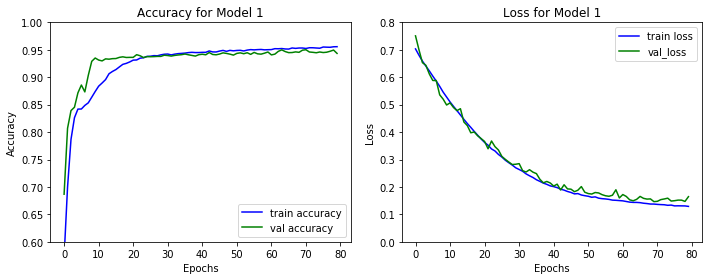

In [558]:
plot_accuracy_loss('Model 1', model1,(.6,1), (0,.8))

In [577]:
# from tensorflow.keras.backend import set_session
# sess = tf.Session()
# set_session(sess)
# sess.run(tf.global_variables_initializer())

In [578]:
model_1 = load_model('results/RNN/model1.h5')

FailedPreconditionError: Attempting to use uninitialized value training_46/RMSprop/Variable_8
	 [[{{node _retval_training_46/RMSprop/Variable_8_0_10}}]]

In [ ]:
y_train_pred1b = model_1.predict_classes(X_train, batch_size = 20455)
y_val_pred1b = model_1.predict_classes(X_val, batch_size = 5114)
y_train_prob1b = model_1.predict_proba(X_train, batch_size = 20455)
y_val_prob1b = model_1.predict_proba(X_val, batch_size = 5114)

In [ ]:
seaborn_confusion_matrix(y_train, y_train_pred1b)

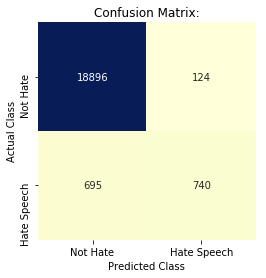

In [529]:
seaborn_confusion_matrix(y_train, y_train_pred1)

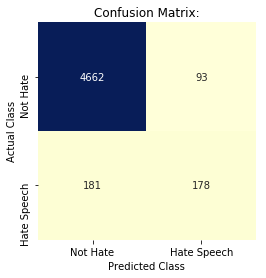

In [530]:
seaborn_confusion_matrix(y_val, y_val_pred1b)

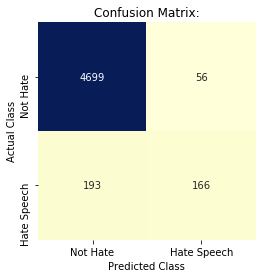

In [531]:
seaborn_confusion_matrix(y_val, y_val_pred1)

In [521]:
compare_classification_metrics(y_train, y_train_pred1b, y_val, y_val_pred1b)

{'Train Accuracy': 0.96,
 'Train Precision': 0.76,
 'Train Recall': 0.59,
 'Train F1': 0.66,
 'Validation Accuracy': 0.95,
 'Validation Precision': 0.66,
 'Validation Recall': 0.5,
 'Validation F1': 0.57}

In [319]:
compare_classification_metrics(y_train, y_train_pred1, y_val, y_val_pred1)

{'Train Accuracy': 0.96,
 'Train Precision': 0.86,
 'Train Recall': 0.52,
 'Train F1': 0.64,
 'Validation Accuracy': 0.95,
 'Validation Precision': 0.75,
 'Validation Recall': 0.46,
 'Validation F1': 0.57}

In [309]:
pd.DataFrame(y_val_prob1).describe()

,0
count,5114.000000
mean,0.072093
std,0.177928
min,0.000000
25%,0.006948
50%,0.013275
75%,0.037541
max,1.000000


Adjusted Accuracy: 0.9513101290574892
Adjusted Precision: 0.7477477477477478
Adjusted Recall: 0.4623955431754875
Adjusted F1 Score: 0.5714285714285715




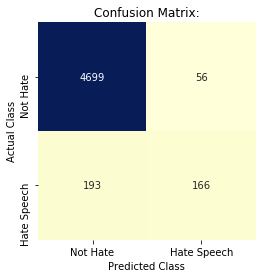

In [457]:
adj_y_val1, cm1 = adjust_threshold_and_score(y_val, y_val_prob1, .5, RNN = True)

### RNN 2 - class weights 

In [292]:
model2 = Sequential()

filepath = 'results/RNN/weights_model2.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 10), 
             ReduceLROnPlateau(monitor='val_loss', patience = 10),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model2.add(Embedding(num_words, 300, weights=[embedding_matrix300], input_length= 39, trainable=False))

model2.add(LSTM(64, activation='relu', return_sequences=True))
model2.add(BatchNormalization())

model2.add(LSTM(32, activation='relu'))
model2.add(BatchNormalization())

model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.00001), metrics=['accuracy']) #optimizer=Adam

print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, 39, 300)           11338500  
_________________________________________________________________
lstm_42 (LSTM)               (None, 39, 64)            93440     
_________________________________________________________________
batch_normalization_41 (Batc (None, 39, 64)            256       
_________________________________________________________________
lstm_43 (LSTM)               (None, 32)                12416     
_________________________________________________________________
batch_normalization_42 (Batc (None, 32)                128       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 11,444,773
Trainable params: 106,081
Non-trainable params: 11,338,692
__________________________________________________________

In [293]:
history = model2.fit(X_train, 
                    y_train,
                    epochs=150,
                    batch_size=50,
                    callbacks=callbacks,
                    class_weight=[{0:1,1:10}],
                    validation_data=(X_val, y_val))

Train on 20455 samples, validate on 5114 samples
Epoch 1/150
20455/20455 [==============================] - 131s 6ms/step - loss: 1.1685 - acc: 0.4917 - val_loss: 0.8395 - val_acc: 0.1060
Epoch 2/150
20455/20455 [==============================] - 112s 5ms/step - loss: 1.1197 - acc: 0.4352 - val_loss: 0.7327 - val_acc: 0.3684
Epoch 3/150
20455/20455 [==============================] - 113s 6ms/step - loss: 1.0961 - acc: 0.5033 - val_loss: 0.6810 - val_acc: 0.6873
Epoch 4/150
20455/20455 [==============================] - 113s 6ms/step - loss: 1.0500 - acc: 0.5874 - val_loss: 0.6562 - val_acc: 0.7073
Epoch 5/150
20455/20455 [==============================] - 113s 6ms/step - loss: 0.9909 - acc: 0.6432 - val_loss: 0.6544 - val_acc: 0.6819
Epoch 6/150
20455/20455 [==============================] - 115s 6ms/step - loss: 0.9085 - acc: 0.6482 - val_loss: 0.6483 - val_acc: 0.6776
Epoch 7/150
20455/20455 [==============================] - 113s 6ms/step - loss: 0.8596 - acc: 0.6734 - val_loss: 0.6

20455/20455 [==============================] - 124s 6ms/step - loss: 0.4824 - acc: 0.8943 - val_loss: 0.3192 - val_acc: 0.8835
Epoch 60/150
20455/20455 [==============================] - 119s 6ms/step - loss: 0.4797 - acc: 0.8933 - val_loss: 0.3290 - val_acc: 0.8780
Epoch 61/150
20455/20455 [==============================] - 131s 6ms/step - loss: 0.4835 - acc: 0.8941 - val_loss: 0.3045 - val_acc: 0.8872
Epoch 62/150
20455/20455 [==============================] - 141s 7ms/step - loss: 0.4708 - acc: 0.8940 - val_loss: 0.3141 - val_acc: 0.8827
Epoch 63/150
20455/20455 [==============================] - 132s 6ms/step - loss: 0.4645 - acc: 0.8945 - val_loss: 0.2910 - val_acc: 0.8956
Epoch 64/150
20455/20455 [==============================] - 114s 6ms/step - loss: 0.4756 - acc: 0.8987 - val_loss: 0.3338 - val_acc: 0.8729
Epoch 65/150
20455/20455 [==============================] - 128s 6ms/step - loss: 0.4690 - acc: 0.8960 - val_loss: 0.3114 - val_acc: 0.8876
Epoch 66/150
20455/20455 [=======

In [473]:
model2.save('results/RNN/model2.h5')
model2 = load_model('results/RNN/model2.h5')

AttributeError: 'Sequential' object has no attribute 'history'

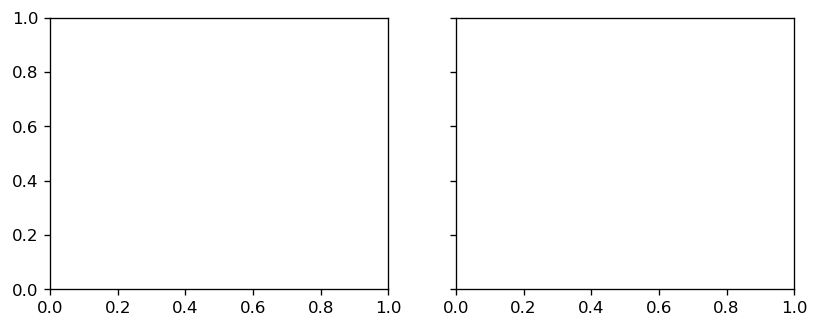

In [474]:
plot_accuracy_loss('Model 2', model2)

In [323]:
y_train_pred2 = model2.predict_classes(X_train, batch_size = 20455)
y_val_pred2 = model2.predict_classes(X_val, batch_size= 5114)
y_train_prob2 = model2.predict_proba(X_train, batch_size= 20455)
y_val_prob2 = model2.predict_proba(X_val, batch_size = 5114)

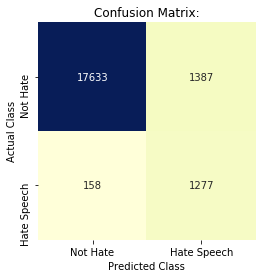

In [324]:
seaborn_confusion_matrix(y_train, y_train_pred2)

In [325]:
pd.DataFrame(y_train_prob2).describe()

,0
count,20455.000000
mean,0.192800
std,0.255865
min,0.000000
25%,0.045470
50%,0.072597
75%,0.198262
max,1.000000


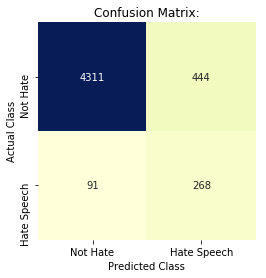

In [326]:
seaborn_confusion_matrix(y_val, y_val_pred2)

Adjusted Accuracy: 0.938991005084083
Adjusted Precision: 0.5650969529085873
Adjusted Recall: 0.5682451253481894
Adjusted F1 Score: 0.5666666666666667




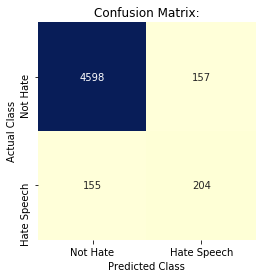

In [331]:
adj_y_val2, cm2 = adjust_threshold_and_score(y_val, y_val_prob2, .8, RNN = True)

## RNN 2b - class weights with larger batch size (100)

In [332]:
model2b = Sequential()

filepath = 'results/RNN/weights_model2b.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 15), 
             ReduceLROnPlateau(monitor='val_loss', patience = 15),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model2b.add(Embedding(num_words, 300, weights=[embedding_matrix300], input_length= 39, trainable=False))

model2b.add(LSTM(64, activation='relu', return_sequences=True))
model2b.add(BatchNormalization())

model2b.add(LSTM(32, activation='relu'))
model2b.add(BatchNormalization())

model2b.add(Dense(1, activation='sigmoid'))

model2b.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.000001), metrics=['accuracy']) #optimizer=Adam

print(model2b.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 39, 300)           11338500  
_________________________________________________________________
lstm_48 (LSTM)               (None, 39, 64)            93440     
_________________________________________________________________
batch_normalization_47 (Batc (None, 39, 64)            256       
_________________________________________________________________
lstm_49 (LSTM)               (None, 32)                12416     
_________________________________________________________________
batch_normalization_48 (Batc (None, 32)                128       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 11,444,773
Trainable params: 106,081
Non-trainable params: 11,338,692
__________________________________________________________

In [333]:
history = model2b.fit(X_train, 
                    y_train,
                    epochs=200,
                    batch_size=100,
                    callbacks=callbacks,
                    class_weight=[{0:1,1:10}],
                    validation_data=(X_val, y_val))

Train on 20455 samples, validate on 5114 samples
Epoch 1/200
20455/20455 [==============================] - 99s 5ms/step - loss: 1.1826 - acc: 0.3028 - val_loss: 0.7110 - val_acc: 0.3968
Epoch 2/200
20455/20455 [==============================] - 77s 4ms/step - loss: 1.1694 - acc: 0.3283 - val_loss: 0.7058 - val_acc: 0.6318
Epoch 3/200
20455/20455 [==============================] - 69s 3ms/step - loss: 1.1586 - acc: 0.3235 - val_loss: 0.7040 - val_acc: 0.6433
Epoch 4/200
20455/20455 [==============================] - 69s 3ms/step - loss: 1.1539 - acc: 0.3244 - val_loss: 0.7039 - val_acc: 0.6021
Epoch 5/200
20455/20455 [==============================] - 69s 3ms/step - loss: 1.1491 - acc: 0.3448 - val_loss: 0.7044 - val_acc: 0.6163
Epoch 6/200
20455/20455 [==============================] - 70s 3ms/step - loss: 1.1378 - acc: 0.3699 - val_loss: 0.7052 - val_acc: 0.6206
Epoch 7/200
20455/20455 [==============================] - 71s 3ms/step - loss: 1.1367 - acc: 0.3744 - val_loss: 0.6991 - v

20455/20455 [==============================] - 69s 3ms/step - loss: 0.9404 - acc: 0.6061 - val_loss: 0.6795 - val_acc: 0.6298
Epoch 60/200
20455/20455 [==============================] - 69s 3ms/step - loss: 0.9400 - acc: 0.6025 - val_loss: 0.6723 - val_acc: 0.6410
Epoch 61/200
20455/20455 [==============================] - 68s 3ms/step - loss: 0.9398 - acc: 0.6065 - val_loss: 0.6663 - val_acc: 0.6490
Epoch 62/200
20455/20455 [==============================] - 68s 3ms/step - loss: 0.9367 - acc: 0.6176 - val_loss: 0.6734 - val_acc: 0.6377
Epoch 63/200
20455/20455 [==============================] - 68s 3ms/step - loss: 0.9355 - acc: 0.6123 - val_loss: 0.6755 - val_acc: 0.6402
Epoch 64/200
20455/20455 [==============================] - 68s 3ms/step - loss: 0.9289 - acc: 0.6143 - val_loss: 0.6777 - val_acc: 0.6369
Epoch 65/200
20455/20455 [==============================] - 68s 3ms/step - loss: 0.9284 - acc: 0.6146 - val_loss: 0.6684 - val_acc: 0.6476
Epoch 66/200
20455/20455 [==============

Epoch 118/200
20455/20455 [==============================] - 69s 3ms/step - loss: 0.8282 - acc: 0.7168 - val_loss: 0.6181 - val_acc: 0.7272
Epoch 119/200
20455/20455 [==============================] - 69s 3ms/step - loss: 0.8255 - acc: 0.7149 - val_loss: 0.6105 - val_acc: 0.7309
Epoch 120/200
20455/20455 [==============================] - 68s 3ms/step - loss: 0.8266 - acc: 0.7194 - val_loss: 0.6166 - val_acc: 0.7284
Epoch 121/200
20455/20455 [==============================] - 68s 3ms/step - loss: 0.8250 - acc: 0.7224 - val_loss: 0.6216 - val_acc: 0.7253
Epoch 122/200
20455/20455 [==============================] - 69s 3ms/step - loss: 0.8257 - acc: 0.7207 - val_loss: 0.6166 - val_acc: 0.7255
Epoch 123/200
20455/20455 [==============================] - 69s 3ms/step - loss: 0.8221 - acc: 0.7212 - val_loss: 0.6078 - val_acc: 0.7360
Epoch 124/200
20455/20455 [==============================] - 69s 3ms/step - loss: 0.8234 - acc: 0.7243 - val_loss: 0.6186 - val_acc: 0.7251
Epoch 125/200
20455/

20455/20455 [==============================] - 68s 3ms/step - loss: 0.7713 - acc: 0.7552 - val_loss: 0.5756 - val_acc: 0.7605
Epoch 177/200
20455/20455 [==============================] - 68s 3ms/step - loss: 0.7726 - acc: 0.7524 - val_loss: 0.5717 - val_acc: 0.7626
Epoch 178/200
20455/20455 [==============================] - 69s 3ms/step - loss: 0.7665 - acc: 0.7562 - val_loss: 0.5670 - val_acc: 0.7689
Epoch 179/200
20455/20455 [==============================] - 69s 3ms/step - loss: 0.7690 - acc: 0.7609 - val_loss: 0.5729 - val_acc: 0.7638
Epoch 180/200
20455/20455 [==============================] - 69s 3ms/step - loss: 0.7648 - acc: 0.7611 - val_loss: 0.5685 - val_acc: 0.7679
Epoch 181/200
20455/20455 [==============================] - 68s 3ms/step - loss: 0.7703 - acc: 0.7616 - val_loss: 0.5707 - val_acc: 0.7685
Epoch 182/200
20455/20455 [==============================] - 69s 3ms/step - loss: 0.7691 - acc: 0.7613 - val_loss: 0.5733 - val_acc: 0.7642
Epoch 183/200
20455/20455 [=======

In [461]:
model2b.save = 'results/RNN/model2b300.h5'
# model2b = load_model('results/RNN/model2b300.h5')

In [ ]:
%run my_functions.ipynb_functions.ipynb

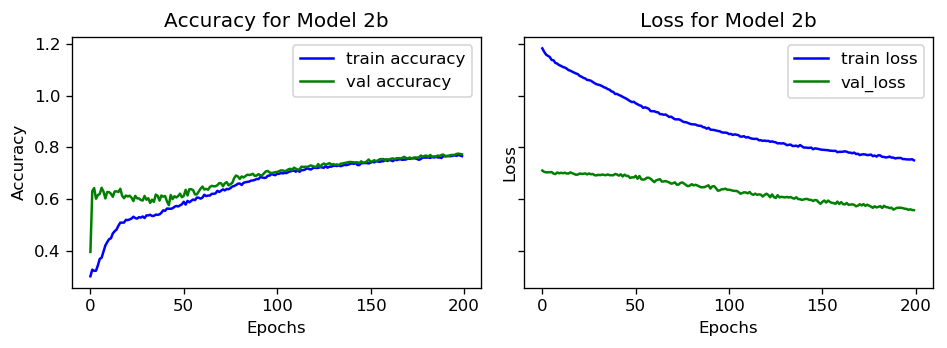

In [471]:
plot_accuracy_loss('Model 2b', model2b)

In [335]:
y_train_pred2b = model2b.predict_classes(X_train, batch_size = 20455)
y_val_pred2b = model2b.predict_classes(X_val, batch_size = 5144)
y_train_prob2b = model2b.predict_proba(X_train, batch_size = 20455)
y_val_prob2b = model2b.predict_proba(X_val, batch_size = 5114)

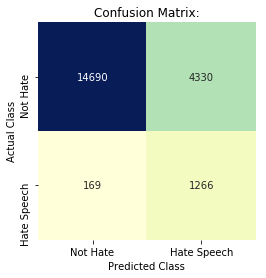

In [336]:
seaborn_confusion_matrix(y_train, y_train_pred2b)

In [337]:
pd.DataFrame(y_train_prob2b).describe()

,0
count,20455.000000
mean,0.419482
std,0.200035
min,0.000000
25%,0.275010
50%,0.346551
75%,0.523770
max,1.000000


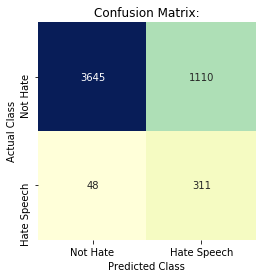

In [338]:
seaborn_confusion_matrix(y_val, y_val_pred2b)

Adjusted Accuracy: 0.9272585060617912
Adjusted Precision: 0.4836272040302267
Adjusted Recall: 0.5348189415041783
Adjusted F1 Score: 0.5079365079365079




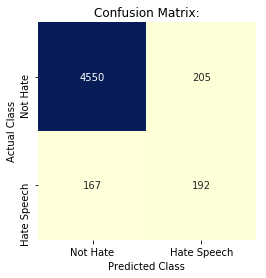

In [339]:
adj_y_val2b, cm2b = adjust_threshold_and_score(y_val, y_val_prob2b, .8, RNN = True)

# RNN 3 - upsampling # 1 - lr .000001, patience 10

In [340]:
X_train_up, y_train_up = upsample_training_data(X_train, y_train)

In [348]:
model3 = Sequential()

filepath = 'results/RNN/weights.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 10), 
             ReduceLROnPlateau(monitor='val_loss', patience = 10),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model3.add(Embedding(num_words, 300, weights=[embedding_matrix300], input_length= 39, trainable=False))

model3.add(LSTM(64, activation='relu', return_sequences=True))
model3.add(BatchNormalization())

model3.add(LSTM(32, activation='relu'))
model3.add(BatchNormalization())

model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.000001), metrics=['accuracy']) #optimizer=Adam

print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, 39, 300)           11338500  
_________________________________________________________________
lstm_56 (LSTM)               (None, 39, 64)            93440     
_________________________________________________________________
batch_normalization_55 (Batc (None, 39, 64)            256       
_________________________________________________________________
lstm_57 (LSTM)               (None, 32)                12416     
_________________________________________________________________
batch_normalization_56 (Batc (None, 32)                128       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 11,444,773
Trainable params: 106,081
Non-trainable params: 11,338,692
__________________________________________________________

In [349]:
history = model3.fit(X_train_up, 
                    y_train_up,
                    epochs=200,
                    batch_size=50,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

Train on 38040 samples, validate on 5114 samples
Epoch 1/200
38040/38040 [==============================] - 231s 6ms/step - loss: 1.0912 - acc: 0.4590 - val_loss: 0.9713 - val_acc: 0.8082
Epoch 2/200
38040/38040 [==============================] - 206s 5ms/step - loss: 1.0259 - acc: 0.4651 - val_loss: 0.9611 - val_acc: 0.8103
Epoch 3/200
38040/38040 [==============================] - 206s 5ms/step - loss: 0.9708 - acc: 0.4725 - val_loss: 0.9322 - val_acc: 0.8180
Epoch 4/200
38040/38040 [==============================] - 206s 5ms/step - loss: 0.9148 - acc: 0.4844 - val_loss: 0.8722 - val_acc: 0.8154
Epoch 5/200
38040/38040 [==============================] - 225s 6ms/step - loss: 0.8457 - acc: 0.5050 - val_loss: 0.7903 - val_acc: 0.8395
Epoch 6/200
38040/38040 [==============================] - 237s 6ms/step - loss: 0.7958 - acc: 0.5143 - val_loss: 0.7556 - val_acc: 0.8453
Epoch 7/200
38040/38040 [==============================] - 224s 6ms/step - loss: 0.7674 - acc: 0.5193 - val_loss: 0.7

38040/38040 [==============================] - 275s 7ms/step - loss: 0.3680 - acc: 0.8441 - val_loss: 0.3797 - val_acc: 0.8402
Epoch 60/200
38040/38040 [==============================] - 308s 8ms/step - loss: 0.3648 - acc: 0.8461 - val_loss: 0.3823 - val_acc: 0.8365
Epoch 61/200
38040/38040 [==============================] - 304s 8ms/step - loss: 0.3661 - acc: 0.8461 - val_loss: 0.3761 - val_acc: 0.8455
Epoch 62/200
38040/38040 [==============================] - 255s 7ms/step - loss: 0.3622 - acc: 0.8470 - val_loss: 0.3774 - val_acc: 0.8422
Epoch 63/200
38040/38040 [==============================] - 246s 6ms/step - loss: 0.3633 - acc: 0.8462 - val_loss: 0.3752 - val_acc: 0.8408
Epoch 64/200
38040/38040 [==============================] - 245s 6ms/step - loss: 0.3606 - acc: 0.8487 - val_loss: 0.3679 - val_acc: 0.8488
Epoch 65/200
38040/38040 [==============================] - 269s 7ms/step - loss: 0.3600 - acc: 0.8491 - val_loss: 0.3659 - val_acc: 0.8481
Epoch 66/200
38040/38040 [=======

In [467]:
model3.save = 'results/RNN/model3_300.h5'
# model3 = load_model('results/RNN/model3_300.h5')

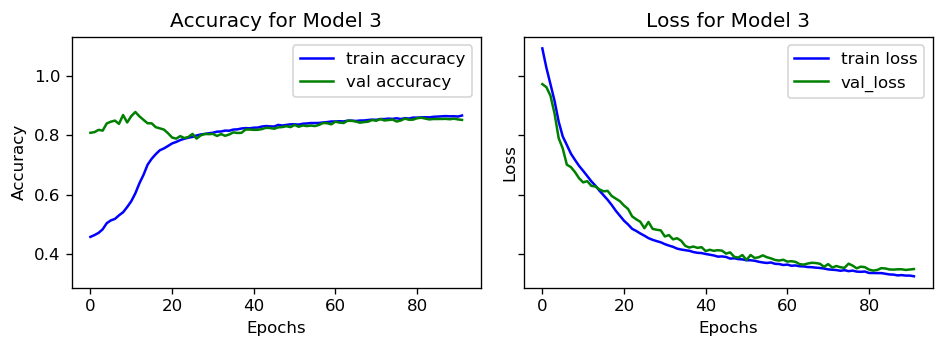

In [470]:
plot_accuracy_loss('Model 3', model3)

In [351]:
y_train_pred3 = model3.predict_classes(X_train_up, batch_size = 38040)
y_val_pred3 = model3.predict_classes(X_val, batch_size = 5114)
y_train_prob3 = model3.predict_proba(X_train_up, batch_size = 38040)
y_val_prob3 = model3.predict_proba(X_val, batch_size = 5114)

In [352]:
pd.DataFrame(y_train_prob3).describe()

,0
count,38040.000000
mean,0.506714
std,0.351552
min,0.000000
25%,0.122754
50%,0.550893
75%,0.867378
max,1.000000


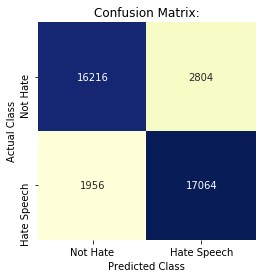

In [353]:
seaborn_confusion_matrix(y_train_up, y_train_pred3)

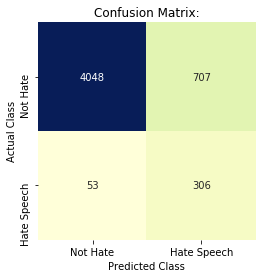

In [354]:
seaborn_confusion_matrix(y_val, y_val_pred3)

In [355]:
compare_classification_metrics(y_train_up, y_train_pred3, y_val, y_val_pred3)

{'Train Accuracy': 0.87,
 'Train Precision': 0.86,
 'Train Recall': 0.9,
 'Train F1': 0.88,
 'Validation Accuracy': 0.85,
 'Validation Precision': 0.3,
 'Validation Recall': 0.85,
 'Validation F1': 0.45}

Adjusted Accuracy: 0.9335158388736801
Adjusted Precision: 0.5219399538106235
Adjusted Recall: 0.6295264623955432
Adjusted F1 Score: 0.5707070707070707




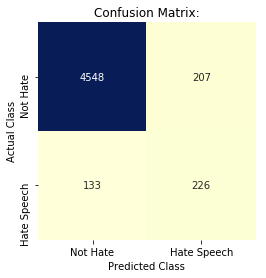

In [357]:
y_adj_val3, cm3 = adjust_threshold_and_score (y_val, y_val_prob3, .8, RNN = True)

## RNN 3b - Upsampling   
increased learning rate to .0001 before, which increased adj F1 to .58... now decreasing again.

Decreased learning rate to .00001-->  decreased adjusted F1 to .51

Now increasing learning rate to .001  --> reduced F1 to .42 

(lr=.0001) and batch size 100 -->. adj F1 is .57 -- maybe reduce batch size again?  

 ---> reduced batch size to 50 and got F1 of .58, but graph is all straight lines.... try reducing learning rate again to .00001?  --> curved lines, but reduced F1 to .47 by doing this
 
 now trying to add dropout - add two dropout layers of .01, and got adjusted F1 to .55
 
 now trying to increase dropout to .2

In [ ]:
model3b = Sequential()

filepath = 'results/RNN/weights.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 10), 
             ReduceLROnPlateau(monitor='val_loss', patience = 10),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model3b.add(Embedding(num_words, 300, weights=[embedding_matrix300], input_length= 39, trainable=False))

model3b.add(LSTM(64, activation='relu', return_sequences=True))
model3b.add(BatchNormalization())
model3b.add(Dropout(.2))

model3b.add(LSTM(32, activation='relu'))
model3b.add(BatchNormalization())
model3b.add(Dropout(.2))

model3b.add(Dense(1, activation='sigmoid'))

model3b.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.0001), metrics=['accuracy']) 

print(model3b.summary())

In [ ]:
history = model3b.fit(X_train_up, 
                    y_train_up,
                    epochs=200,
                    batch_size=50,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

In [ ]:
model3b.save('results/RNN/model3b.model')

plt.figure(figsize=(8,5))

plt.plot(model3b.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model3b.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model3b.history.history['loss'], color='red', label='train loss')
plt.plot(model3b.history.history['val_loss'], color = 'yellow', label='val loss')

plt.title("Plotting Accuracy and Loss")
plt.legend()

model3b.evaluate(X_val, y_val)

In [ ]:
y_train_pred3b = model3b.predict_classes(X_train_up, batch_size = 38040)
y_val_pred3b = model3b.predict_classes(X_val, batch_size = 5114)
y_train_prob3b = model3b.predict_proba(X_train_up, batch_size = 5114)
y_val_prob3b = model3b.predict_proba(X_val, batch_size = 38040)

In [ ]:
pd.DataFrame(y_train_prob3b).describe()

In [ ]:
seaborn_confusion_matrix(y_train_up, y_train_pred3b)

In [ ]:
seaborn_confusion_matrix(y_val, y_val_pred3b)

In [ ]:
compare_classification_metrics(y_train_up, y_train_pred3b, y_val, y_val_pred3b)

In [ ]:
y_adj_val3b, cm3b = adjust_threshold_and_score(y_val, y_val_prob3b, .8, RNN = True)

## RNN 3c - upsampling - removing dropout

In [ ]:
model3c = Sequential()

filepath = 'results/RNN/weights_3c.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 10), 
             ReduceLROnPlateau(monitor='val_loss', patience = 10),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model3c.add(Embedding(num_words, 300, weights=[embedding_matrix]300, input_length= 39, trainable=False))

model3c.add(LSTM(64, activation='relu', return_sequences=True))
model3c.add(BatchNormalization())

model3c.add(LSTM(32, activation='relu'))
model3c.add(BatchNormalization())

model3c.add(Dense(1, activation='sigmoid'))

model3c.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.0001), metrics=['accuracy']) #optimizer=Adam

print(model3c.summary())

In [ ]:
history = model3c.fit(X_train_up, 
                    y_train_up,
                    epochs=200,
                    batch_size=50,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

In [ ]:
model3c.save('results/RNN/model3c.model')

plt.figure(figsize=(8,5))

plt.plot(model3c.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model3c.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model3c.history.history['loss'], color='red', label='train loss')
plt.plot(model3c.history.history['val_loss'], color = 'yellow', label='val loss')

plt.title("Plotting Accuracy and Loss")
plt.legend()

model3c.evaluate(X_val, y_val)

In [ ]:
y_train_pred3c = model3c.predict_classes(X_train_up, batch_size = 38040)
y_val_pred3c = model3c.predict_classes(X_val, batch_size = 5114)
y_train_prob3c = model3c.predict_proba(X_train_up, batch_size = 38040))
y_val_prob3c = model3c.predict_proba(X_val, batch_size = 5114)

In [90]:
pd.DataFrame(y_train_pred3c).describe()

,0
count,38040.000000
mean,0.518219
std,0.452722
min,0.000000
25%,0.016814
50%,0.855620
75%,0.949647
max,1.000000


In [ ]:
y_adj_val3c, cm3c = adjust_threshold_and_score(y_val, y_val_pred3c, .9, RNN = True)

In [97]:
compare_classification_metrics2(y_train_up, y_train_pred3c, y_val, y_val_pred3c, RNN = True)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

## RNN 3c2c - upsampling with increased patience, epochs and batch size

In [227]:
model3c2c = Sequential()

filepath = 'results/RNN/weights_3c2c.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 35), 
             ReduceLROnPlateau(monitor='val_loss', patience = 35),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model3c2c.add(Embedding(num_words, 300, weights=[embedding_matrix300], input_length= 39, trainable=False))

model3c2c.add(LSTM(64, activation='relu', return_sequences=True))
model3c2c.add(BatchNormalization())
#model3c2c.add(Dropout(.01))

model3c2c.add(LSTM(32, activation='relu'))
model3c2c.add(BatchNormalization())
# model3c2c.add(Dropout(.01))

model3c2c.add(Dense(1, activation='sigmoid'))

model3c2c.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.000001), metrics=['accuracy']) #optimizer=Adam

print(model3c2c.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 39, 300)           11338500  
_________________________________________________________________
lstm_24 (LSTM)               (None, 39, 64)            93440     
_________________________________________________________________
batch_normalization_23 (Batc (None, 39, 64)            256       
_________________________________________________________________
lstm_25 (LSTM)               (None, 32)                12416     
_________________________________________________________________
batch_normalization_24 (Batc (None, 32)                128       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 11,444,773
Trainable params: 106,081
Non-trainable params: 11,338,692
__________________________________________________________

In [228]:
history = model3c2c.fit(X_train_up, 
                    y_train_up,
                    epochs=200,
                    batch_size=50,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

Train on 38040 samples, validate on 5114 samples
Epoch 1/200
38040/38040 [==============================] - 236s 6ms/step - loss: 0.7365 - acc: 0.5078 - val_loss: 0.7038 - val_acc: 0.1934
Epoch 2/200
38040/38040 [==============================] - 218s 6ms/step - loss: 0.7186 - acc: 0.5175 - val_loss: 0.7035 - val_acc: 0.4363
Epoch 3/200
38040/38040 [==============================] - 261s 7ms/step - loss: 0.7062 - acc: 0.5361 - val_loss: 0.6963 - val_acc: 0.5446
Epoch 4/200
38040/38040 [==============================] - 234s 6ms/step - loss: 0.7015 - acc: 0.5454 - val_loss: 0.6914 - val_acc: 0.6506
Epoch 5/200
38040/38040 [==============================] - 217s 6ms/step - loss: 0.6969 - acc: 0.5554 - val_loss: 0.6882 - val_acc: 0.6609
Epoch 6/200
38040/38040 [==============================] - 226s 6ms/step - loss: 0.6901 - acc: 0.5687 - val_loss: 0.6859 - val_acc: 0.6605
Epoch 7/200
38040/38040 [==============================] - 234s 6ms/step - loss: 0.6849 - acc: 0.5780 - val_loss: 0.6

38040/38040 [==============================] - 204s 5ms/step - loss: 0.3574 - acc: 0.8460 - val_loss: 0.3774 - val_acc: 0.8369
Epoch 60/200
38040/38040 [==============================] - 208s 5ms/step - loss: 0.3562 - acc: 0.8469 - val_loss: 0.3778 - val_acc: 0.8365
Epoch 61/200
38040/38040 [==============================] - 204s 5ms/step - loss: 0.3530 - acc: 0.8475 - val_loss: 0.3822 - val_acc: 0.8332
Epoch 62/200
38040/38040 [==============================] - 204s 5ms/step - loss: 0.3517 - acc: 0.8487 - val_loss: 0.3794 - val_acc: 0.8359
Epoch 63/200
38040/38040 [==============================] - 203s 5ms/step - loss: 0.3510 - acc: 0.8485 - val_loss: 0.3756 - val_acc: 0.8387
Epoch 64/200
38040/38040 [==============================] - 203s 5ms/step - loss: 0.3507 - acc: 0.8493 - val_loss: 0.3716 - val_acc: 0.8402
Epoch 65/200
38040/38040 [==============================] - 203s 5ms/step - loss: 0.3478 - acc: 0.8508 - val_loss: 0.3744 - val_acc: 0.8379
Epoch 66/200
38040/38040 [=======

38040/38040 [==============================] - 205s 5ms/step - loss: 0.3023 - acc: 0.8753 - val_loss: 0.3466 - val_acc: 0.8528
Epoch 118/200
38040/38040 [==============================] - 204s 5ms/step - loss: 0.3002 - acc: 0.8742 - val_loss: 0.3355 - val_acc: 0.8567
Epoch 119/200
38040/38040 [==============================] - 204s 5ms/step - loss: 0.3002 - acc: 0.8751 - val_loss: 0.3466 - val_acc: 0.8520
Epoch 120/200
38040/38040 [==============================] - 204s 5ms/step - loss: 0.3003 - acc: 0.8753 - val_loss: 0.3409 - val_acc: 0.8555
Epoch 121/200
38040/38040 [==============================] - 203s 5ms/step - loss: 0.2988 - acc: 0.8775 - val_loss: 0.3408 - val_acc: 0.8537
Epoch 122/200
38040/38040 [==============================] - 201s 5ms/step - loss: 0.2989 - acc: 0.8759 - val_loss: 0.3374 - val_acc: 0.8565
Epoch 123/200
38040/38040 [==============================] - 202s 5ms/step - loss: 0.2968 - acc: 0.8774 - val_loss: 0.3435 - val_acc: 0.8535
Epoch 124/200
38040/38040 [

38040/38040 [==============================] - 280s 7ms/step - loss: 0.2561 - acc: 0.9005 - val_loss: 0.3027 - val_acc: 0.8725
Epoch 176/200
38040/38040 [==============================] - 237s 6ms/step - loss: 0.2589 - acc: 0.9006 - val_loss: 0.3176 - val_acc: 0.8672
Epoch 177/200
38040/38040 [==============================] - 227s 6ms/step - loss: 0.2567 - acc: 0.9008 - val_loss: 0.3017 - val_acc: 0.8721
Epoch 178/200
38040/38040 [==============================] - 243s 6ms/step - loss: 0.2576 - acc: 0.8997 - val_loss: 0.3128 - val_acc: 0.8713
Epoch 179/200
38040/38040 [==============================] - 240s 6ms/step - loss: 0.2538 - acc: 0.9015 - val_loss: 0.3124 - val_acc: 0.8715
Epoch 180/200
38040/38040 [==============================] - 280s 7ms/step - loss: 0.2549 - acc: 0.9019 - val_loss: 0.3110 - val_acc: 0.8702
Epoch 181/200
38040/38040 [==============================] - 275s 7ms/step - loss: 0.2550 - acc: 0.9009 - val_loss: 0.3099 - val_acc: 0.8706
Epoch 182/200
38040/38040 [

In [ ]:
model3c2c.save('results/RNN/model3c2c.model')

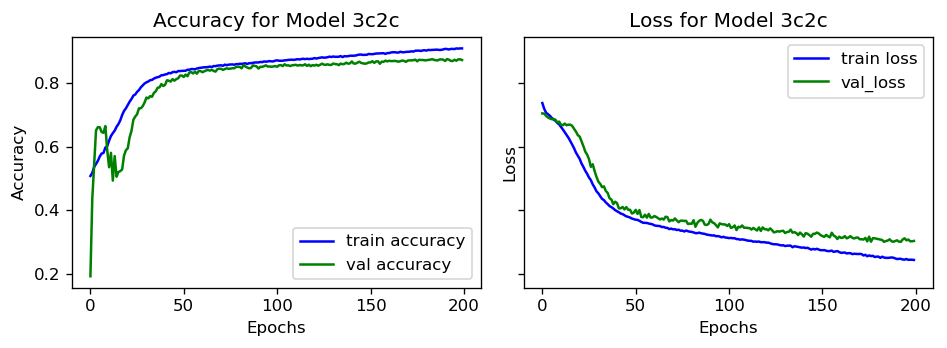

In [485]:
plot_accuracy_loss('Model 3c2c', model3c2c)

In [230]:
y_train_pred3c2c= model3c2c.predict_classes(X_train_up, batch_size = 38040)
y_val_pred3c2c= model3c2c.predict_classes(X_val, batch_size = 5114)
y_train_prob3c2c = model3c2c.predict_proba(X_train_up, batch_size = 38040)
y_val_prob3c2c = model3c2c.predict_proba(X_val, batch_size = 5114)

In [231]:
compare_classification_metrics(y_train_up, y_train_pred3c2c, y_val, y_val_pred3c2c)

{'Train Accuracy': 0.92,
 'Train Precision': 0.89,
 'Train Recall': 0.95,
 'Train F1': 0.92,
 'Validation Accuracy': 0.87,
 'Validation Precision': 0.33,
 'Validation Recall': 0.82,
 'Validation F1': 0.47}

Adjusted Accuracy: 0.9429018380915135
Adjusted Precision: 0.6050156739811913
Adjusted Recall: 0.5376044568245125
Adjusted F1 Score: 0.5693215339233039




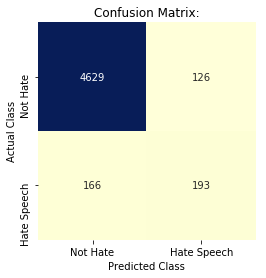

In [232]:
adj3c, cm3 = adjust_threshold_and_score(y_val, y_val_prob3c2c, .9, RNN = True)

## RNN 3c2b - upsampling with increased patience, dropout .01

In [361]:
model3c2b = Sequential()

filepath = 'results/RNN/weights_3c2b.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 30), 
             ReduceLROnPlateau(monitor='val_loss', patience = 30),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model3c2b.add(Embedding(num_words, 300, weights=[embedding_matrix300], input_length= 39, trainable=False))

model3c2b.add(LSTM(64, activation='relu', return_sequences=True))
model3c2b.add(BatchNormalization())
model3c2b.add(Dropout(.01))

model3c2b.add(LSTM(32, activation='relu'))
model3c2b.add(BatchNormalization())
model3c2b.add(Dropout(.01))

model3c2b.add(Dense(1, activation='sigmoid'))

model3c2b.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.000001), metrics=['accuracy']) #optimizer=Adam

print(model3c2b.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 39, 300)           11338500  
_________________________________________________________________
lstm_60 (LSTM)               (None, 39, 64)            93440     
_________________________________________________________________
batch_normalization_59 (Batc (None, 39, 64)            256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 39, 64)            0         
_________________________________________________________________
lstm_61 (LSTM)               (None, 32)                12416     
_________________________________________________________________
batch_normalization_60 (Batc (None, 32)                128       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
__________

In [362]:
history = model3c2b.fit(X_train_up, 
                    y_train_up,
                    epochs=200,
                    batch_size=50,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

Train on 38040 samples, validate on 5114 samples
Epoch 1/200
38040/38040 [==============================] - 270s 7ms/step - loss: 0.6970 - acc: 0.5458 - val_loss: 0.7339 - val_acc: 0.4378
Epoch 2/200
38040/38040 [==============================] - 209s 6ms/step - loss: 0.6827 - acc: 0.5619 - val_loss: 0.7270 - val_acc: 0.3815
Epoch 3/200
38040/38040 [==============================] - 210s 6ms/step - loss: 0.6703 - acc: 0.5752 - val_loss: 0.7112 - val_acc: 0.2726
Epoch 4/200
38040/38040 [==============================] - 210s 6ms/step - loss: 0.6626 - acc: 0.5852 - val_loss: 0.7055 - val_acc: 0.2370
Epoch 5/200
38040/38040 [==============================] - 209s 5ms/step - loss: 0.6540 - acc: 0.5941 - val_loss: 0.7016 - val_acc: 0.2474
Epoch 6/200
38040/38040 [==============================] - 209s 5ms/step - loss: 0.6497 - acc: 0.5976 - val_loss: 0.6879 - val_acc: 0.2614
Epoch 7/200
38040/38040 [==============================] - 211s 6ms/step - loss: 0.6430 - acc: 0.6077 - val_loss: 0.6

38040/38040 [==============================] - 211s 6ms/step - loss: 0.3902 - acc: 0.8294 - val_loss: 0.4378 - val_acc: 0.7478
Epoch 60/200
38040/38040 [==============================] - 210s 6ms/step - loss: 0.3883 - acc: 0.8311 - val_loss: 0.4395 - val_acc: 0.7481
Epoch 61/200
38040/38040 [==============================] - 211s 6ms/step - loss: 0.3869 - acc: 0.8334 - val_loss: 0.4368 - val_acc: 0.7376
Epoch 62/200
38040/38040 [==============================] - 211s 6ms/step - loss: 0.3855 - acc: 0.8343 - val_loss: 0.4359 - val_acc: 0.7526
Epoch 63/200
38040/38040 [==============================] - 210s 6ms/step - loss: 0.3813 - acc: 0.8365 - val_loss: 0.4181 - val_acc: 0.7648
Epoch 64/200
38040/38040 [==============================] - 211s 6ms/step - loss: 0.3814 - acc: 0.8355 - val_loss: 0.4191 - val_acc: 0.7636
Epoch 65/200
38040/38040 [==============================] - 210s 6ms/step - loss: 0.3784 - acc: 0.8379 - val_loss: 0.4189 - val_acc: 0.7607
Epoch 66/200
38040/38040 [=======

38040/38040 [==============================] - 211s 6ms/step - loss: 0.3282 - acc: 0.8645 - val_loss: 0.3591 - val_acc: 0.8201
Epoch 118/200
38040/38040 [==============================] - 210s 6ms/step - loss: 0.3284 - acc: 0.8627 - val_loss: 0.3614 - val_acc: 0.8250
Epoch 119/200
38040/38040 [==============================] - 211s 6ms/step - loss: 0.3277 - acc: 0.8637 - val_loss: 0.3554 - val_acc: 0.8254
Epoch 120/200
38040/38040 [==============================] - 212s 6ms/step - loss: 0.3254 - acc: 0.8651 - val_loss: 0.3695 - val_acc: 0.8170
Epoch 121/200
38040/38040 [==============================] - 211s 6ms/step - loss: 0.3258 - acc: 0.8659 - val_loss: 0.3522 - val_acc: 0.8283
Epoch 122/200
38040/38040 [==============================] - 211s 6ms/step - loss: 0.3265 - acc: 0.8639 - val_loss: 0.3685 - val_acc: 0.8176
Epoch 123/200
38040/38040 [==============================] - 211s 6ms/step - loss: 0.3245 - acc: 0.8663 - val_loss: 0.3654 - val_acc: 0.8213
Epoch 124/200
38040/38040 [

38040/38040 [==============================] - 228s 6ms/step - loss: 0.2953 - acc: 0.8839 - val_loss: 0.3454 - val_acc: 0.8393
Epoch 176/200
38040/38040 [==============================] - 239s 6ms/step - loss: 0.2950 - acc: 0.8831 - val_loss: 0.3446 - val_acc: 0.8410
Epoch 177/200
38040/38040 [==============================] - 258s 7ms/step - loss: 0.2919 - acc: 0.8842 - val_loss: 0.3551 - val_acc: 0.8307
Epoch 178/200
38040/38040 [==============================] - 191s 5ms/step - loss: 0.2918 - acc: 0.8847 - val_loss: 0.3410 - val_acc: 0.8442
Epoch 179/200
38040/38040 [==============================] - 220s 6ms/step - loss: 0.2936 - acc: 0.8835 - val_loss: 0.3421 - val_acc: 0.8422
Epoch 180/200
38040/38040 [==============================] - 219s 6ms/step - loss: 0.2931 - acc: 0.8840 - val_loss: 0.3405 - val_acc: 0.8451
Epoch 181/200
38040/38040 [==============================] - 231s 6ms/step - loss: 0.2923 - acc: 0.8840 - val_loss: 0.3365 - val_acc: 0.8447
Epoch 182/200
38040/38040 [

In [ ]:
model3c2b.save('results/RNN/model3c2b.model')

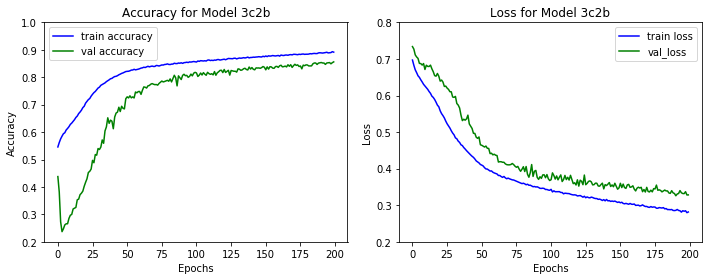

In [574]:
plot_accuracy_loss('Model 3c2b', model3c2b, (.2,1), (.2,.8))

In [364]:
y_train_pred3c2b = model3c2b.predict_classes(X_train_up, batch_size = 38040)
y_val_pred3c2b= model3c2b.predict_classes(X_val, batch_size = 5114)
y_train_prob3c2b = model3c2b.predict_proba(X_train_up, batch_size = 38040)
y_val_prob3c2b = model3c2b.predict_proba(X_val, batch_size = 5114)

In [365]:
compare_classification_metrics(y_train_up, y_train_pred3c2b, y_val, y_val_pred3c2b)

{'Train Accuracy': 0.9,
 'Train Precision': 0.87,
 'Train Recall': 0.95,
 'Train F1': 0.91,
 'Validation Accuracy': 0.86,
 'Validation Precision': 0.31,
 'Validation Recall': 0.84,
 'Validation F1': 0.45}

Adjusted Accuracy: 0.9204145482987877
Adjusted Precision: 0.45571955719557194
Adjusted Recall: 0.6880222841225627
Adjusted F1 Score: 0.5482796892341842




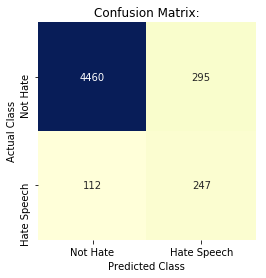

In [366]:
adj3c, cm3 = adjust_threshold_and_score(y_val, y_val_prob3c2b, .8, RNN = True)

## RNN 3c2 - with patience 30

In [233]:
model3c2 = Sequential()

filepath = 'results/RNN/weights_3c2.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 30), 
             ReduceLROnPlateau(monitor='val_loss', patience = 30),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model3c2.add(Embedding(num_words, 300, weights=[embedding_matrix300], input_length= 39, trainable=False))

model3c2.add(LSTM(64, activation='relu', return_sequences=True))
model3c2.add(BatchNormalization())

model3c2.add(LSTM(32, activation='relu'))
model3c2.add(BatchNormalization())

model3c2.add(Dense(1, activation='sigmoid'))

model3c2.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.000001), metrics=['accuracy']) #optimizer=Adam

print(model3c2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 39, 300)           11338500  
_________________________________________________________________
lstm_26 (LSTM)               (None, 39, 64)            93440     
_________________________________________________________________
batch_normalization_25 (Batc (None, 39, 64)            256       
_________________________________________________________________
lstm_27 (LSTM)               (None, 32)                12416     
_________________________________________________________________
batch_normalization_26 (Batc (None, 32)                128       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 11,444,773
Trainable params: 106,081
Non-trainable params: 11,338,692
__________________________________________________________

In [234]:
history = model3c2.fit(X_train_up, 
                    y_train_up,
                    epochs=100,
                    batch_size=50,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

Train on 38040 samples, validate on 5114 samples
Epoch 1/100
38040/38040 [==============================] - 330s 9ms/step - loss: 0.6793 - acc: 0.5523 - val_loss: 0.7092 - val_acc: 0.4859
Epoch 2/100
38040/38040 [==============================] - 257s 7ms/step - loss: 0.6644 - acc: 0.6118 - val_loss: 0.7142 - val_acc: 0.7018
Epoch 3/100
38040/38040 [==============================] - 299s 8ms/step - loss: 0.6532 - acc: 0.6526 - val_loss: 0.7087 - val_acc: 0.6693
Epoch 4/100
38040/38040 [==============================] - 246s 6ms/step - loss: 0.6450 - acc: 0.6695 - val_loss: 0.6911 - val_acc: 0.7487
Epoch 5/100
38040/38040 [==============================] - 249s 7ms/step - loss: 0.6333 - acc: 0.6902 - val_loss: 0.6795 - val_acc: 0.7198
Epoch 6/100
38040/38040 [==============================] - 256s 7ms/step - loss: 0.6223 - acc: 0.7050 - val_loss: 0.6616 - val_acc: 0.7560
Epoch 7/100
38040/38040 [==============================] - 281s 7ms/step - loss: 0.6100 - acc: 0.7165 - val_loss: 0.6

38040/38040 [==============================] - 213s 6ms/step - loss: 0.3670 - acc: 0.8416 - val_loss: 0.3786 - val_acc: 0.8283
Epoch 60/100
38040/38040 [==============================] - 230s 6ms/step - loss: 0.3663 - acc: 0.8427 - val_loss: 0.3759 - val_acc: 0.8266
Epoch 61/100
38040/38040 [==============================] - 211s 6ms/step - loss: 0.3652 - acc: 0.8438 - val_loss: 0.3680 - val_acc: 0.8410
Epoch 62/100
38040/38040 [==============================] - 233s 6ms/step - loss: 0.3629 - acc: 0.8427 - val_loss: 0.3778 - val_acc: 0.8295
Epoch 63/100
38040/38040 [==============================] - 224s 6ms/step - loss: 0.3606 - acc: 0.8451 - val_loss: 0.3730 - val_acc: 0.8330
Epoch 64/100
38040/38040 [==============================] - 261s 7ms/step - loss: 0.3607 - acc: 0.8447 - val_loss: 0.3710 - val_acc: 0.8404
Epoch 65/100
38040/38040 [==============================] - 231s 6ms/step - loss: 0.3618 - acc: 0.8446 - val_loss: 0.3756 - val_acc: 0.8316
Epoch 66/100
38040/38040 [=======

KeyboardInterrupt: 

In [ ]:
model3c2.save('results/RNN/model3c2.model')
plt.figure(figsize=(8,5))

plt.plot(model3c2.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model3c2.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model3c2.history.history['loss'], color='red', label='train loss')
plt.plot(model3c2.history.history['val_loss'], color = 'yellow', label='val loss')

plt.title("Accuracy and Loss")
plt.legend()

model3c2.evaluate(X_val, y_val)

In [ ]:
y_train_pred3c2 = model3c2.predict_classes(X_train_up, batch_size = 38040)
y_val_pred3c2 = model3c2.predict_classes(X_val, batch_size = 5114)
y_train_prob3c2 = model3c2.predict_proba(X_train_up, batch_size = 38040)
y_val_prob3c2 = model3c2.predict_proba(X_val, batch_size = 5114)

In [ ]:
compare_classification_metrics(y_train_up, y_train_pred3c2, y_val, y_val_pred3c2)

In [ ]:
adj3c, cm3 = adjust_threshold_and_score(y_val, y_val_prob3c2,.9, RNN = True)

In [111]:
pd.DataFrame(y_train_pred3c2)

,0
0,0.970075
1,0.987097
2,0.982161
3,0.980149
4,0.999614
5,0.982664
6,0.978553
7,0.848262
8,0.993317
9,0.989300


## RNN 3d - upsampling;  using 3c parameters + Adam optimizer

In [607]:
model3d = Sequential()

filepath = 'results/RNN/weights.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 5), 
             ReduceLROnPlateau(monitor='val_loss', patience = 5),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model3d.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length= 39, trainable=False))

model3d.add(LSTM(32, activation='relu', return_sequences=True))
model3d.add(BatchNormalization())

model3d.add(LSTM(64, activation='relu'))
model3d.add(BatchNormalization())

model3d.add(Dense(1, activation='sigmoid'))

model3d.compile(loss='binary_crossentropy', optimizer = Adam(lr=.0001), metrics=['accuracy'])

print(model3d.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_47 (Embedding)     (None, 39, 100)           3779500   
_________________________________________________________________
lstm_91 (LSTM)               (None, 39, 32)            17024     
_________________________________________________________________
batch_normalization_91 (Batc (None, 39, 32)            128       
_________________________________________________________________
lstm_92 (LSTM)               (None, 64)                24832     
_________________________________________________________________
batch_normalization_92 (Batc (None, 64)                256       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 65        
Total params: 3,821,805
Trainable params: 42,113
Non-trainable params: 3,779,692
_____________________________________________________________

In [608]:
history = model3d.fit(X_train_up, 
                    y_train_up,
                    epochs=100,
                    batch_size=50,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

Train on 38040 samples, validate on 5114 samples
Epoch 1/100
38040/38040 [==============================] - 226s 6ms/step - loss: 0.4554 - acc: 0.7767 - val_loss: 0.4917 - val_acc: 0.8037
Epoch 2/100
38040/38040 [==============================] - 203s 5ms/step - loss: 0.3518 - acc: 0.8468 - val_loss: 0.3951 - val_acc: 0.8477
Epoch 3/100
38040/38040 [==============================] - 211s 6ms/step - loss: 0.3294 - acc: 0.8586 - val_loss: 0.4644 - val_acc: 0.7734
Epoch 4/100
38040/38040 [==============================] - 217s 6ms/step - loss: 0.3102 - acc: 0.8686 - val_loss: 0.3277 - val_acc: 0.8459
Epoch 5/100
38040/38040 [==============================] - 201s 5ms/step - loss: 0.2930 - acc: 0.8769 - val_loss: 0.2754 - val_acc: 0.8749
Epoch 6/100
38040/38040 [==============================] - 208s 5ms/step - loss: 0.2712 - acc: 0.8884 - val_loss: 0.1903 - val_acc: 0.9249
Epoch 7/100
38040/38040 [==============================] - 204s 5ms/step - loss: 0.2538 - acc: 0.8984 - val_loss: 0.3

In [201]:
plt.figure(figsize=(8,5))

plt.plot(model3d.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model3d.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model3d.history.history['loss'], color='red', label='train loss')
plt.plot(model3d.history.history['val_loss'], color = 'yellow', label='val loss')

plt.title("Accuracy and Loss")
plt.legend()

model3d.evaluate(X_val, y_val)

NameError: name 'model3d' is not defined

<Figure size 576x360 with 0 Axes>

In [746]:
model3d.save('results/RNN/model3d.h5')
y_train_pred3d = model3d.predict_classes(X_train_up, batch_size = 50)
y_val_pred3d = model3d.predict_classes(X_val, batch_size = 50)
y_train_prob3d = model3d.predict_proba(X_train_up, batch_size = 50)
y_val_prob3d = model3d.predict_proba(X_val, batch_size = 50)

In [611]:
pd.DataFrame(y_train_prob3d).describe()

,0
count,38040.000000
mean,0.498005
std,0.426075
min,0.000000
25%,0.015658
50%,0.690420
75%,0.919391
max,1.000000


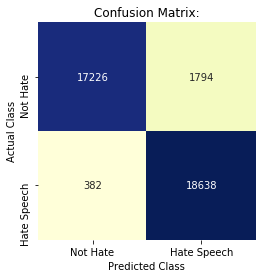

In [612]:
seaborn_confusion_matrix(y_train_up, y_train_pred3d)

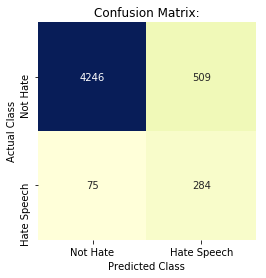

In [613]:
seaborn_confusion_matrix(y_val, y_val_pred3d)

In [614]:
compare_classification_metrics(y_train_up, y_train_pred3d, y_val, y_val_pred3d)

{'Train Accuracy': 0.94,
 'Train Precision': 0.91,
 'Train Recall': 0.98,
 'Train F1': 0.94,
 'Validation Accuracy': 0.89,
 'Validation Precision': 0.36,
 'Validation Recall': 0.79,
 'Validation F1': 0.49}

Adjusted Accuracy: 0.9342980054751662
Adjusted Precision: 0.5271867612293144
Adjusted Recall: 0.6211699164345403
Adjusted F1 Score: 0.5703324808184144




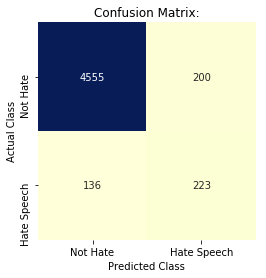

In [621]:
y_adj_val3d, cm3d = adjust_threshold_and_score(y_val, y_val_prob3d, .84, RNN = True)

## RNN 3e - using lr = .00001, rmsprop optimizer... doubled LSTM units

- highest achieved adjusted F1 was .51

In [637]:
model3e = Sequential()

filepath = 'results/RNN/weights.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 5), 
             ReduceLROnPlateau(monitor='val_loss', patience = 5),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model3e.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length= 39, trainable=False))

model3e.add(LSTM(128, activation='relu', return_sequences=True))
model3e.add(BatchNormalization())

model3e.add(LSTM(256, activation='relu'))
model3e.add(BatchNormalization())

model3e.add(Dense(1, activation='sigmoid'))

model3e.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.0001), metrics=['accuracy']) #optimizer=Adam

print(model3e.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_49 (Embedding)     (None, 39, 100)           3779500   
_________________________________________________________________
lstm_95 (LSTM)               (None, 39, 128)           117248    
_________________________________________________________________
batch_normalization_95 (Batc (None, 39, 128)           512       
_________________________________________________________________
lstm_96 (LSTM)               (None, 256)               394240    
_________________________________________________________________
batch_normalization_96 (Batc (None, 256)               1024      
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 257       
Total params: 4,292,781
Trainable params: 512,513
Non-trainable params: 3,780,268
____________________________________________________________

In [638]:
history = model3e.fit(X_train_up, 
                    y_train_up,
                    epochs=100,
                    batch_size=50,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

Train on 38040 samples, validate on 5114 samples
Epoch 1/100
38040/38040 [==============================] - 405s 11ms/step - loss: 0.3979 - acc: 0.8201 - val_loss: 0.5273 - val_acc: 0.8103
Epoch 2/100
38040/38040 [==============================] - 2619s 69ms/step - loss: 0.3584 - acc: 0.8421 - val_loss: 0.4061 - val_acc: 0.8727
Epoch 3/100
38040/38040 [==============================] - 1220s 32ms/step - loss: 0.3955 - acc: 0.8310 - val_loss: 0.7091 - val_acc: 0.8837
Epoch 4/100
38040/38040 [==============================] - 426s 11ms/step - loss: 0.4356 - acc: 0.7996 - val_loss: 0.5498 - val_acc: 0.8600
Epoch 5/100
38040/38040 [==============================] - 436s 11ms/step - loss: 0.4793 - acc: 0.7788 - val_loss: 0.5613 - val_acc: 0.7667
Epoch 6/100
38040/38040 [==============================] - 412s 11ms/step - loss: 0.4021 - acc: 0.8203 - val_loss: 0.4811 - val_acc: 0.7681
Epoch 7/100
38040/38040 [==============================] - 422s 11ms/step - loss: 0.3690 - acc: 0.8383 - val_

5114/5114 [==============================] - 16s 3ms/step


[0.40726514905982525, 0.8987094249676856]

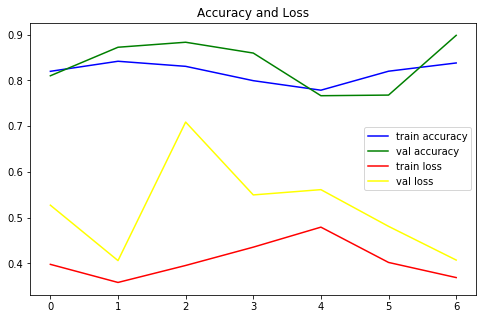

In [639]:
plt.figure(figsize=(8,5))

plt.plot(model3e.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model3e.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model3e.history.history['loss'], color='red', label='train loss')
plt.plot(model3e.history.history['val_loss'], color = 'yellow', label='val loss')

plt.title("Accuracy and Loss")
plt.legend()

model3e.evaluate(X_val, y_val)

In [740]:
model3e.save('results/RNN/model3e.h5')
y_train_pred3e = model3e.predict_classes(X_train_up, batch_size=50)
y_val_pred3e = model3e.predict_classes(X_val, batch_size=50)
y_train_prob3e = model3e.predict_proba(X_train_up, batch_size=50)
y_val_prob3e = model3e.predict_proba(X_val, batch_size=50)

In [741]:
pd.DataFrame(y_train_prob3e).describe()

,0
count,38040.000000
mean,0.419774
std,0.191893
min,0.000000
25%,0.255755
50%,0.441103
75%,0.574387
max,1.000000


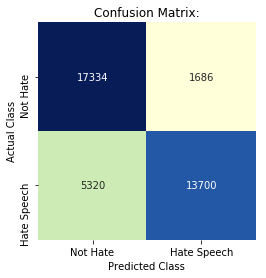

In [742]:
seaborn_confusion_matrix(y_train_up, y_train_pred3e)

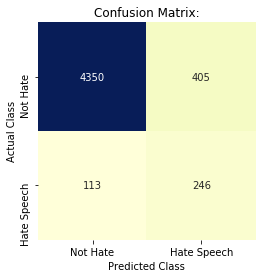

In [743]:
seaborn_confusion_matrix(y_val, y_val_pred3e)

In [744]:
compare_classification_metrics(y_train_up, y_train_pred3e, y_val, y_val_pred3e)

{'Train Accuracy': 0.82,
 'Train Precision': 0.89,
 'Train Recall': 0.72,
 'Train F1': 0.8,
 'Validation Accuracy': 0.9,
 'Validation Precision': 0.38,
 'Validation Recall': 0.69,
 'Validation F1': 0.49}

Adjusted Accuracy: 0.8987094251075479
Adjusted Precision: 0.3778801843317972
Adjusted Recall: 0.6852367688022284
Adjusted F1 Score: 0.4871287128712871




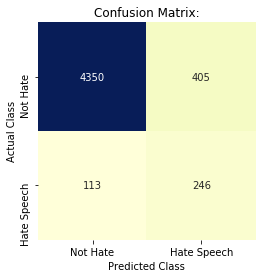

In [745]:
y_adj_val3e, cm3e = adjust_threshold_and_score(y_val, y_val_prob3e, .5, RNN = True)

## RNN 3f - upsampling - reducing to one layer LSTM 

In [662]:
model3f = Sequential()

filepath = 'results/RNN/weights.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 5), 
             ReduceLROnPlateau(monitor='val_loss', patience = 5),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model3f.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length= 39, trainable=False))

# model3f.add(LSTM(32, activation='relu', return_sequences=True))
# model3f.add(BatchNormalization())

model3f.add(LSTM(64, activation='relu'))
model3f.add(BatchNormalization())

model3f.add(Dense(1, activation='sigmoid'))

model3f.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.0001), metrics=['accuracy']) #optimizer=Adam

print(model3f.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_52 (Embedding)     (None, 39, 100)           3779500   
_________________________________________________________________
lstm_99 (LSTM)               (None, 64)                42240     
_________________________________________________________________
batch_normalization_99 (Batc (None, 64)                256       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 65        
Total params: 3,822,061
Trainable params: 42,433
Non-trainable params: 3,779,628
_________________________________________________________________
None


In [663]:
history = model3f.fit(X_train_up, 
                    y_train_up,
                    epochs=100,
                    batch_size=50,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

Train on 38040 samples, validate on 5114 samples
Epoch 1/100
38040/38040 [==============================] - 142s 4ms/step - loss: 0.4580 - acc: 0.7885 - val_loss: 0.3391 - val_acc: 0.8553
Epoch 2/100
38040/38040 [==============================] - 103s 3ms/step - loss: 0.3346 - acc: 0.8637 - val_loss: 0.3943 - val_acc: 0.8140
Epoch 3/100
38040/38040 [==============================] - 207s 5ms/step - loss: 0.3046 - acc: 0.8767 - val_loss: 0.3453 - val_acc: 0.8428
Epoch 4/100
38040/38040 [==============================] - 179s 5ms/step - loss: 0.2837 - acc: 0.8871 - val_loss: 0.3690 - val_acc: 0.8238
Epoch 5/100
38040/38040 [==============================] - 314s 8ms/step - loss: 0.2676 - acc: 0.8956 - val_loss: 0.2597 - val_acc: 0.8966
Epoch 6/100
38040/38040 [==============================] - 132s 3ms/step - loss: 0.2535 - acc: 0.9021 - val_loss: 0.1981 - val_acc: 0.9298
Epoch 7/100
38040/38040 [==============================] - 126s 3ms/step - loss: 0.2387 - acc: 0.9099 - val_loss: 0.3

5114/5114 [==============================] - 6s 1ms/step


[0.1978020102053729, 0.9331247555729371]

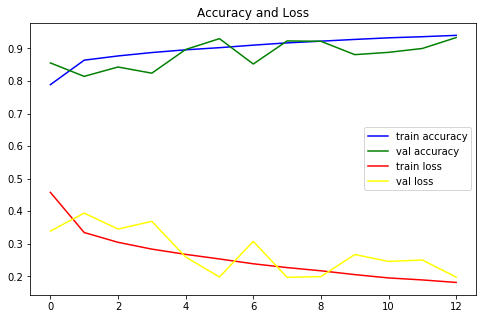

In [664]:
plt.figure(figsize=(8,5))

plt.plot(model3f.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model3f.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model3f.history.history['loss'], color='red', label='train loss')
plt.plot(model3f.history.history['val_loss'], color = 'yellow', label='val loss')

plt.title("Accuracy and Loss")
plt.legend()

model3f.evaluate(X_val, y_val)

In [726]:
# model3f.save('results/RNN/model3f.h5')
y_train_pred3f = model3f.predict_classes(X_train_up, batch_size= 50)
y_val_pred3f = model3f.predict_classes(X_val, batch_size= 50)
y_train_prob3f = model3f.predict_proba(X_train_up, batch_size= 50)
y_val_prob3f = model3f.predict_proba(X_val, batch_size= 50)

In [727]:
pd.DataFrame(y_train_prob3f).describe()

,0
count,38040.000000
mean,0.406776
std,0.327530
min,0.000000
25%,0.079190
50%,0.363966
75%,0.731913
max,0.999998


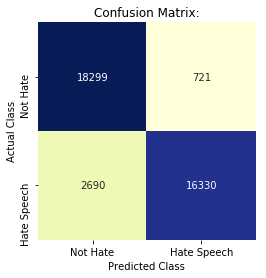

In [728]:
seaborn_confusion_matrix(y_train_up, y_train_pred3f)

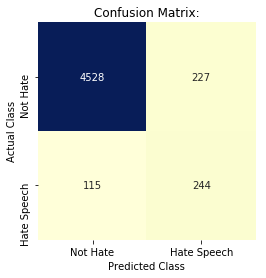

In [729]:
seaborn_confusion_matrix(y_val, y_val_pred3f)

In [730]:
compare_classification_metrics(y_train_up, y_train_pred3f, y_val, y_val_pred3f)

{'Train Accuracy': 0.91,
 'Train Precision': 0.96,
 'Train Recall': 0.86,
 'Train F1': 0.91,
 'Validation Accuracy': 0.93,
 'Validation Precision': 0.52,
 'Validation Recall': 0.68,
 'Validation F1': 0.59}

Adjusted Accuracy: 0.9489636292530309
Adjusted Precision: 0.6737588652482269
Adjusted Recall: 0.5292479108635098
Adjusted F1 Score: 0.5928237129485179




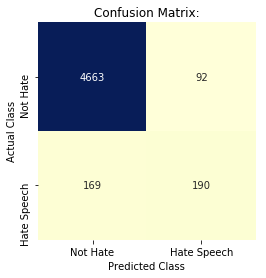

In [731]:
y_adj_val3f, cm3f = adjust_threshold_and_score(y_val, y_val_prob3f, .7, RNN = True)

## RNN 3g - upsampling with just 1 layer, increasing batch size to 100

-- got F1 up to .6 without adjustment (adjustment didn't increase F1).  Now trying to decrease learning rate to .00001 again to see if it helps, since the validation loss and accuracy is bumpy

In [368]:
model3g = Sequential()

filepath = 'results/RNN/weights.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 10), 
             ReduceLROnPlateau(monitor='val_loss', patience = 10),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model3g.add(Embedding(num_words, 300, weights=[embedding_matrix300], input_length= 39, trainable=False))

# model3f.add(LSTM(32, activation='relu', return_sequences=True))
# model3f.add(BatchNormalization())

model3g.add(LSTM(64, activation='relu'))
model3g.add(BatchNormalization())

model3g.add(Dense(1, activation='sigmoid'))

model3g.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.00001), metrics=['accuracy']) 

print(model3g.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 39, 300)           11338500  
_________________________________________________________________
lstm_62 (LSTM)               (None, 64)                93440     
_________________________________________________________________
batch_normalization_61 (Batc (None, 64)                256       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 65        
Total params: 11,432,261
Trainable params: 93,633
Non-trainable params: 11,338,628
_________________________________________________________________
None


In [369]:
history = model3g.fit(X_train_up, 
                    y_train_up,
                    epochs=150,
                    batch_size=100,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

Train on 38040 samples, validate on 5114 samples
Epoch 1/150
38040/38040 [==============================] - 107s 3ms/step - loss: 0.6919 - acc: 0.5548 - val_loss: 0.6960 - val_acc: 0.6234
Epoch 2/150
38040/38040 [==============================] - 76s 2ms/step - loss: 0.6834 - acc: 0.6181 - val_loss: 0.6882 - val_acc: 0.7014
Epoch 3/150
38040/38040 [==============================] - 73s 2ms/step - loss: 0.6420 - acc: 0.6694 - val_loss: 0.6153 - val_acc: 0.8246
Epoch 4/150
38040/38040 [==============================] - 74s 2ms/step - loss: 0.5674 - acc: 0.7365 - val_loss: 0.5465 - val_acc: 0.8666
Epoch 5/150
38040/38040 [==============================] - 72s 2ms/step - loss: 0.4957 - acc: 0.7956 - val_loss: 0.4626 - val_acc: 0.8643
Epoch 6/150
38040/38040 [==============================] - 72s 2ms/step - loss: 0.4420 - acc: 0.8257 - val_loss: 0.4156 - val_acc: 0.8573
Epoch 7/150
38040/38040 [==============================] - 72s 2ms/step - loss: 0.4074 - acc: 0.8364 - val_loss: 0.4006 - 

38040/38040 [==============================] - 78s 2ms/step - loss: 0.2052 - acc: 0.9334 - val_loss: 0.2308 - val_acc: 0.9069
Epoch 60/150
38040/38040 [==============================] - 79s 2ms/step - loss: 0.2045 - acc: 0.9336 - val_loss: 0.2594 - val_acc: 0.8926


5114/5114 [==============================] - 6s 1ms/step


[0.2593643022996166, 0.8926476338061682]

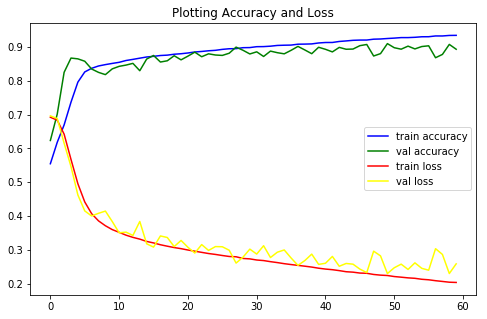

In [370]:
model3g.save('results/RNN/model3g.h5')

plt.figure(figsize=(8,5))

plt.plot(model3g.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model3g.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model3g.history.history['loss'], color='red', label='train loss')
plt.plot(model3g.history.history['val_loss'], color = 'yellow', label='val loss')

plt.title("Plotting Accuracy and Loss")
plt.legend()

model3g.evaluate(X_val, y_val)

In [371]:
y_train_pred3g = model3g.predict_classes(X_train_up, batch_size = 20455)
y_val_pred3g = model3g.predict_classes(X_val, batch_size = 5114)
y_train_prob3g = model3g.predict_proba(X_train_up, batch_size = 20455)
y_val_prob3g = model3g.predict_proba(X_val, batch_size = 5114)

In [372]:
pd.DataFrame(y_train_prob3g).describe()

,0
count,38040.000000
mean,0.490071
std,0.405465
min,0.000000
25%,0.043082
50%,0.599142
75%,0.910062
max,0.999949


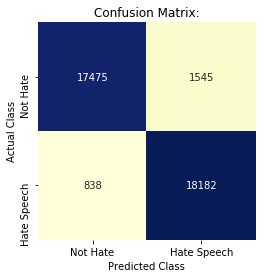

In [373]:
seaborn_confusion_matrix(y_train_up, y_train_pred3g)

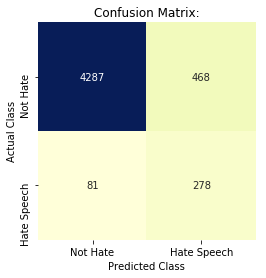

In [374]:
seaborn_confusion_matrix(y_val, y_val_pred3g)

In [375]:
compare_classification_metrics(y_train_up, y_train_pred3g, y_val, y_val_pred3g)

{'Train Accuracy': 0.94,
 'Train Precision': 0.92,
 'Train Recall': 0.96,
 'Train F1': 0.94,
 'Validation Accuracy': 0.89,
 'Validation Precision': 0.37,
 'Validation Recall': 0.77,
 'Validation F1': 0.5}

Adjusted Accuracy: 0.9333202972233086
Adjusted Precision: 0.5200892857142857
Adjusted Recall: 0.649025069637883
Adjusted F1 Score: 0.5774473358116482




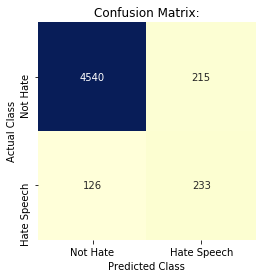

In [376]:
y_adj_val3g, cm3g = adjust_threshold_and_score(y_val, y_val_prob3g, .8, RNN = True)

## RNN 4 - class weight balanced

In [380]:
model4 = Sequential()

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

best_model_path = 'results/RNN/weights_model4.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 10), 
             ReduceLROnPlateau(monitor='val_loss', patience = 10),
             ModelCheckpoint(best_model_path, save_best_only = True, save_weights_only = True)]

model4.add(Embedding(num_words, 300, weights=[embedding_matrix300], input_length= 39, trainable=False))

model4.add(LSTM(64, activation='relu', return_sequences=True))
model4.add(BatchNormalization())

model4.add(LSTM(32, activation='relu'))
model4.add(BatchNormalization())

model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.000001), metrics=['accuracy'])

print(model4.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_38 (Embedding)     (None, 39, 300)           11338500  
_________________________________________________________________
lstm_63 (LSTM)               (None, 39, 64)            93440     
_________________________________________________________________
batch_normalization_62 (Batc (None, 39, 64)            256       
_________________________________________________________________
lstm_64 (LSTM)               (None, 32)                12416     
_________________________________________________________________
batch_normalization_63 (Batc (None, 32)                128       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 33        
Total params: 11,444,773
Trainable params: 106,081
Non-trainable params: 11,338,692
__________________________________________________________

In [381]:
history = model4.fit(X_train, 
                    y_train,
                    epochs=200,
                    batch_size=50,
                    callbacks=callbacks,
                    class_weight=class_weights,
                    validation_data=(X_val, y_val))

Train on 20455 samples, validate on 5114 samples
Epoch 1/200
20455/20455 [==============================] - 159s 8ms/step - loss: 0.7343 - acc: 0.3366 - val_loss: 0.7788 - val_acc: 0.2552
Epoch 2/200
20455/20455 [==============================] - 123s 6ms/step - loss: 0.7310 - acc: 0.3583 - val_loss: 0.7351 - val_acc: 0.2562
Epoch 3/200
20455/20455 [==============================] - 133s 6ms/step - loss: 0.7298 - acc: 0.3778 - val_loss: 0.7345 - val_acc: 0.2509
Epoch 4/200
20455/20455 [==============================] - 128s 6ms/step - loss: 0.7240 - acc: 0.4236 - val_loss: 0.7393 - val_acc: 0.2479
Epoch 5/200
20455/20455 [==============================] - 126s 6ms/step - loss: 0.7210 - acc: 0.4586 - val_loss: 0.7465 - val_acc: 0.2517
Epoch 6/200
20455/20455 [==============================] - 126s 6ms/step - loss: 0.7192 - acc: 0.4783 - val_loss: 0.7260 - val_acc: 0.2501
Epoch 7/200
20455/20455 [==============================] - 131s 6ms/step - loss: 0.7160 - acc: 0.4709 - val_loss: 0.7

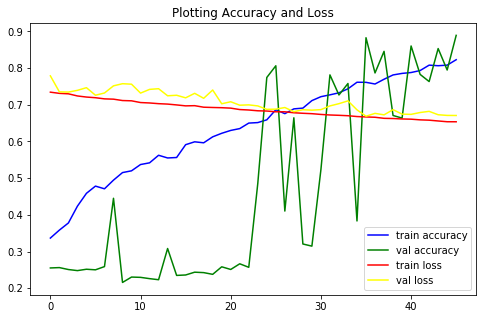

In [382]:
model4.save('results/RNN/model4.model')
plt.figure(figsize=(8,5))

plt.plot(model4.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model4.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model4.history.history['loss'], color='red', label='train loss')
plt.plot(model4.history.history['val_loss'], color = 'yellow', label='val loss')

plt.title("Plotting Accuracy and Loss")
plt.legend()

In [383]:
y_train_pred4 = model4.predict_classes(X_train)
y_val_pred4 = model4.predict_classes(X_val)
y_train_prob4 = model4.predict_proba(X_train)
y_val_prob4 = model4.predict_proba(X_val)

In [384]:
pd.DataFrame(y_train_prob4).describe()

,0
count,20455.000000
mean,0.473236
std,0.068530
min,0.000000
25%,0.477686
50%,0.482932
75%,0.488060
max,1.000000


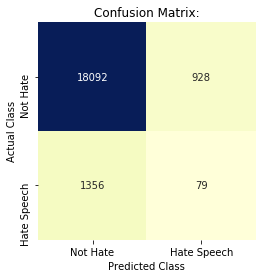

In [385]:
seaborn_confusion_matrix(y_train, y_train_pred4)

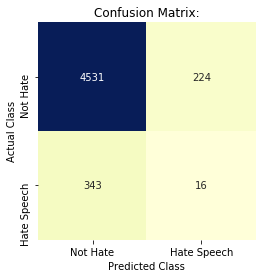

In [386]:
seaborn_confusion_matrix(y_val, y_val_pred4)

Adjusted Accuracy: 0.9272585060617912
Adjusted Precision: 0.30303030303030304
Adjusted Recall: 0.027855153203342618
Adjusted F1 Score: 0.05102040816326531




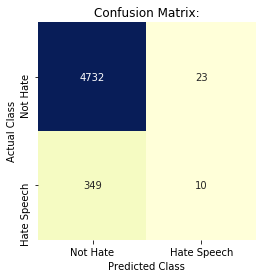

In [387]:
y_adj_val4, cm4 = adjust_threshold_and_score(y_val, y_val_prob4, .8, RNN = True)

# Building Word 2 Vec - 100D 

In [25]:
from time import time
t = time()

RNN_w2v_model = gensim.models.Word2Vec(X_token_list, sg=1, min_count=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.13 mins


In [26]:
RNN_w2v_model.build_vocab

<bound method BaseWordEmbeddingsModel.build_vocab of <gensim.models.word2vec.Word2Vec object at 0x1a3ea3d940>>

In [27]:
RNN_w2v_model.train(X_token_list, total_examples=RNN_w2v_model.corpus_count, epochs=RNN_w2v_model.epochs)

(1650113, 1980385)

In [28]:
RNN_w2v_model.save('data/RNN_w2v.model')

In [29]:
RNN_w2v_model = gensim.models.Word2Vec.load('data/RNN_w2v.model')

# Word 2 Vec - 300 D

In [161]:
RNN_w2vmodel300 = gensim.models.Word2Vec(X_token_list, sg=1, min_count=1, size = 300)

In [162]:
RNN_w2vmodel300.build_vocab

<bound method BaseWordEmbeddingsModel.build_vocab of <gensim.models.word2vec.Word2Vec object at 0x1b6b4493c8>>

In [163]:
RNN_w2vmodel300.train(X_token_list, total_examples=RNN_w2vmodel300.corpus_count, 
                   epochs=RNN_w2vmodel300.epochs)

(1650919, 1980385)

In [164]:
RNN_w2vmodel300.save('data/RNN_w2v300.model')

In [165]:
RNN_w2vmodel300 = gensim.models.Word2Vec.load('data/RNN_w2v300.model')

In [167]:
num_words = 37795
EMBEDDING_DIM = 300
embedding_matrix300 = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    print(word, i)
    if word in RNN_w2vmodel300.wv.vocab:
        embedding_matrix300[i] = RNN_w2vmodel300.wv.word_vec(word)
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

the 1
to 2
i 3
a 4
you 5
and 6
in 7
for 8
of 9
is 10
my 11
it 12
s 13
love 14
this 15
on 16
with 17
be 18
t 19
day 20
that 21
all 22
so 23
are 24
me 25
amp 26
happy 27
your 28
at 29
have 30
we 31
am 32
can 33
just 34
will 35
when 36
not 37
do 38
u 39
what 40
life 41
like 42
time 43
m 44
but 45
today 46
from 47
up 48
now 49
new 50
thankful 51
out 52
as 53
positive 54
get 55
was 56
people 57
about 58
how 59
our 60
bihday 61
good 62
by 63
no 64
they 65
one 66
see 67
more 68
smile 69
if 70
don 71
go 72
who 73
want 74
father 75
he 76
take 77
work 78
healthy 79
re 80
fun 81
weekend 82
an 83
summer 84
has 85
there 86
or 87
make 88
family 89
got 90
us 91
days 92
friday 93
best 94
here 95
great 96
his 97
way 98
need 99
friends 100
beautiful 101
why 102
bull 103
only 104
going 105
first 106
really 107
their 108
wait 109
morning 110
music 111
world 112
back 113
ur 114
tomorrow 115
week 116
know 117
some 118
been 119
very 120
cute 121
sad 122
orlando 123
fathersday 124
never 125
her 126
think 127


website 1118
born 1119
especially 1120
gif 1121
low 1122
leakage 1123
message 1124
hrs 1125
blogger 1126
clean 1127
tea 1128
spain 1129
tried 1130
favourite 1131
pop 1132
stage 1133
issue 1134
broke 1135
bag 1136
horrible 1137
towards 1138
asian 1139
customers 1140
surprise 1141
age 1142
celebrating 1143
changes 1144
ibiza 1145
fail 1146
themselves 1147
lovelife 1148
release 1149
second 1150
cavs 1151
fire 1152
positivity 1153
bride 1154
hand 1155
below 1156
knew 1157
upset 1158
praying 1159
repost 1160
diet 1161
stuck 1162
holidays 1163
emotional 1164
pics 1165
eur 1166
blm 1167
cover 1168
totally 1169
books 1170
relationship 1171
yrs 1172
store 1173
paris 1174
til 1175
melancholymusic 1176
train 1177
pictures 1178
deserve 1179
graduation 1180
paid 1181
finger 1182
goodnight 1183
tampa 1184
company 1185
fake 1186
received 1187
wisdom 1188
planning 1189
singing 1190
loveit 1191
double 1192
public 1193
following 1194
states 1195
terrorism 1196
action 1197
law 1198
anger 1199
fo 1200
gra

webcam 2250
silence 2251
aud 2252
basic 2253
hopeful 2254
taste 2255
mail 2256
followed 2257
berlin 2258
difference 2259
program 2260
doplants 2261
ceain 2262
drug 2263
bestseller 2264
radical 2265
speaking 2266
thousands 2267
tupac 2268
relaxed 2269
paradise 2270
anton 2271
gb 2272
lately 2273
mention 2274
claims 2275
delayed 2276
retail 2277
starbucks 2278
milk 2279
binge 2280
ate 2281
hateful 2282
reply 2283
option 2284
democracy 2285
teams 2286
tokyo 2287
edc 2288
promote 2289
instacool 2290
tb 2291
cafe 2292
personalised 2293
cast 2294
republicans 2295
spending 2296
trash 2297
speakers 2298
q 2299
sessions 2300
sight 2301
allowed 2302
soccer 2303
boycott 2304
brunch 2305
romantic 2306
productive 2307
oppounity 2308
korea 2309
alt 2310
showing 2311
classes 2312
inspiring 2313
enemy 2314
ki 2315
idk 2316
hump 2317
cares 2318
planet 2319
joe 2320
request 2321
vip 2322
added 2323
production 2324
lasvegas 2325
hawaii 2326
photoshoot 2327
protect 2328
remains 2329
obsessed 2330
author 2

glasgow 3388
reunion 3389
promoting 3390
horses 3391
grumpy 3392
shades 3393
invest 3394
industrial 3395
danske 3396
happ 3397
failure 3398
confirmation 3399
touches 3400
wells 3401
perfection 3402
according 3403
brooklyn 3404
shis 3405
october 3406
professional 3407
cancelled 3408
surely 3409
repoer 3410
amodu 3411
chris 3412
habits 3413
regrann 3414
corrupt 3415
stadium 3416
cows 3417
istanbul 3418
nashville 3419
invite 3420
split 3421
jack 3422
finale 3423
tweeting 3424
pr 3425
teaser 3426
ipad 3427
ahhh 3428
zero 3429
feminist 3430
mike 3431
johnny 3432
advanced 3433
recognition 3434
politician 3435
january 3436
wars 3437
tonyawards 3438
smith 3439
environmental 3440
seaside 3441
proves 3442
relaxation 3443
pitch 3444
prayfoheworld 3445
oven 3446
dropping 3447
rains 3448
spotify 3449
seven 3450
pants 3451
tennis 3452
sites 3453
democrats 3454
army 3455
information 3456
butt 3457
infinite 3458
rough 3459
instasize 3460
unforgettable 3461
nra 3462
newlook 3463
sukhbir 3464
theconjuri

struggle 4506
brochure 4507
poll 4508
goa 4509
gear 4510
bloom 4511
several 4512
gaypride 4513
tattoos 4514
lollipop 4515
casting 4516
yu 4517
butterflies 4518
goodies 4519
royalascot 4520
whiteprivilege 4521
discover 4522
ibooks 4523
flies 4524
stray 4525
mantra 4526
arabic 4527
greetings 4528
nightmare 4529
terribly 4530
worrying 4531
anc 4532
pout 4533
highlights 4534
apologies 4535
mothers 4536
brainwashed 4537
goin 4538
healthyeating 4539
triggered 4540
meds 4541
indonesia 4542
chelsea 4543
paicipate 4544
lisa 4545
blow 4546
regram 4547
hustle 4548
survey 4549
yogi 4550
beside 4551
draft 4552
trumps 4553
plain 4554
rational 4555
soulmate 4556
beginner 4557
omar 4558
lokiday 4559
declared 4560
slimmingworld 4561
wheel 4562
convinced 4563
hired 4564
warning 4565
reveals 4566
constantly 4567
stylish 4568
techno 4569
momtips 4570
ukrunchat 4571
donkey 4572
annoying 4573
shining 4574
atmosphere 4575
maui 4576
beachbody 4577
boost 4578
rare 4579
showcase 4580
humanrights 4581
smilepower

udta 5501
defend 5502
lb 5503
fallen 5504
alot 5505
selfharm 5506
happend 5507
hitting 5508
arrest 5509
instalove 5510
autumn 5511
spaces 5512
smallthings 5513
floridashooting 5514
holly 5515
options 5516
ankara 5517
sandwich 5518
dipped 5519
trumpsamerica 5520
presented 5521
oitnbchat 5522
experienced 5523
residents 5524
minorities 5525
myworld 5526
vietnam 5527
familiar 5528
stereotype 5529
protesters 5530
caer 5531
impressed 5532
sixty 5533
mill 5534
thesis 5535
bots 5536
icymi 5537
hongkong 5538
wcw 5539
vocal 5540
hsp 5541
victorious 5542
carlos 5543
nicola 5544
lions 5545
deciding 5546
trained 5547
prospect 5548
sailing 5549
crude 5550
embarrassing 5551
ableism 5552
committee 5553
core 5554
despise 5555
causes 5556
ella 5557
dump 5558
stood 5559
seasonal 5560
disorder 5561
presence 5562
properly 5563
slammed 5564
goldenretriever 5565
mod 5566
overall 5567
ojb 5568
mayor 5569
flowerlove 5570
dec 5571
bake 5572
drumpf 5573
dignity 5574
indieauthor 5575
saint 5576
hawaiian 5577
teen

champ 6638
knowledgeable 6639
congratulate 6640
lax 6641
webdesign 6642
hunt 6643
bon 6644
shooters 6645
oldschool 6646
sparkle 6647
videoclip 6648
poi 6649
easiest 6650
entering 6651
melania 6652
fitting 6653
capitalism 6654
fewer 6655
milf 6656
continued 6657
lewis 6658
rangers 6659
lemonade 6660
streetphotography 6661
rave 6662
baked 6663
nye 6664
anniversaries 6665
kinds 6666
discussing 6667
topics 6668
targets 6669
puppet 6670
evans 6671
unfollowed 6672
trims 6673
donations 6674
refugeeswelcome 6675
chemistry 6676
unifying 6677
cincinnati 6678
thurs 6679
retweeting 6680
vulnerable 6681
refused 6682
prank 6683
dental 6684
tdc 6685
probs 6686
motivating 6687
gummy 6688
beatz 6689
cone 6690
dismantle 6691
happyholidays 6692
areas 6693
redneck 6694
innocence 6695
mohenjodaro 6696
teleprompter 6697
subway 6698
champs 6699
cups 6700
expand 6701
skip 6702
tix 6703
mua 6704
joie 6705
clash 6706
lbj 6707
understanding 6708
iphoneonly 6709
banana 6710
channels 6711
lovin 6712
filibuster 671

creamy 7701
rating 7702
attempts 7703
crook 7704
lois 7705
paddington 7706
muchlove 7707
incidents 7708
owlashop 7709
imready 7710
selfrespect 7711
rk 7712
detour 7713
realised 7714
quotesoftheday 7715
casa 7716
deliberately 7717
pretends 7718
convo 7719
lovethem 7720
bikes 7721
goats 7722
enjoyinglife 7723
belize 7724
checks 7725
flashing 7726
berry 7727
pepsi 7728
yey 7729
aquarium 7730
collected 7731
marie 7732
marco 7733
retrain 7734
disgraced 7735
burns 7736
russians 7737
opi 7738
togetherstronger 7739
sooner 7740
wohasu 7741
streetstyle 7742
streeta 7743
humiliated 7744
eyebrows 7745
yuge 7746
satellite 7747
harbaugh 7748
mensstyle 7749
instatravel 7750
goodvibesonly 7751
volunteersweek 7752
develop 7753
shaw 7754
ledger 7755
campervan 7756
pairs 7757
pros 7758
ima 7759
childfree 7760
yesallwomen 7761
ased 7762
vid 7763
mlk 7764
richard 7765
celinedion 7766
justinbieber 7767
rihanna 7768
rainnyday 7769
supposmallstreams 7770
mcconnell 7771
lap 7772
thrill 7773
keisha 7774
highfas

crushed 8894
deaf 8895
hairdo 8896
dammit 8897
population 8898
appy 8899
cantstopsmiling 8900
onion 8901
offended 8902
ohh 8903
ferry 8904
leanin 8905
elder 8906
microaggressions 8907
printing 8908
drawn 8909
baptist 8910
blk 8911
vodka 8912
contestant 8913
toned 8914
contracts 8915
ako 8916
readytopay 8917
crueltyfree 8918
exhibit 8919
afro 8920
motor 8921
volunteers 8922
animalabuse 8923
indoor 8924
fuelled 8925
gabby 8926
bethechange 8927
myfavorite 8928
audiojungle 8929
indecent 8930
edward 8931
aired 8932
justification 8933
wrecked 8934
satnight 8935
churchill 8936
whynot 8937
accuse 8938
geology 8939
netanyahu 8940
wrath 8941
betray 8942
sprint 8943
neighbourhood 8944
vienna 8945
milan 8946
cuisine 8947
bbcnews 8948
theron 8949
apparel 8950
bunnies 8951
overnight 8952
toothbrush 8953
josh 8954
kia 8955
productions 8956
checkoutmyflyer 8957
nominate 8958
sneaky 8959
graduate 8960
infuriated 8961
tied 8962
sprayed 8963
dolphins 8964
striving 8965
jumper 8966
vitamin 8967
watering 8

pastels 10089
skydiving 10090
sacrifices 10091
goodgirl 10092
thompson 10093
icepole 10094
nantes 10095
goodmoment 10096
hooded 10097
cavy 10098
buffon 10099
thee 10100
speedway 10101
toureiffel 10102
sporadic 10103
duties 10104
gathers 10105
frequently 10106
guessed 10107
nerium 10108
apocalyptic 10109
withdrawals 10110
camren 10111
thunderstorms 10112
freeshipping 10113
planch 10114
antique 10115
keyed 10116
parked 10117
bigkid 10118
explaining 10119
syrian 10120
gulf 10121
conflate 10122
govs 10123
cruelty 10124
danieldash 10125
ironically 10126
bluray 10127
tucson 10128
holla 10129
glassesgirl 10130
ecogreenpark 10131
feelingpretty 10132
ursexiestmorena 10133
odds 10134
extremist 10135
roughly 10136
freakshake 10137
freaks 10138
dalston 10139
nomoney 10140
guncontrolplease 10141
commits 10142
cutemuscleboys 10143
bodybuilding 10144
lac 10145
firstborn 10146
blanche 10147
dubois 10148
rugged 10149
pjs 10150
ave 10151
fisher 10152
baes 10153
wool 10154
guitars 10155
destinyriseofiron

ozzy 10720
tees 10721
thirsty 10722
bolts 10723
bloke 10724
intentional 10725
penn 10726
timhoons 10727
fridayeveryone 10728
tide 10729
communalise 10730
rhoc 10731
ehh 10732
ahhhhh 10733
comms 10734
ola 10735
disability 10736
bahrain 10737
riot 10738
chelski 10739
hangs 10740
reba 10741
lifesucks 10742
disbelief 10743
enoughisenough 10744
proudfan 10745
nigerian 10746
recognise 10747
sibs 10748
unbiosibs 10749
boatarde 10750
teamspeak 10751
awed 10752
effected 10753
tics 10754
mcguire 10755
pixel 10756
dylan 10757
yogu 10758
southafrican 10759
possession 10760
redhair 10761
familylife 10762
coolness 10763
whoopwhoop 10764
outoftouch 10765
thejourneybegins 10766
infiltrating 10767
mexicocity 10768
fitlife 10769
ct 10770
bestquote 10771
journeyquotes 10772
pomeranian 10773
minimum 10774
taxes 10775
waterfall 10776
teeny 10777
conve 10778
calif 10779
selfishness 10780
brimstone 10781
tavern 10782
kristen 10783
ebht 10784
approves 10785
maroc 10786
barkley 10787
hers 10788
curriculum 1078

damnit 11879
dragonboatfestival 11880
luminous 11881
inconsiderate 11882
yeeeeee 11883
stbah 11884
scheduling 11885
snafu 11886
getfit 11887
forcing 11888
bikelife 11889
antaica 11890
respects 11891
ioc 11892
payplanning 11893
lifeisgreat 11894
hastag 11895
haaaaard 11896
sb 11897
judging 11898
bles 11899
lesbians 11900
encountered 11901
ttrusthim 11902
donttrusthim 11903
soclose 11904
tranquil 11905
anorexic 11906
overdue 11907
cigarette 11908
edwardsville 11909
throws 11910
surge 11911
nysc 11912
babysitter 11913
fullmoon 11914
audreyhepburn 11915
diamonds 11916
senselessviolence 11917
blackout 11918
pally 11919
boxcup 11920
multiply 11921
manifesting 11922
ledwell 11923
cymru 11924
exhibiting 11925
comeseeus 11926
confined 11927
shopped 11928
retardo 11929
imy 11930
defines 11931
satisfy 11932
mugs 11933
mickeymouse 11934
appleta 11935
applepie 11936
ilovegin 11937
tanktop 11938
ymca 11939
coupons 11940
mysoginist 11941
teamwybers 11942
allergic 11943
arrangements 11944
sugardaddies

whyme 12549
affordable 12550
sandwiches 12551
debacle 12552
headquaers 12553
organiser 12554
toocute 12555
instacute 12556
toure 12557
divine 12558
scattered 12559
nationality 12560
philosopher 12561
kemer 12562
storyline 12563
foreverhome 12564
peugeot 12565
proudparent 12566
struck 12567
mudrun 12568
parkhouse 12569
jewellers 12570
cutebaby 12571
invisible 12572
succumbed 12573
corset 12574
headset 12575
rakesh 12576
hva 12577
rahe 12578
unit 12579
hb 12580
sobbing 12581
redhill 12582
cloths 12583
bihdaygift 12584
eiko 12585
yamashita 12586
canucks 12587
keepitlocal 12588
drcoadi 12589
zucchini 12590
novice 12591
israelisettlements 12592
illegalisraelisettlements 12593
shadowed 12594
trafalgar 12595
socal 12596
aniston 12597
thehistorypic 12598
landmark 12599
fynn 12600
uplifting 12601
mus 12602
grandsons 12603
voltron 12604
suffice 12605
jimin 12606
shanklin 12607
aiime 12608
prix 12609
azerbaijan 12610
thrivetribe 12611
campadams 12612
geeked 12613
demonic 12614
baskets 12615
serie

studiotime 13616
pagi 13617
roadtorio 13618
gofoe 13619
acknowledges 13620
runchat 13621
instafamous 13622
whoopppp 13623
lionel 13624
taharrush 13625
taharrushgamea 13626
rapeugee 13627
advisors 13628
wasnt 13629
grenada 13630
bale 13631
homedepot 13632
zionist 13633
madeira 13634
docs 13635
terrestrial 13636
geneva 13637
krakow 13638
beautifulworld 13639
kaya 13640
celeb 13641
randomly 13642
flea 13643
mlpseason 13644
hiatus 13645
mlpfim 13646
halthy 13647
mediocre 13648
lostforwords 13649
onwards 13650
burakyeter 13651
luckylinemotors 13652
yung 13653
samu 13654
lokey 13655
eahquake 13656
stripclub 13657
disbanding 13658
statueoflibey 13659
ahntrio 13660
tralee 13661
liveallyourdreams 13662
radiology 13663
mustang 13664
sebastian 13665
sincere 13666
hmu 13667
smilelove 13668
airsoft 13669
believer 13670
allot 13671
nodejs 13672
expressjs 13673
heroku 13674
swiftcurrent 13675
rife 13676
yalit 13677
commodities 13678
ranked 13679
ranks 13680
statistics 13681
starfightersaturday 13682


sampling 14198
earlyyears 14199
nationaleggday 14200
omarmateen 14201
hopkins 14202
bugger 14203
rnb 14204
clips 14205
sounded 14206
antiamerican 14207
prevention 14208
proposed 14209
feather 14210
orlandoshootings 14211
lazyday 14212
instaselfie 14213
creepiest 14214
thala 14215
begging 14216
leakag 14217
zipline 14218
orla 14219
funds 14220
manners 14221
helluva 14222
jobboard 14223
fayetteville 14224
sparkles 14225
coleen 14226
telaviv 14227
personaltraining 14228
sashaobama 14229
jumped 14230
desde 14231
ubud 14232
freed 14233
gardenlife 14234
appreciates 14235
remaster 14236
bestpeople 14237
visits 14238
neveragain 14239
moodoftheday 14240
debra 14241
barrackobama 14242
hills 14243
object 14244
dictated 14245
viualreality 14246
htcvive 14247
rewardsgg 14248
meals 14249
newark 14250
fla 14251
cottage 14252
pillow 14253
ph 14254
cardinal 14255
youngest 14256
mockery 14257
usga 14258
warped 14259
producing 14260
trojan 14261
andromache 14262
gotoyourfathercolin 14263
happybihday 1426

temoin 15309
werk 15310
cardioking 15311
luxusmetropole 15312
boosters 15313
anafalactic 15314
lifeistogood 15315
cws 15316
globalwarming 15317
crewlife 15318
feelingbetter 15319
targetted 15320
stylemen 15321
stylenanda 15322
stylefile 15323
willoughby 15324
socialized 15325
innate 15326
revoltingly 15327
tws 15328
gotthenerves 15329
trooping 15330
empathize 15331
uspresidentialisis 15332
precipitating 15333
churches 15334
neoliberalism 15335
prioritized 15336
neogaf 15337
coincidentally 15338
jessiestyman 15339
appeaser 15340
driveway 15341
nothingisreal 15342
hopenothate 15343
paramus 15344
posturing 15345
phonecase 15346
hakunamatata 15347
disneyside 15348
hollybear 15349
gingerjew 15350
chu 15351
experimenter 15352
container 15353
mangopassionfruit 15354
ppop 15355
healthiness 15356
makesomeonesmiletoday 15357
workaholic 15358
rosario 15359
boxsets 15360
wallow 15361
exerciseyourhappinessmuscle 15362
anindividualthing 15363
hiit 15364
farnham 15365
lovefarham 15366
ohhhh 15367
chi

pescatarian 15931
stuggling 15932
pushingforward 15933
iknowican 15934
ivey 15935
purchasing 15936
managers 15937
vfw 15938
aberystwyth 15939
hooligan 15940
sanfilippo 15941
textures 15942
midlands 15943
irelands 15944
sesalefueeadele 15945
longboard 15946
escue 15947
deez 15948
wheredapuppjes 15949
ciymove 15950
ciu 15951
idiopathic 15952
uicaria 15953
livinghell 15954
stolendreams 15955
workingsick 15956
feelingwashedout 15957
kaleidoscope 15958
yipppiii 15959
deposit 15960
aryanbrotherhood 15961
whiterace 15962
ramshackle 15963
cakehole 15964
shareholder 15965
enuf 15966
googleplay 15967
submit 15968
acrolinxcc 15969
sepatu 15970
dahlan 15971
ginola 15972
dupont 15973
francevsromania 15974
bigoldchair 15975
bookshelves 15976
picturewindow 15977
lovemyhouse 15978
sahara 15979
nonsleep 15980
cantkeepasecret 15981
oneteamlincoln 15982
creperie 15983
lamborghini 15984
worriedaboutlife 15985
sodden 15986
memoir 15987
hrschool 15988
tripenjoy 15989
kyotokobe 15990
cobbler 15991
gramms 159

sayaa 16646
chale 16647
thnku 16648
sayinggoodbye 16649
breakupcoach 16650
goodfelling 16651
veroliabohemia 16652
seanconnery 16653
realz 16654
isitoctoberyet 16655
imacityangel 16656
americanboy 16657
doraemon 16658
blackwhite 16659
dabronx 16660
marshalls 16661
corporateamerica 16662
parkchester 16663
qsb 16664
smavisuals 16665
drill 16666
handles 16667
kehlani 16668
bellamianta 16669
thebestteam 16670
blessedramadan 16671
bragged 16672
puddles 16673
pavilion 16674
mimi 16675
ketchumcannes 16676
ariel 16677
paschiel 16678
ejecting 16679
senjitale 16680
remo 16681
followalways 16682
billie 16683
rae 16684
countrymusicisdead 16685
realcountry 16686
bellvania 16687
christiani 16688
anotherniece 16689
weezied 16690
sunnyskies 16691
ooowwwwww 16692
stsoloalbum 16693
leejonghyun 16694
stsoloalbumleejonghyun 16695
fruitlove 16696
aubameyang 16697
afc 16698
nopizza 16699
allysallyshairallyshairaoyamaaoyamashibuyahairpinklove 16700
armed 16701
cycles 16702
arriva 16703
hotwings 16704
unsafe 1

garyhadi 17663
repug 17664
germans 17665
greatwriting 17666
anxiously 17667
russiastrawberrynaturehousefamilyloveredharvestvsconicesweetparents 17668
temporarily 17669
shacks 17670
irrefutable 17671
truism 17672
anmol 17673
yadien 17674
kwangsoo 17675
azharuddin 17676
brochures 17677
loyalist 17678
somme 17679
boyne 17680
mywork 17681
tattooing 17682
saturdayy 17683
compares 17684
nadien 17685
query 17686
rpdr 17687
rupaul 17688
actioncoach 17689
lelo 17690
fabulousfunloa 17691
mindlessviolence 17692
sml 17693
dmpeel 17694
dermcare 17695
ilovemonday 17696
traveltime 17697
russiangirl 17698
archetecture 17699
horaciohamlet 17700
shapes 17701
getconnected 17702
captive 17703
lockandkey 17704
dragonfruit 17705
bougainvilliea 17706
flyinbangkok 17707
muang 17708
mybabyboy 17709
skipton 17710
findingnemo 17711
timeforasaferamericaforall 17712
pulsevictims 17713
prayersforchristinagrimmiefamily 17714
camilaogorman 17715
annaday 17716
yurika 17717
anriri 17718
shinjuku 17719
hamburger 17720
k

inhabitant 18182
enchilada 18183
miyakoisland 18184
suunyday 18185
swt 18186
mambaday 18187
kobexi 18188
blackmamba 18189
kobebryant 18190
mambaout 18191
exceptionally 18192
feud 18193
kelpie 18194
ughhhhh 18195
replacyclay 18196
adios 18197
despondent 18198
hatedepauredayhome 18199
lovebenidorm 18200
lovingonme 18201
dietitians 18202
anduknowit 18203
andyouknow 18204
kidzoona 18205
labeling 18206
shantel 18207
tinajero 18208
skips 18209
teaseuesday 18210
rochester 18211
lafnwebseries 18212
lafn 18213
kayaking 18214
roseland 18215
pouringrain 18216
weneedit 18217
perfectbedday 18218
coached 18219
bownaker 18220
cowan 18221
fundamental 18222
representatives 18223
muah 18224
supoer 18225
fuckyoujames 18226
tunbridgewells 18227
pisina 18228
mccann 18229
decreasing 18230
brudenell 18231
ornothing 18232
fwm 18233
toread 18234
letsmake 18235
beirutweloveyou 18236
swagged 18237
baiter 18238
slaveowner 18239
instatattoo 18240
demolition 18241
farewellboleyn 18242
whufc 18243
westham 18244
olym

lifeproblems 18796
handout 18797
isitok 18798
clifton 18799
cravetv 18800
freakout 18801
selfiemegirlslife 18802
officialmbmusic 18803
muavelvetliplacquer 18804
teamyvette 18805
shrek 18806
nofascist 18807
unveil 18808
brighest 18809
diabetics 18810
craftcreators 18811
bedlington 18812
dontbelazy 18813
havefaith 18814
carmel 18815
montecarlo 18816
evro 18817
summergoodday 18818
timecool 18819
kharkivgramkharkivcity 18820
kharkov 18821
fathersdayuk 18822
skull 18823
choker 18824
haahhh 18825
mezuniyet 18826
cbubesyo 18827
yellowcard 18828
goodjams 18829
odindavid 18830
mamatothreeboys 18831
cuandojuegachilemepongo 18832
saaaaaaaaa 18833
shhhhhhhe 18834
iiiiiii 18835
vamoschile 18836
vamoschilecarajo 18837
wonderfulday 18838
alc 18839
alcar 18840
escapethefate 18841
sindy 18842
csd 18843
innsbruck 18844
abd 18845
waging 18846
grid 18847
showyourjeepday 18848
akron 18849
sleepingwiththeenemy 18850
sellingout 18851
interrupted 18852
dontwanttomissanyoftheshow 18853
sposwriters 18854
patd 1

alliesmommy 19427
stopisalm 19428
muslimcontrolnow 19429
yogaday 19430
imnotchild 19431
tabique 19432
flamboyant 19433
fiji 19434
geller 19435
truthstrangehanfiction 19436
californiabeforeandafter 19437
kilometer 19438
potholes 19439
breakers 19440
fundu 19441
socialroadtrip 19442
croissants 19443
harvesting 19444
wcs 19445
loveyourlife 19446
freetobeme 19447
delusions 19448
rideshare 19449
ahintofjoy 19450
clarification 19451
bleedpurple 19452
toocoldu 19453
gofrogs 19454
weoutchea 19455
inthestreets 19456
weloveatlanta 19457
justrhee 19458
evilweather 19459
hotty 19460
mce 19461
skanks 19462
huntsmen 19463
raf 19464
kyo 19465
legitimizing 19466
doctrine 19467
incl 19468
ultranationalism 19469
chicagofire 19470
kayleigh 19471
spencer 19472
junio 19473
bmamper 19474
bigmouthamper 19475
btsbihday 19476
papalbull 19477
colonisation 19478
polygeny 19479
pseudoscience 19480
downtownbistrom 19481
walters 19482
vanillasweetcreamcoldbrew 19483
nohernireland 19484
purenohernireland 19485
disco

oliverjoseph 20061
workinganewbook 20062
myers 20063
covergirl 20064
marieclaire 20065
mumbairains 20066
thecityilivein 20067
toomuchtime 20068
theygotfired 20069
dusted 20070
techehelp 20071
dismay 20072
cannotbelieve 20073
pained 20074
maydayus 20075
victimise 20076
oppressor 20077
jamesblake 20078
standout 20079
episcopalians 20080
chesteon 20081
nexusdreamteam 20082
getyrfactsright 20083
trademark 20084
tadelakt 20085
ottbike 20086
duvinestyle 20087
projectarcturus 20088
mayhems 20089
ilovedad 20090
froosh 20091
outnproud 20092
wonthide 20093
cerinthe 20094
syracuse 20095
atlantic 20096
lettheadventuresbegin 20097
grips 20098
dax 20099
dramas 20100
riff 20101
themetalgentleman 20102
bestofbrac 20103
mobileapps 20104
lovecroatia 20105
visitbrac 20106
neve 20107
ducklings 20108
ziggy 20109
amwriti 20110
flightless 20111
ironandwine 20112
heyboo 20113
musicinmyhead 20114
lcdphotography 20115
simpler 20116
madeit 20117
sharethis 20118
westie 20119
preserve 20120
hesitation 20121
oceanl

provaper 20641
provape 20642
coil 20643
coils 20644
fieldday 20645
pjharvey 20646
docto 20647
thoughtoftheday 20648
sunscreen 20649
chizuru 20650
nattu 20651
douchelord 20652
dickhole 20653
haveto 20654
nagging 20655
samelook 20656
frontend 20657
augusco 20658
vhim 20659
roadrage 20660
listener 20661
skrin 20662
metaphor 20663
mahiku 20664
carbon 20665
spitballs 20666
concepts 20667
iwillneve 20668
shools 20669
newclasm 20670
unify 20671
usn 20672
snowed 20673
granola 20674
awman 20675
heemteam 20676
kala 20677
baritone 20678
newukulele 20679
barrage 20680
demeanor 20681
haus 20682
gokil 20683
amk 20684
sxhoute 20685
moorlands 20686
mygirlsrock 20687
antinational 20688
modimarketing 20689
sneakpeak 20690
fabrics 20691
fatimbahh 20692
mtn 20693
paulfiona 20694
tmorrow 20695
nlsd 20696
bunclubgirlsarebest 20697
bondilocal 20698
beachbeach 20699
streetsydney 20700
seeaustralia 20701
strayer 20702
thepurge 20703
seafood 20704
oppressors 20705
silvia 20706
ventil 20707
newep 20708
wednesday

kikmeplease 21199
monthscouple 21200
verylowiq 21201
laraza 21202
friendsforlife 21203
triumphs 21204
confidants 21205
bulwer 21206
lytton 21207
selflovemantras 21208
natsuxlucy 21209
animegif 21210
fury 21211
udtakejri 21212
sworn 21213
eeeeekkkkkk 21214
eviction 21215
needtix 21216
ripamodu 21217
morse 21218
lucid 21219
thawebb 21220
weeked 21221
weakdonaldtrump 21222
boringdonald 21223
hipsters 21224
synonymous 21225
ojai 21226
bre 21227
terrane 21228
gidsfavor 21229
djpaipai 21230
ascience 21231
sewage 21232
hillarylost 21233
satnite 21234
hppy 21235
jalanjalanmen 21236
jeerulove 21237
summervibes 21238
summercooler 21239
energybooster 21240
misconstrued 21241
summercamps 21242
benefitting 21243
aussies 21244
onemoresleep 21245
southaustralia 21246
getexcited 21247
cari 21248
crazyfriends 21249
susy 21250
weahejoy 21251
concession 21252
amwrithing 21253
likeifucryevrytiem 21254
writingthewritestuff 21255
cssm 21256
ballywaltercssm 21257
joinus 21258
nambija 21259
cycleto 21260
with

howdy 21755
wreath 21756
arpx 21757
nonke 21758
rafael 21759
withdraws 21760
getwellsoonrafa 21761
dramafree 21762
newforme 21763
instacollage 21764
muslimbrotherhood 21765
hospitalized 21766
persistence 21767
homestead 21768
socloseyetsofar 21769
monacorestochezedgardgrandprixf 21770
essaissunlewissuppo 21771
slooooowww 21772
androiddev 21773
yaaaaaaaasss 21774
centred 21775
reassurance 21776
sunshinesunshine 21777
aishhhhh 21778
airbnb 21779
airbnbmanagement 21780
livethere 21781
thatairbnbmoment 21782
bred 21783
maryhill 21784
springburn 21785
riasworld 21786
harricrishna 21787
loveca 21788
caels 21789
pumpkintheraccoon 21790
raccoon 21791
weeklyfluff 21792
pretended 21793
fruitbowl 21794
loner 21795
desync 21796
cutscenses 21797
likeme 21798
tdigcomms 21799
thecavernclub 21800
tourist 21801
acapella 21802
nascarpics 21803
ofa 21804
murca 21805
patriotic 21806
redwhiteblue 21807
cinnamon 21808
watford 21809
liebe 21810
gl 21811
sociopaths 21812
satanic 21813
felonies 21814
yf 21815


marching 22307
broglio 22308
kai 22309
sofunny 22310
hisfacetho 22311
knott 22312
eahling 22313
mellie 22314
electrocheking 22315
musicalveneus 22316
electropop 22317
bijoux 22318
myneni 22319
doubles 22320
paes 22321
sania 22322
repeats 22323
thecuremtl 22324
europ 22325
toilette 22326
blitzaztecs 22327
tmtc 22328
theoffice 22329
watchit 22330
sundayfun 22331
somethingboudoir 22332
celebritystyle 22333
aejazsaiyed 22334
ahmadabad 22335
ontiat 22336
latimer 22337
aldubtrueidentity 22338
missingthebeach 22339
indore 22340
yogatacherdublin 22341
ibizabringitonmallorcaholidayssummer 22342
snoozes 22343
velour 22344
scrub 22345
weneed 22346
ageoftrump 22347
grassrootsaction 22348
citizenaction 22349
citizenry 22350
publicpolicy 22351
tikila 22352
bellyburningbootcamp 22353
caf 22354
nearing 22355
fadfudge 22356
vandalism 22357
listed 22358
tresor 22359
nuit 22360
sparksomethinggood 22361
goodcause 22362
mutually 22363
creeps 22364
hearingallhersong 22365
aymcuainraiser 22366
aym 22367
brod

collegelife 22887
salmahayek 22888
freshair 22889
jesselee 22890
yesplease 22891
errands 22892
rammed 22893
fares 22894
wdc 22895
wdcouncil 22896
twinkletwinkle 22897
thestrand 22898
coventgarden 22899
congratszeldaandgeorge 22900
dosacero 22901
flowerstagram 22902
stooge 22903
itax 22904
sisterschijinaturals 22905
surfacepro 22906
keepsmile 22907
begrateful 22908
nextclubmasrinkarenyesterdayjunethdsniigatajapan 22909
hardheahoten 22910
awesomesinger 22911
parndorf 22912
austria 22913
viena 22914
bestabiamo 22915
cityplace 22916
coronation 22917
riggedforhillary 22918
findyou 22919
inu 22920
withdrawal 22921
needtogoforaride 22922
ancestral 22923
terminix 22924
instastreet 22925
getlost 22926
tamasha 22927
newclothes 22928
brithaday 22929
winggirlfashion 22930
goodluckharry 22931
grandfathers 22932
practising 22933
banjo 22934
picotheday 22935
julianperretta 22936
tonybraphiphoppay 22937
shaun 22938
prompt 22939
halp 22940
ggrrrrr 22941
tengo 22942
gerukr 22943
diemanschaft 22944
kerry

darkandstormy 23530
gatcombe 23531
aadityaji 23532
belts 23533
earlybirdgetstheworm 23534
sinekwanon 23535
gurrrrl 23536
letrussiaplay 23537
russianteam 23538
embraces 23539
kdrama 23540
collazen 23541
timothy 23542
garrett 23543
summerhouse 23544
btgs 23545
dragoneducationsunmereating 23546
yummyexperience 23547
aupairaupairlife 23548
aupair 23549
chinatravelsunny 23550
loveeducate 23551
mercenary 23552
newaddiction 23553
wtfiswrongwithpeople 23554
genesis 23555
caoonish 23556
rendition 23557
excitedly 23558
sugary 23559
spiderwebiness 23560
snapped 23561
elena 23562
probiotics 23563
digestive 23564
alignatsams 23565
darkday 23566
newmetro 23567
microwave 23568
cleaner 23569
ilovesavingsca 23570
chanchada 23571
cama 23572
nomeimpoa 23573
chilly 23574
idontcare 23575
deadandco 23576
moreno 23577
babiescat 23578
newborn 23579
sidesandwich 23580
delima 23581
lovelyweekend 23582
paydayweekend 23583
edintravel 23584
arewethereyet 23585
phx 23586
salesforcesaturday 23587
keeponlearning 2358

lipo 24100
lipolight 24101
burnfat 24102
summerbody 24103
adulthood 24104
bigplans 24105
lovemycar 24106
restday 24107
wellspent 24108
tiiiiime 24109
emmalouandtheagenda 24110
hairfashionsmileselfibunknotsphotoofthedayphotoshoot 24111
nicelike 24112
likepin 24113
bette 24114
midler 24115
veteransdiscount 24116
foodbaby 24117
goodes 24118
calmly 24119
abou 24120
maxxxlife 24121
ruggedmaxxx 24122
moonovermiami 24123
sonice 24124
hairwedding 24125
hedgehogs 24126
listwithus 24127
goodtoknow 24128
didntneedafilter 24129
butidoloveem 24130
moher 24131
ireand 24132
paddy 24133
mosquito 24134
metrics 24135
nonsens 24136
denvercomiccon 24137
emoda 24138
emodafasion 24139
instlove 24140
instgood 24141
newyorkyankees 24142
chap 24143
milksha 24144
issho 24145
pulsera 24146
jdawg 24147
collie 24148
perro 24149
nffc 24150
hanning 24151
accessory 24152
auschwitz 24153
sancris 24154
shadeson 24155
uploads 24156
indiefolk 24157
keepenjoy 24158
loveforlove 24159
teamnofriends 24160
phab 24161
vzw 2416

graysondolan 24727
dolantwins 24728
twintuesday 24729
gloday 24730
emani 24731
royalswin 24732
kauffman 24733
ermeventing 24734
natkingcole 24735
shawn 24736
aaliyah 24737
ksavage 24738
lanternfestival 24739
iwishedforyou 24740
waitingforyou 24741
sunnglasses 24742
doctorwhoseries 24743
doctorwhodvd 24744
resumes 24745
greatmorning 24746
spicegirls 24747
girlspower 24748
eish 24749
gratefulfeet 24750
meringue 24751
loveyoubigdaddy 24752
doggystyle 24753
federation 24754
regurgitated 24755
milers 24756
neotour 24757
wombatwarrior 24758
wombat 24759
wombatwednesday 24760
dilmer 24761
holidaysunset 24762
yeay 24763
rumbling 24764
busee 24765
ekizz 24766
multiconnexions 24767
irishman 24768
shoponline 24769
cocoacoutureboutique 24770
sha 24771
meanmuggin 24772
stare 24773
animallovers 24774
cruiser 24775
gameboy 24776
guinea 24777
bissau 24778
lp 24779
assassinated 24780
shouted 24781
equinox 24782
mypic 24783
trocolikes 24784
dejournettgreatescape 24785
lactosefree 24786
feelinhappy 24787

theafidget 25257
felttips 25258
pattern 25259
textiles 25260
bestfriendswedding 25261
structure 25262
injustoutbook 25263
summersale 25264
ripchamp 25265
starsofthefuture 25266
happymad 25267
nomorewhiskey 25268
metalheads 25269
slitherio 25270
severe 25271
toasty 25272
midwest 25273
beastmode 25274
ausveng 25275
favoriting 25276
cann 25277
thinskinned 25278
mato 25279
chapones 25280
woysboys 25281
uppity 25282
raceplay 25283
whiskerswednesday 25284
gardner 25285
simpleshapes 25286
affluent 25287
animalabuser 25288
rama 25289
reddy 25290
sobeautifulhere 25291
memorialday 25292
wrenn 25293
iaskedforadomlid 25294
float 25295
poured 25296
scrambled 25297
lovebabies 25298
smallgirl 25299
smallfingers 25300
holidayinlithuania 25301
palyhappy 25302
yoi 25303
werkwerkwerk 25304
pu 25305
gaatx 25306
excotic 25307
relextime 25308
carehome 25309
nelson 25310
mandela 25311
teju 25312
repaired 25313
teamlewis 25314
lewishamilton 25315
montrealgrandprix 25316
canadagrandprix 25317
nomeds 25318
toss

agoraphobia 26225
bdd 26226
ripantonyeltchin 26227
puffs 26228
kebabs 26229
hossein 26230
kebab 26231
travelwithkids 26232
stbas 26233
thirdgen 26234
ifschweinsteigerproposediwouldntsayno 26235
slogan 26236
kush 26237
sequeira 26238
immoalise 26239
goodie 26240
youmakemehappy 26241
trumphate 26242
jq 26243
woult 26244
imangine 26245
hoodratzinspace 26246
garda 26247
lakegarda 26248
fragliavelariva 26249
melgesworlds 26250
ethnically 26251
cleansing 26252
bethlehem 26253
profiting 26254
beater 26255
pander 26256
acehotel 26257
screws 26258
ballscrews 26259
shopphg 26260
virginhair 26261
hairextensions 26262
buyhairhere 26263
hardrockcafelondon 26264
shuckinandjivin 26265
putdowns 26266
onwednesdayswewearpink 26267
treetopnets 26268
zipworldfforest 26269
experienceadventure 26270
funinthetrees 26271
zoomzoom 26272
mazdagirl 26273
mazda 26274
photogrid 26275
nowumameshigoodtastybeefporklocalshopgoodkuonfeek 26276
hobblers 26277
manzini 26278
hoyt 26279
emotionallyobtuse 26280
barharbor 26

teamgrimmie 26811
ripchri 26812
fbf 26813
escoba 26814
lien 26815
spontaneity 26816
iphonography 26817
gaymodel 26818
newclue 26819
cluquotes 26820
samplesunday 26821
posh 26822
countrygjrl 26823
silverhair 26824
itinerary 26825
persevered 26826
dogtoy 26827
petparent 26828
alamode 26829
bast 26830
qual 26831
runwales 26832
cheerleaders 26833
tolyatti 26834
tassel 26835
cymruambyth 26836
rickerby 26837
parsley 26838
peruvians 26839
afroperuvian 26840
chaclacayo 26841
tutorials 26842
replacing 26843
tlchat 26844
disadvantage 26845
dunes 26846
amusements 26847
todayannayuina 26848
sought 26849
worldpeace 26850
loveandpeace 26851
buildbridgesnotwalls 26852
thereaping 26853
thereapingtheseries 26854
abouttime 26855
bihdayjudygarland 26856
primed 26857
accusin 26858
doings 26859
jbell 26860
thehumancondition 26861
socialists 26862
maddow 26863
trumpdarkzone 26864
myoneresolution 26865
rockineve 26866
sexpredator 26867
sexualassult 26868
samsungj 26869
rolando 26870
daddys 26871
fetes 26872


pearlman 27336
ripjulie 27337
doggiestyle 27338
coldplayzurich 27339
shakeyourbutt 27340
moviemotivation 27341
futurebright 27342
selfiequeen 27343
chiropractic 27344
compensatory 27345
iswar 27346
deliento 27347
debuting 27348
bcu 27349
summershows 27350
dilapidated 27351
blight 27352
mississippi 27353
structures 27354
domme 27355
bonny 27356
scottishborder 27357
malay 27358
jalapeno 27359
springwavesunset 27360
knackered 27361
sakura 27362
kinomoto 27363
aah 27364
daahling 27365
whaon 27366
sexandthecity 27367
whitepower 27368
copious 27369
technique 27370
newmoves 27371
guster 27372
lebronjames 27373
stanervous 27374
yakang 27375
yaka 27376
meters 27377
directions 27378
closures 27379
fluently 27380
astronomical 27381
thevoiceuk 27382
tram 27383
sargaams 27384
peacefulbdaytou 27385
phishing 27386
hinaholics 27387
drudge 27388
fishingpole 27389
nationalities 27390
letthembelittle 27391
childhoodunplugged 27392
madteapay 27393
abg 27394
fleeting 27395
pausing 27396
andthedevilshivered

alpine 27867
alpinetrail 27868
alpineview 27869
viewpoint 27870
opernhaus 27871
dasischz 27872
londonjameszurich 27873
escoed 27874
palms 27875
skyvilla 27876
method 27877
ppmkpi 27878
kel 27879
hemp 27880
brownies 27881
deputies 27882
dwf 27883
treadingyesterday 27884
tcl 27885
dropadresssize 27886
badnews 27887
grandmarsis 27888
lutsen 27889
nohshore 27890
brainstorm 27891
pnc 27892
dankennedy 27893
picofthenight 27894
foaleza 27895
thehwaduk 27896
picoftoday 27897
photooftoday 27898
doact 27899
loyboutins 27900
shoelove 27901
babygonzalez 27902
isaa 27903
wherearewe 27904
noidontaskfoheway 27905
drunks 27906
retention 27907
biztips 27908
proceed 27909
slain 27910
yaaaaaaaaaass 27911
drusillas 27912
daywithfriends 27913
catchups 27914
jcaplice 27915
losglobos 27916
ersatile 27917
makelife 27918
takelife 27919
donotrublovethewrongway 27920
movieposter 27921
orleans 27922
letsdanceinthegraveyards 27923
sendiceandbeer 27924
testify 27925
nederland 27926
sprinkler 27927
readersgazette 27

jamdoughtnut 28426
naughtybutnice 28427
tfifriday 28428
foodgloriousfood 28429
dreadedmonkey 28430
churrasco 28431
sippy 28432
gloriously 28433
viewfromatrain 28434
inlovewithswitzerland 28435
eerie 28436
auba 28437
morata 28438
juve 28439
straighthair 28440
dangerlurksbelow 28441
contradictions 28442
fascistdemocracy 28443
thegoodolddays 28444
buckley 28445
deliveroo 28446
shitler 28447
ignorantly 28448
bleating 28449
hereicomeaz 28450
inlov 28451
abut 28452
yulin 28453
sunrize 28454
swagsnowwinterdaynight 28455
nicesmilenaturea 28456
photophotograpy 28457
mygirls 28458
lovehasntwonyet 28459
potusisourdividerinchief 28460
inthesunshine 28461
pae 28462
nuba 28463
thequeen 28464
thoroughly 28465
wiah 28466
slower 28467
monbbsemasa 28468
ops 28469
doublepedal 28470
consistent 28471
lonelywithoutsyd 28472
wheresmysquidney 28473
rcmemories 28474
ritzcarlton 28475
btcc 28476
nickels 28477
twiraj 28478
sanogo 28479
negate 28480
balibeach 28481
balilifestyle 28482
oceantreasures 28483
reprint

chevytrax 28980
athlets 28981
juiced 28982
icrs 28983
pols 28984
admired 28985
benji 28986
franti 28987
spearhead 28988
howlongtilseas 28989
rewelcome 28990
limpopo 28991
tumithebestintheworld 28992
funfriends 28993
pranic 28994
nutmeg 28995
nothingisgettingmedown 28996
mediatization 28997
leventgenc 28998
lewo 28999
wetpanty 29000
batharsenal 29001
wecanplay 29002
intersectionality 29003
morningperson 29004
sleepin 29005
burial 29006
ushered 29007
goalsetting 29008
cultural 29009
fashionlovefuninstagoodbeautiful 29010
benin 29011
pbuh 29012
hardship 29013
abudawud 29014
hadith 29015
bogard 29016
noho 29017
mimarco 29018
guillermosbday 29019
teamandre 29020
idontcareifhesbritish 29021
facwbook 29022
muma 29023
gstaad 29024
thegirlsarebackinthealps 29025
cornerhouse 29026
fitnesscentre 29027
gymowner 29028
rikasystemz 29029
rikashake 29030
strongwomen 29031
monkeybum 29032
sleepintothejays 29033
carrey 29034
mssajlouni 29035
mtbaldy 29036
baldy 29037
karvi 29038
yippee 29039
yehvaadarah

cakedecorating 29541
prototyping 29542
obsolete 29543
testosterone 29544
likesforlike 29545
heyconfidence 29546
ottcity 29547
ottas 29548
littles 29549
caesar 29550
montecristoswim 29551
openwater 29552
dispensary 29553
woohoooooo 29554
bracesoff 29555
cryingforever 29556
becauseyouturnedintoarat 29557
smmfh 29558
torontothegood 29559
heva 29560
methodist 29561
gerejamethodist 29562
respectmeandlikethepic 29563
electrocutio 29564
pools 29565
noodle 29566
truueee 29567
soc 29568
nourish 29569
homedate 29570
proudson 29571
shootingsprayersupgodblessorlandonightclubshooting 29572
onpix 29573
truevalue 29574
halcon 29575
gustin 29576
quedia 29577
asd 29578
thesame 29579
heinous 29580
muzzie 29581
msmagenda 29582
unbelievableteckers 29583
engvwal 29584
ripbretagne 29585
heroism 29586
strongeogether 29587
shotgun 29588
butgottaberesponsible 29589
newweek 29590
qorex 29591
cize 29592
shauntfitness 29593
abrandnewday 29594
mblogger 29595
holidayswithkids 29596
londonmp 29597
movieshit 29598
lo

assist 30113
pandemonium 30114
dacks 30115
chasin 30116
adirondacks 30117
highpeaks 30118
scourge 30119
baroque 30120
antihumantraffickingbill 30121
victimrebabilitation 30122
censorboard 30123
netanyahou 30124
crapsac 30125
waltdisneyreso 30126
ukca 30127
fierse 30128
postivethinking 30129
ucsf 30130
powerofforgiveness 30131
kermit 30132
tails 30133
biting 30134
dogbite 30135
dogtreat 30136
baddies 30137
funnyvideos 30138
marquis 30139
focusonthegood 30140
praystoorlando 30141
knubisoft 30142
corruptgop 30143
lascoloradas 30144
yucatan 30145
pinkwater 30146
bibleverse 30147
imnotbitterimbetter 30148
fuckinn 30149
starburst 30150
twists 30151
twizzlers 30152
weremissinghim 30153
daystoolong 30154
lifeincolor 30155
conserve 30156
planets 30157
protecttheeah 30158
ava 30159
clarke 30160
storehouse 30161
shutting 30162
nailsdone 30163
idgt 30164
techgalca 30165
aleksandr 30166
dugin 30167
goodbbwloubis 30168
ontoponpointhomealonepeaceful 30169
cambersands 30170
lifeguards 30171
financiall

fridayiswinesday 30703
dividedamerica 30704
vivalajomp 30705
tdf 30706
readyfoournament 30707
tracerequest 30708
consolewars 30709
foretold 30710
parkridgechamber 30711
mychurch 30712
frontrow 30713
upshow 30714
yutub 30715
jelek 30716
bukanaku 30717
biarin 30718
zoologist 30719
paine 30720
ecology 30721
keystone 30722
reshape 30723
ecosystems 30724
matinee 30725
allentown 30726
allentownafest 30727
funnights 30728
menifee 30729
delonge 30730
youremakingitworse 30731
bellamy 30732
sundsyselfie 30733
selfieblondehair 30734
fitgirlworkingout 30735
ealing 30736
denis 30737
waitley 30738
alcrawshaw 30739
agspride 30740
scrappy 30741
rogue 30742
keshaatthelake 30743
downer 30744
juneinlagos 30745
mahogany 30746
preschoolers 30747
lapatripedialondon 30748
lapatripediatravels 30749
dailyaffirmation 30750
hashtagged 30751
argvven 30752
newer 30753
bigboat 30754
wherearealltheguysat 30755
yellowcab 30756
rasebud 30757
giditraffic 30758
littlest 30759
stpancras 30760
alleys 30761
wandering 30762

texaslonghorns 31338
justjustice 31339
rightly 31340
hails 31341
wyonnaearp 31342
joyjoy 31343
ilovemyfamily 31344
togetherforever 31345
moderate 31346
awie 31347
amacampuasa 31348
ultrawinds 31349
resos 31350
mules 31351
teh 31352
snoring 31353
dcommerce 31354
nurseonduty 31355
qualifications 31356
bozzoli 31357
highereducation 31358
whoyougonnacall 31359
weeksofexercise 31360
fuccckkkkkkkkk 31361
cakesbytheocean 31362
telly 31363
homebody 31364
justonce 31365
engraved 31366
successes 31367
racecard 31368
bakersfield 31369
flyfishingjunkie 31370
flyfishingnation 31371
browntown 31372
etsyclub 31373
etsygift 31374
dangle 31375
dressedtokill 31376
themorellipod 31377
morellisices 31378
davidduke 31379
cloakingdevice 31380
smaen 31381
replied 31382
nofeedback 31383
esame 31384
facets 31385
paychecks 31386
purr 31387
gresive 31388
tate 31389
brilliance 31390
eggless 31391
worksop 31392
shorebirds 31393
gradle 31394
github 31395
liveoncam 31396
flibabes 31397
asktheheel 31398
classiest 313

schoolout 31975
musicly 31976
thesoundtrackofmylife 31977
ripojbjezreel 31978
filigrana 31979
valledupar 31980
aotronivel 31981
weightlossjourney 31982
birdsstellabadprincess 31983
tidy 31984
apdo 31985
sliced 31986
filters 31987
ogs 31988
gaoth 31989
dobhair 31990
reviewing 31991
sunbeam 31992
laghter 31993
turnout 31994
bcpoli 31995
koscielny 31996
teenilicious 31997
fixdermateen 31998
generationz 31999
userexperience 32000
newchallenge 32001
lonly 32002
hijack 32003
nolegacy 32004
oldman 32005
abella 32006
dangerassfan 32007
feelfree 32008
myfavoriteplace 32009
theverycoreofamerica 32010
pridemonth 32011
londonlgbtpride 32012
cliams 32013
teammatte 32014
malton 32015
maltonfestival 32016
hellastupid 32017
brunchclub 32018
dayzed 32019
studied 32020
bellies 32021
tuna 32022
lilies 32023
justlikethat 32024
oberoi 32025
splendor 32026
jv 32027
bellalilybridal 32028
stargaze 32029
oliver 32030
thistooshallpass 32031
animeandchill 32032
rampant 32033
cannabiscup 32034
sayhigh 32035
brund

antiegalitarianism 32634
narcissism 32635
afection 32636
fatherdays 32637
stripper 32638
bhutan 32639
bestivebeeninalongtime 32640
americanbeautypageant 32641
aimless 32642
atx 32643
dizzee 32644
feelingcrapmehhhhh 32645
owt 32646
makeing 32647
enemes 32648
hustandbymyself 32649
abk 32650
reversegraffiti 32651
journlst 32652
sayng 32653
knwledge 32654
haramabe 32655
dayleft 32656
bihdayistomorrow 32657
passsed 32658
stradivarius 32659
misunderstood 32660
trumpracist 32661
trumpconaist 32662
sharjah 32663
myselfie 32664
crissseven 32665
disneysmagickingdom 32666
teamvees 32667
thts 32668
saheliapparels 32669
authoritarian 32670
avatar 32671
marier 32672
affiliatemarketing 32673
aamirkhan 32674
bodybuilder 32675
angasutrasale 32676
insipid 32677
justeyelashes 32678
beberexaftnickiminaj 32679
ponytail 32680
chewie 32681
carrie 32682
judd 32683
codes 32684
couessy 32685
duddyabdurachim 32686
remy 32687
uncooldadhabits 32688
datacosmologist 32689
viendo 32690
belleza 32691
walklikeus 32692


lambe 33291
thimpact 33292
atisa 33293
iampeace 33294
civ 33295
gw 33296
feelsbetrayed 33297
purchases 33298
itakoaloneit 33299
cantbeatagoodcaravanholiday 33300
angliaruskin 33301
goodweather 33302
hims 33303
homefromhome 33304
feelingthelove 33305
dysfunctional 33306
objects 33307
manip 33308
lawlessness 33309
rockford 33310
whitey 33311
technically 33312
demotivated 33313
nightoff 33314
tastingmenu 33315
newbikini 33316
carroten 33317
drastic 33318
inefficiency 33319
category 33320
bootsmiawards 33321
halls 33322
photoshootings 33323
nicotinewithdrawal 33324
libearian 33325
bureau 33326
rewari 33327
zeevali 33328
bazar 33329
cdsl 33330
nsdl 33331
icici 33332
cinemark 33333
tagsforliks 33334
officialtriumph 33335
rhyslawrey 33336
mororider 33337
spada 33338
photooftheda 33339
supanovasydney 33340
donmueang 33341
turkishpop 33342
duduk 33343
kaderimsin 33344
uncivilised 33345
justbehappy 33346
chefejhay 33347
noodles 33348
pinoytaste 33349
wantittobeover 33350
refunded 33351
hezsucks 

imphal 33876
boyshostel 33877
dennisdebbarma 33878
truganina 33879
toureporn 33880
raptor 33881
raptors 33882
quaers 33883
iloveyoulikexo 33884
camsur 33885
ooooooh 33886
somewhereoveherimbow 33887
adiwrites 33888
cftflaunch 33889
cory 33890
aintnopaylikeacftfpay 33891
apprentice 33892
aurore 33893
mourette 33894
karachi 33895
ceos 33896
topceos 33897
powerwomen 33898
comcegloucesterjessglynnedaughter 33899
tooesrlylove 33900
chetsday 33901
fitman 33902
imapetrosexual 33903
sunlight 33904
grillon 33905
mani 33906
iwillfindyou 33907
manicurist 33908
mpcox 33909
weareone 33910
onwisconsin 33911
lastyearwascomplicated 33912
amity 33913
complainers 33914
gilbeosullivan 33915
hungarian 33916
natt 33917
guna 33918
imnotgettinganysleeptonight 33919
unpaused 33920
correctness 33921
imprisoned 33922
vanishes 33923
lingoliviawu 33924
thanksmahal 33925
trinidad 33926
milfswag 33927
kuchrangpyarkeaisebhi 33928
summerwhereareyou 33929
hanukkah 33930
andrewanglin 33931
gayboyproblems 33932
remixed 3

cramming 34392
rover 34393
passive 34394
annayya 34395
echandoelbailongo 34396
greatmoments 34397
prenatalease 34398
ouuuuuu 34399
yieaaahh 34400
nightfever 34401
arrowecsuk 34402
moar 34403
tights 34404
nference 34405
springer 34406
badweek 34407
undo 34408
lilhomer 34409
pleasestoptheviolence 34410
ruben 34411
bounty 34412
racehorses 34413
rehome 34414
kratos 34415
bargins 34416
superdrug 34417
deana 34418
lovelabourswon 34419
inspector 34420
hairlines 34421
hairline 34422
myloves 34423
misogony 34424
mog 34425
favourites 34426
ashton 34427
mych 34428
thehoboco 34429
bdsm 34430
bonhomie 34431
jenniferaniston 34432
guadalest 34433
costablanca 34434
behumble 34435
notfake 34436
skillset 34437
seminary 34438
cultureofdeath 34439
strawmen 34440
louisehayaffirmation 34441
kundaliniyoga 34442
anahatachakra 34443
bestfeature 34444
boozy 34445
jameson 34446
thirstdays 34447
reelection 34448
ksleg 34449
iomtt 34450
cantwaitfor 34451
orchids 34452
moths 34453
galore 34454
iiiiiiits 34455
lye 3

opendemocracy 34948
summerrain 34949
whathappenedtosummer 34950
embroidery 34951
mer 34952
magn 34953
fico 34954
bioshoot 34955
illgrammers 34956
shawnachor 34957
sarahmagarey 34958
nbachamp 34959
boa 34960
noite 34961
goodnightsundayfunsmileselfie 34962
davidguetta 34963
pacha 34964
pseudo 34965
viable 34966
machinery 34967
whitelivesmatter 34968
whitelivesmattermore 34969
cabiofelipe 34970
medellin 34971
greenleaf 34972
prosecutor 34973
studded 34974
perksofthejob 34975
graces 34976
guccifer 34977
etiquette 34978
brats 34979
wiz 34980
niftycap 34981
simplysmilestayawesome 34982
niche 34983
tonsillitis 34984
gamber 34985
valentinesday 34986
araraquara 34987
laila 34988
bomselfie 34989
newdress 34990
promsinthepark 34991
pimlico 34992
swfest 34993
festivalday 34994
coolschool 34995
opp 34996
oveake 34997
whaiiieeeee 34998
thestruggleisreal 34999
sophmoreyearover 35000
hajjia 35001
blackgirl 35002
restinlovechristina 35003
restinpiecechristina 35004
laters 35005
ilovemybrothers 35006
da

bigboobsbeachgirls 36028
carowinds 36029
rockthepark 36030
timetogetmyjesuson 36031
enjoythedinner 36032
narcotics 36033
ammmmazing 36034
ummhmm 36035
tens 36036
walinks 36037
linksinc 36038
nackt 36039
pepperonis 36040
sardinia 36041
wrclive 36042
rallyitaliasardegna 36043
haverfordwest 36044
shouldbesomuchbetter 36045
waist 36046
crept 36047
alexandre 36048
desplat 36049
trulyblessed 36050
bead 36051
beenunderarock 36052
dizengoff 36053
pita 36054
zaatar 36055
yearslater 36056
mondayblues 36057
toptots 36058
bianca 36059
sparkled 36060
westwood 36061
formal 36062
avenham 36063
hustles 36064
lyndhurst 36065
favouriteplace 36066
tblogger 36067
bblogger 36068
pokemonsunandmoon 36069
mycuteboyfriend 36070
almostforforever 36071
dubaipalmjumeirahbeatifulgymfitnessspoworkout 36072
goodtimeslovefashionmodemo 36073
kellyann 36074
sng 36075
muchado 36076
defends 36077
tyrant 36078
loooooooos 36079
nationalbestfrindsday 36080
eoday 36081
futurern 36082
newposition 36083
silliest 36084
snickers

likegram 37121
sdgs 37122
edchat 37123
caca 37124
pmqs 37125
destitute 37126
wru 37127
welshwomensrugby 37128
twittersmaer 37129
predebut 37130
bradybunchmorethemerrier 37131
ladiesofaistnetwork 37132
wallchas 37133
kamp 37134
ucsd 37135
hamm 37136
notgoals 37137
macro 37138
sagopalm 37139
fiturinspiration 37140
mikeperez 37141
classreunion 37142
justkidding 37143
stef 37144
dragonflydenim 37145
iloveny 37146
lumpinipark 37147
jaijagaanath 37148
jagannath 37149
emmar 37150
matha 37151
puri 37152
aed 37153
siouxfalls 37154
healthyactivelifestyle 37155
consistencyiskey 37156
outlaw 37157
enjoythelittlethings 37158
mannequin 37159
ssrugby 37160
superspo 37161
ashish 37162
toofan 37163
sausage 37164
getagrip 37165
horreur 37166
priere 37167
prayfor 37168
clama 37169
flyin 37170
authenticity 37171
femalehealth 37172
healthretreat 37173
thyroid 37174
watdidijustsee 37175
pollution 37176
walkers 37177
gilmoregirls 37178
monstrous 37179
hangingout 37180
wuss 37181
supremecou 37182
mlovingit 37